# PROGETTO FINALE DATA SCIENCE

L'obiettivo del seguente progetto è di predirre il voto finale del corso di portoghese degli studenti di due scuole superiori portoghesi, attraverso informazioni riguardanti la vita sociale, scolastica e familiare di ogni ragazzo.

Il dataset che verrà utilizzato in tutto il documento è scaricabile al seguente link: https://www.kaggle.com/uciml/student-alcohol-consumption.

Prima di iniziare ad analizzare i dati, si rende necessario importare le librerie che verranno utilizzate per la loro elaborazione:

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# si definisce uno stile per tutti i grafici
sns.set_style('whitegrid')

Di seguito, invece, si riportao le funzioni che verranno utilizzate principalmente nella fase di analisi dei dati:

In [139]:
# funzione per la realizzazione di grafico a torta in base alla feature che vuole essere analizzata
def pie_distribution(feature_analysed, df, ax):
    # creazione dataframe per ottenere percentuale per ogni valore presente all'interno della feature
    df_feature = df[feature_analysed].value_counts(normalize=True).to_frame().reset_index()
    df_feature.columns = [feature_analysed, 'Perc']
    df_feature = df_feature.sort_values(by='Perc', ascending=False)
    # conteggio del numero di valori che può assumere la feature
    n_values = df_feature[feature_analysed].nunique()
    # creazione grafico a torta
    cmap = plt.get_cmap("tab20c")
    pie_colors = cmap(np.arange(n_values)*1)
    ax.pie(df_feature.Perc, labels=df_feature[feature_analysed],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#2E86C1', '#F39C12'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':12},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
    ax.set_title(f'{feature_analysed}', size=15 )
    
# Funzione per rappresentare la distribuzione dei voti per features categoriche
def violin(df, feature, ax, colors):  
    sns.violinplot(x= feature, y= 'G3', cut=0, data = df, ax=ax, palette=colors)
    ax.set_yticks(np.arange(0,max(personal.G3)+1,2))
    ax.set_xlabel('')
    ax.set_title("Distribuzione dei voti in base alla classi di '"+ feature  + "'", size=15)
    ax.set_yticks(np.arange(0,20,1))


# funzione per il calcolo della media del voto finale per le categorie di una feature categorica
def calcolo_media_categoriche(df, feature):
    categories = np.sort(df[feature].unique())
    for c in categories:
        media = round(df.loc[df[feature] == c, 'G3'].mean(),2)
        categoria = 'categoria'
        if feature == 'age':
            categoria = 'età'
        print(f'Feature {feature}: gli studenti con {categoria} {c} hanno una media finale pari a {media}')

def df_for_distribution(df, feature):
    dist_df = df[feature].value_counts(normalize=True).to_frame().reset_index()
    dist_df.columns = [feature, 'Perc']
    dist_df['Perc'] = round(dist_df.Perc * 100,2)
    return dist_df
        
# funzione per la realizzazione di un grafico "barplot" per l'analisi della distribuzione    
def distr_plt(df, feature,ax):
    dist_df = df[feature].value_counts(normalize=True).to_frame().reset_index()
    dist_df.columns = [feature, 'Perc']
    dist_df['Perc'] = round(dist_df.Perc * 100,2)
    
    graph = sns.barplot(x=dist_df[feature], y=dist_df.Perc, palette = 'Blues',ax=ax)
    graph.set_title(f'Distribuzione studenti per feature {feature}')
    graph.set_xlabel('')
    graph.set_ylabel('')
    for p in graph.patches:
        graph.annotate(format(p.get_height(), '.2f'),
                      (p.get_x()+p.get_width() /2., p.get_height()),
                      ha = 'center', va='center', xytext=(0,9),
                      textcoords = 'offset points', 
                      size=13)
    plt.tick_params(axis='x', which='both', labelsize=13)
    plt.tick_params(axis='y', which='both', labelsize=13)


# funzione per creare distribuzione normalizzata per variabili categoriche con due categorie
def distribution_2categories(df, feature):
    calcolo_media_categoriche(df, feature)
    fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
    categories = list(df[feature].unique())
    
    n = 0
    for i in categories:
        percentage_grades = df[df[feature] == i]['G3'].value_counts(normalize=True).to_frame().reset_index()
        percentage_grades.columns = ['G3', 'Perc']
        percentage_grades['Perc'] = round(percentage_grades.Perc * 100,1)
        #distribuzione normalizzata
        sns.barplot(x=percentage_grades.G3, y=percentage_grades.Perc, ax=ax[n], palette='autumn')
        ax[n].set_title(f'Distribuzione normalizzata voti finale per  {feature} == "{i}"')
        ax[n].set_xlabel('Voto finale')
        n +=1

def distribuzione_per_scuola(df, feature):
    # si ottiene il numero di studenti per ogni categoria della feature in analisi per ciascuna scuola
    feature_per_school = df[['school', feature]].value_counts().to_frame().reset_index()
    feature_per_school.columns = ['school', feature, 'n_students']
    #si ottiene il numero di studenti totale per ciascuna scuola
    nstud_per_school = df.school.value_counts().to_frame().reset_index()
    nstud_per_school.columns = ['school', 'total_students']
    """si uniscono i dati relativi al numero di studenti di ciascuna scuola con i dati riguardanti 
    la distribuzione degli studenti delle due scuole in funzione della feature in analisi """
    feature_per_school = pd.merge(feature_per_school, nstud_per_school, on='school')
    feature_per_school['Perc'] = round(feature_per_school.n_students / feature_per_school.total_students * 100, 2)
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    sns.barplot(data=feature_per_school, x=feature, y='Perc', hue='school', palette=['#DC7633','#F4D03F'])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                      (p.get_x()+p.get_width() /2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0,9),
                      textcoords = 'offset points',
                      size=12)
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.tick_params(axis='y', which='both', labelsize=12)
    

def distribuzione_per_sesso(df, feature):
    # si ottiene il numero di studenti per ogni categoria della feature in analisi per ciascun sesso
    feature_per_sex = df[['sex', feature]].value_counts().to_frame().reset_index()
    feature_per_sex.columns = ['sex', feature, 'n_students']
    # si ottiene il numero di studenti totale per ciascun sesso
    nstud_per_sex = df.sex.value_counts().to_frame().reset_index()
    nstud_per_sex.columns = ['sex', 'total_students']
    """si uniscono i dati relativi al numero di studenti di ciascuna sesso con i dati riguardanti 
    la distribuzione degli studenti delle due scuole in funzione della feature in analisi """
    feature_per_sex = pd.merge(feature_per_sex, nstud_per_sex, on='sex')
    feature_per_sex['Perc'] = round(feature_per_sex.n_students / feature_per_sex.total_students * 100, 2)
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    sns.barplot(data=feature_per_sex, x=feature, y='Perc', hue='sex', palette=['#C39BD3','#3498DB'])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                      (p.get_x()+p.get_width() /2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0,9),
                      textcoords = 'offset points',
                      size=12)
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.tick_params(axis='y', which='both', labelsize=12)
    

Di seguito, il dataset relativo al corso di portoghese viene caricato all'interno di un dataframe che verrà nominato *port*:

In [140]:
port = pd.read_csv('data/student-por.csv')
port.shape

(649, 33)

Come è possibile vedere dai dati sopra riportati, il dataset è composto da 33 variabili (o *features*) e 649 ossservazioni, raccolte attraverso un questionario compilato dagli studenti.

# Analisi ed esplorazione del dataset

Come specificato da Kaggle, le 33 variabili sono le seguenti:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Nel dataset, sono presenti ulteriori 3 variabili che riportano le valutazioni degli studenti:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Dal momento che i dati contenuti all'interno del dataset sono stati ottenuti attraverso la compilazione di un questionario, di seguito si vuole controllare se vi sono delle colonne che presentano valori nulli al loro interno: gli studenti, infatti, potrebbero non aver risposto a tutte le domande contenute all'interno del questionario. 

Come si può notare dai dati sotto riportati, nessuna feature presenta valori nulli; di conseguenza non è necessaria alcuna manipolazione dei dati in tal senso.

In [141]:
port.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Successivamente, si è voluto analizzare la tipologia delle variabili presenti all'interno del dataset.

In [142]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Analizzando i dati sopra riportati è possibile notare come molte variabili sono di tipo *object*: tali features sono, quindi, di tipo categorico, ovvero si tratta di variabili il cui insieme di valori possibili è costituito da un numero finito di categorie (2 o più).

Di seguito, si è optato per analizzare più in profondita la natura di tali features categoriche:
- la maggior parte delle variabili categoriche presentano solamente due "categorie" (*informazione visibile alla riga* **unique**):
    - le altre variabili presenno 5 (Mjob e Fjob), 4 (reason) oppure 3 categorie (guardian).
- La maggior parte degli studenti:
    - proviene dalla scuola (variabile *school*) Gabriel Pereira (GP)
    - è di sesso femminile (variabile *sex*)
    - vive in una zona urbana (variabile *address*)
    - ha un nucleo familiare composto da più di tre persone (*famsize*)
    - ha i genitori che vivono insieme (*Pstatus*)
    - ha come guardiano la madre (*guardian*)
    - non ha un supporto educazionale extra (*schoolsup*)
    - riceve supporto dalla famiglia (*famsup*)
    - non segue corsi a pagamento (*paid*)
    - non svolge attività extra-curriculari (*activities*)
    - ha frequentato la scuola materna,
    - vuole continuare gli studi una volta finita la scuola superiore (*higher*)
    - ha una connessione internet a casa (*internet*)
    - e non ha una relazione romantica (*romantic*).

In [143]:
port.select_dtypes(np.object).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In seguito, si è voluto analizzare le variabili di tipo "intero".

Tenendo in considerazione la descrizione di ciascuna variabile del dataset disponibile su Kaggle, non è possibile considerare tutte le features di tipo intero come variabili numeriche. Infatti, sono presenti alcune features definibili "categoriche ordinali". Ovvero si tratta di variabili che presentano una relazione d'ordine, ma, derivando da un'operazione classificatoria, gli intervalli tra i vari livelli, definiti dai valori che può assumere la variabile, non sono omegenei. A fronte di ciò, le seguenti features sono **features categoriche ordinali**:
- *Medu* e *Fedu* le quali descrivono l'educazione dei genitori degli studenti;
- *traveltime*, che descrive il tempo di viaggio tra la casa degli studenti e la scuola;
- *studytime*, che descrive il tempo di studio dedicato allo studio da parte degli studenti;
- *famrel*, che descrive la qualità della relazione tra gli studenti e la propria famiglia;
- *freetime*, che descrive il tempo libero dopo la scuola a disposizioen degli studenti;
- *goout*, che indica quanto spesso gli studenti escono con gli amici;
- *Dalc* e *Walc*, le quali indicano quanto alcool consumano gli studenti, rispettivamente durante la settimana e durante i weekend;
- *health*, la quale indica lo stato attuale di salute degli studenti.


A fronte di quanto emerso, le features numeriche sono le seguenti:
- *age*, ovvero l'età di ciascun studente;
- *failures*, ovvero il numero di bocciature degli studenti;
- *absences*; ovvero il numero di assenze durante l'anno scolastico;
- *G1*, *G2* e *G3* ovvero le valutazioni del primo, secondo periodo e la valutazione finale.

# Analisi delle features

Una volta ottenuta una panoramica generale riguardante la natura dei dati presenti all'interno del dataset, e dopo aver compreso la tipologia delle features, il progetto è proceduto con l'analisi delle diverse features presenti all'interno del dataset con l'obiettivo di individuare possibili pattern e correlazioni tra di esse.

Visto che, come già anticipato in precedenza, gli studenti presenti all'interno del dataset frequentano due scuole diverse, si è optato per analizzare le features riguardanti i voti (ovvero *G1*, *G2* e *G3*) considerando separatamente gli studenti di ciascuna scuola.

Per questo motivo, prima di entrare nel dettaglio dello studio di tali features presenti all'interno del dataset *port*, si è voluto analizzare la distribuzione degli studenti in funzione della scuola da loro frequentata.

Text(0.5, 1.0, 'School')

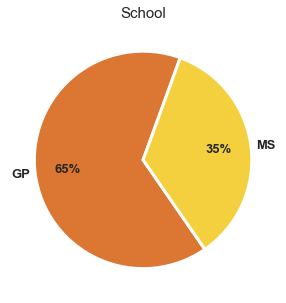

In [144]:
school = port.school.value_counts(normalize=True).to_frame().reset_index()
school.columns = ['school', 'Perc']
school = school.sort_values(by='Perc', ascending=False)

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.pie(school.Perc, labels=school['school'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#DC7633','#F4D03F'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('School', size=15 )

Analizzando il grafico sopra riportato, è possibile notare come la maggior parte degli studenti frequentino la scuola Gabriel Pereira (65%).

## Voto finale: feature G3

Dal momento che, come anticipato in precedenza, l'obiettivo del seguente progetto è predirre il voto finale del corso di portoghese di ciascun studente, prima di analizzare tutte le altre variabili si è voluto analizzare la feature target *G3*, ovvero la valutazione finale.

Per analizzare tale feature ci si è basati su quanto definito al seguente link, a proposito della scala dei voti adottata dalle scuole superiori portoghesi: https://www.dises.unina.it/documents/12369237/12472352/tabella+conversione+voti.pdf/8208d967-75e2-42fe-9bfa-127862a1e9c8. Ovvero:

In [145]:
voti = {'Insufficiente': ['< 10'], 'Sufficiente': ['10-11'], 'Discreto':['12-13'],
       'Buono':['14-15'], 'Ottimo':['16-17'], 'Eccellente': ['18-20']}
df_voti = pd.DataFrame(voti)
df_voti

,Insufficiente,Sufficiente,Discreto,Buono,Ottimo,Eccellente
0,< 10,10-11,12-13,14-15,16-17,18-20


Basandosi sulla scala dei voti appena riportata, è stata creata una colonna "Scala_Voti" in cui andare ad inserire la dicitura della valutazione (ad esempio "*insufficiente*") per avere una prima visualizzazione della distribuzione della valutazione finale degli studenti.

Text(0, 0.5, 'Percentuale di studenti')

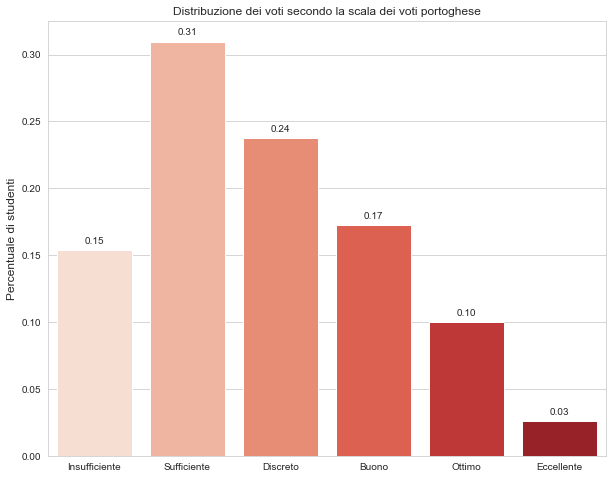

In [146]:
"""creo una copia del dataframe port per non aggiungere un'ulteriore colonna al dataframe 
che verrà utilizzato per l'addestramento del modello"""
port_copy = port.copy()
port_copy.loc[port_copy.G3 < 10, 'SV_3'] = 'Insufficiente'
port_copy.loc[(port_copy.G3 == 10) | (port_copy.G3 == 11), 'SV_3'] = 'Sufficiente'
port_copy.loc[(port_copy.G3 == 12) | (port_copy.G3 == 13), 'SV_3'] = 'Discreto'
port_copy.loc[(port_copy.G3 == 14) | (port_copy.G3 == 15), 'SV_3'] = 'Buono'
port_copy.loc[(port_copy.G3 == 16) | (port_copy.G3 == 17), 'SV_3'] = 'Ottimo'
port_copy.loc[port_copy.G3 >= 18, 'SV_3'] = 'Eccellente'

scala_voti = port_copy.SV_3.value_counts(normalize=True).to_frame().reset_index()
scala_voti.columns = ['SV_3', 'Perc']
# si crea un sorter per ordinae il dataframe scala_voti a seconda della scala dei voti portoghese
sorter = ['Insufficiente', 'Sufficiente', 'Discreto', 'Buono', 'Ottimo', 'Eccellente']
scala_voti.SV_3 = scala_voti.SV_3.astype('category')
scala_voti.SV_3.cat.set_categories(sorter, inplace=True)

scala_voti = scala_voti.sort_values(['SV_3'])


fig = plt.figure(figsize=(10,8))
graph = sns.barplot(x=scala_voti.SV_3, y=scala_voti.Perc, palette='Reds')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                  (p.get_x()+p.get_width() /2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
graph.set_title('Distribuzione dei voti secondo la scala dei voti portoghese')
graph.set_xlabel('')
graph.set_ylabel('Percentuale di studenti', size=12)

Analizzando il grafico sopra riportato è possibile notare che:

- solo il 15% degli studenti ha ottenuto un voto finale insufficiente;
- solamente il 3% degli studenti ha ottenuto un voto finale eccellente, ovvero maggiore o uguale a 18;
- la maggior parte degli studenti ha ottenuto una valutazione o sufficiente (31%) o discreta (24%): ovvero la maggior parte degli studenti ha ottenuto una valutazione compresa tra 10 e 13.

Come anticipato in precedenza, essendo presenti studenti di due scuole diverse, si è voluto analizzare il voto finale degli studenti di ciascun istituto.

Text(0, 0.5, 'Percentuale di studenti')

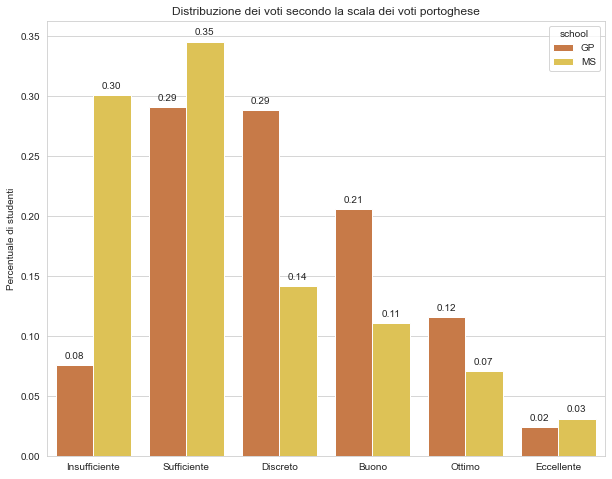

In [147]:
scala_voti_gp = port_copy[port_copy.school == 'GP'].SV_3.value_counts(normalize=True).to_frame().reset_index()
scala_voti_gp.columns = ['SV_3', 'Perc']
scala_voti_gp['school'] = 'GP'
scala_voti_ms = port_copy[port_copy.school == 'MS'].SV_3.value_counts(normalize=True).to_frame().reset_index()
scala_voti_ms.columns = ['SV_3', 'Perc']
scala_voti_ms['school'] = 'MS'

scala_voti = scala_voti_gp.append(scala_voti_ms)
scala_voti.SV_3 = scala_voti.SV_3.astype('category')
scala_voti.SV_3.cat.set_categories(sorter, inplace=True)
scala_voti = scala_voti.sort_values(['SV_3'])

fig = plt.figure(figsize=(10,8))
graph = sns.barplot(x=scala_voti.SV_3, y=scala_voti.Perc, palette=['#DC7633','#F4D03F'], hue=scala_voti.school)
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                  (p.get_x()+p.get_width() /2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
graph.set_title('Distribuzione dei voti secondo la scala dei voti portoghese')
graph.set_xlabel('')
graph.set_ylabel('Percentuale di studenti')

Analizzando il grafico sopra riportato è possibile notare che:

- la percentuale di studenti che frequentano la scuola Mousinho da Silveira con voto *insufficiente* è maggiore rispetto a quella relativa agli studenti della scuola Gabriel Pereira;
- eccezione fatta per la valutazione *eccellente*, dove la differenza è minima, è possibile notare come la percentuale di studenti con valutazione superiore alla sufficienza (da *discreto* in poi) è più alta tra gli studenti della scuola Gabriel Pereira.

Per avere un'idea migliore del rapporto che vi è tra la feature *school* e la feature target *G3*, si è optato per creare un ulteriore grafico, riportato di seguito.

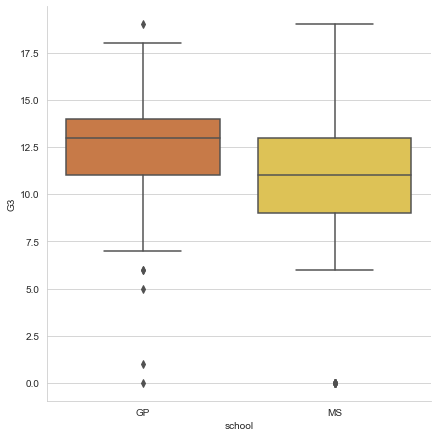

In [148]:
sns.catplot(x='school', y='G3', kind="box", data=port, height=6, palette=['#DC7633','#F4D03F'])

Analizzando il grafico sopra riportato è possibile vedere ancora meglio come le valutazioni finali degli studenti che frequentano la scuola Gabriel Pereira siano tendenzialmente più alte rispetto a quelle di coloro che vanno alla scuola Mousinho da Silveira. La linea orizzontale, infatti, rappresenta la media delle valutazioni finali degli studenti di ciascuna scuola presente all'interno del dataset considerato in questo progetto: ed è più alta nel box "arancione", ovvero quello rappresentante la scuola Gabriel Pereira.

Studiando i due grafici, ci si aspetta, quindi, che la media delle valutazioni finale degli studenti "GP" sia più alta rispetto agli altri. Questo è confermato dai dati sotto riportati: la media degli studenti di Gabriel Pereira è più alta di quasi due punti rispetto a quella di coloro che frequentano la scuola Mousinho da Silveira.

In [149]:
calcolo_media_categoriche(port, 'school')

Feature school: gli studenti con categoria GP hanno una media finale pari a 12.58
Feature school: gli studenti con categoria MS hanno una media finale pari a 10.65


Tuttavia, osservando attentamente il secondo grafico è possibile notare come, in entrambe le scuole, vi siano degli studenti con valutazione finale pari a 0. In particolare:

In [150]:
print('Studenti GP con valutazione finale zero: ',port[(port.school == 'GP') & (port.G3 == 0)].G3.value_counts()[0])
print('Studenti MS con valutazione finale zero: ',port[(port.school == 'MS') & (port.G3 == 0)].G3.value_counts()[0])

Studenti GP con valutazione finale zero:  1
Studenti MS con valutazione finale zero:  14


Tali valutazioni incidono notevolmente nella media finale, specialmente per la scuola Mousinho da Silveira, dove sono presenti 14 studenti con valutazione finale pari a 0.

Una valutazione pari a zero potrebbe significare che:
- lo studente abbia abbandonato il corso non sostenendo la prova finale, oppure
- la prova finale non fosse classificabile

Per comprendere meglio quale possa essere la causa di tali valutazioni, ovvero se si tratta di studenti rientranti nel primo o nel secondo caso, si è pensato di verificare le valutazioni dei due periodi scolastici, ovvero G1 e G2, ancora prima di analizzare nel dettaglio tali features.

Di seguito, è stato svolto quanto appena descritto. Nonostante vi sia un solo studente frequentante la scuola Gabriel Pereira con la feature target pari a 0, si è optato per suddividere gli studenti in due dataframes differenti in funzione della scuola di appartenenza.

In [151]:
# per comodità si dividono gli studenti delle due scuole in due dataframe differenti 
gp = port[(port.school == 'GP') & (port.G3 == 0)]
ms = port[(port.school == 'MS') & (port.G3 == 0)]

print(f'Lo studente di GP nel primo periodo ha una valutazione pari a {gp.G1.to_list()[0]} mentre nel secondo periodo {gp.G2.to_list()[0]}.')


Lo studente di GP nel primo periodo ha una valutazione pari a 11 mentre nel secondo periodo 9.


In [152]:
ms.groupby('G1').count()['school'].to_frame().reset_index().rename(columns={'school': 'n_studenti'})

,G1,n_studenti
0,4,1
1,5,3
2,7,5
3,8,4
4,9,1


In [153]:
ms.groupby('G2').count()['school'].to_frame().reset_index().rename(columns={'school': 'n_studenti'})

,G2,n_studenti
0,0,7
1,5,1
2,6,1
3,7,3
4,8,2


I dati sopra riportati riguardano le valutazioni ottenute dagli studenti con valutazione finale pari a 0 nei due periodi scolastici: in particolare, le due tabelle riguardano coloro che frequentano la scuola Mousinho da Silveira. Analizzando tali dati è possibile notare come 7 studenti con la feature *school* valorizzata MS, oltre alla valutazione finale, hanno anche ottenuto un voto pari a 0 nel secondo periodo; tutti gli altri, invece, hanno ricevuto dei voti sia nel secondo che nel primo periodo. Quindi si è pensato quanto segue:

- gli studenti con valutazione finale pari a 0 ma con voti diversi da zero nel primo e nel secondo periodo ricadono nella casistica, nominata in precedenza, "prova finale non classificabile";
- gli studenti, invece, con valutazione finale e voto del secondo periodo pari a 0 sono studenti che non hanno sostenuto la prova finale: il motivo potrebbe essere dettato dal fatto che tali studenti hanno lasciato la scuola prima della fine dell'anno scolastico. Per questo motivo, si è pensato di escludere tali studenti dal dataset, in quanto il fatto che uno studente lasci la scuola prima della fine dell'anno scolastico non è un fatto facilmente prevedibile, in quanto potrebbe dipendendere da molti fattori non analizzabili con i dati disponibili e utilizzati nel seguente progetto.

Di seguito, quindi, gli studenti descritti al secondo punto vengono esclusi dal dataset e si ripropone il grafico rappresentante la distribuzioni delle valutazioni finali di ciascuna scuola, con l'obiettivo di vedere come le distribuzioni e la media cambino escludendo tali studenti.

In [154]:
port = port.drop(port[(port.G2 == 0) & (port.G3 == 0)].index)

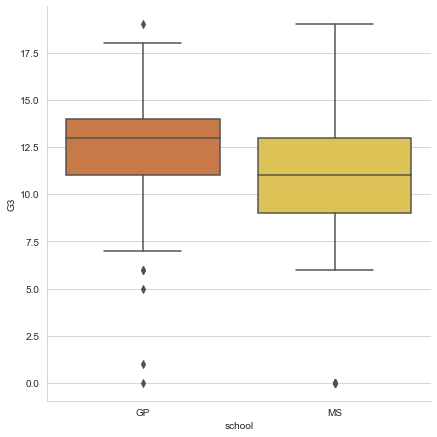

In [155]:
sns.catplot(x='school', y='G3', kind="box", data=port, height=6, palette=['#DC7633','#F4D03F'])

Analizzando il grafico sopra riportato rappresentante la distribuzione delle valutazioni finali delle due scuole in seguito all'operazione di esclusione descritta in precedenza, è possibile notare come le due distribuzioni non cambino di molto rispetto alla precedente. Tuttavia, come dimostrato dai dati sotto riportati, la media delle valutazioni finali degli studenti frequentanti la scuola Mousinho da Silveira (10.99) è più alta rispetto a quella calcolata in precedenza (10.65): nonostante ciò, la differenza tra le medie delle due scuole è ancora netta. Quindi è possibile confermare il fatto che coloro che gli studenti della scuola Gabriel Pereira tendono ad avere valutazioni finali più alte.

In [156]:
calcolo_media_categoriche(port, 'school')

Feature school: gli studenti con categoria GP hanno una media finale pari a 12.58
Feature school: gli studenti con categoria MS hanno una media finale pari a 10.99


## Voto primo periodo e secondo periodo: features G1 e G2

Come accennato in precedenza, all'interno del dataset, oltre al voto finale, sono presenti due features che indicano le valutazioni ottenute dagli studenti nel primo (feature *G1*) e nel secondo periodo (feature *G2*). Prima di analizzare le altre informazioni che descrivono lo studente, si è pensato di analizzare tali features in quanto è logico pensare che se uno studente va bene nel primo e nel secondo periodo il suo voto finale sarà più alto di quello di un altro studente che nel primo e nel secondo periodo è andato peggio.

L'analisi delle features *G1* e *G2* è stata svolta come segue:
1. analisi generale delle valutazioni;
2. analisi delle valutazioni dei due periodi nelle due scuole portoghesi;
3. analisi correlazione delle due features con la feature target *G3*.

### Analisi generale dei voti dei due periodi

Per prima cosa si è voluto analizzare la distribuzione delle due features.

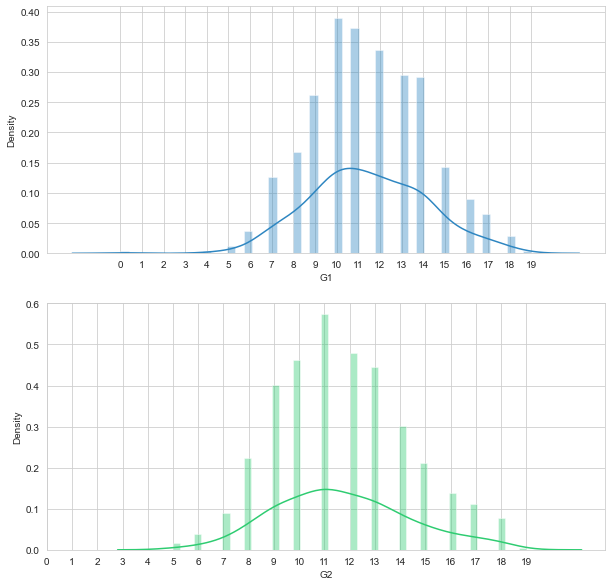

In [157]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.distplot(port.G1, ax=ax[0], color='#2E86C1', bins=50)
ax[0].set_xticks(np.arange(0,max(port.G1)+1))
sns.distplot(port.G2, ax=ax[1], color='#2ECC71', bins=50)
ax[1].set_xticks(np.arange(0,max(port.G2)+1))
plt.show()

Analizzando i due grafici sopra riportati e, in particolare, comparando le due curve presenti in ciascun grafico è possibile notare come:
- la curva di G1 ha il proprio picco massimo tra le valutazioni 10 e 11, mentre la curva di G2 ha un picco massimo corrispondente al voto 11: si tenga in considerazione il fatto che il picco massimo di una curva come quella rappresentata nei due grafici ricade dove si ha il più alto numero di studenti con tali valutazioni.

Per avere una visualizzazione migliore della valutazione degli studenti nei due periodi, come fatto in precedenza per il voto finale, si sfrutta la scala dei voti adottata in Portogallo.

Text(0.5, 1.0, 'Scala dei voti secondo periodo')

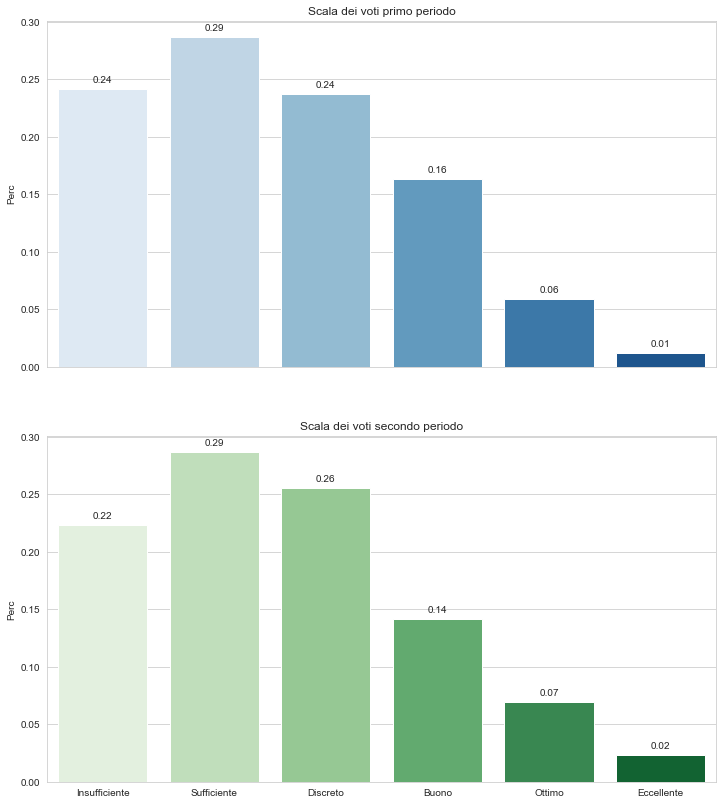

In [21]:
# Si utilizza il dataframe copia creato in precedenza
port_copy.loc[port_copy.G1 < 10, 'SV_1'] = 'Insufficiente'
port_copy.loc[(port_copy.G1 == 10) | (port_copy.G1 == 11), 'SV_1'] = 'Sufficiente'
port_copy.loc[(port_copy.G1 == 12) | (port_copy.G1 == 13), 'SV_1'] = 'Discreto'
port_copy.loc[(port_copy.G1 == 14) | (port_copy.G1 == 15), 'SV_1'] = 'Buono'
port_copy.loc[(port_copy.G1 == 16) | (port_copy.G1 == 17), 'SV_1'] = 'Ottimo'
port_copy.loc[port_copy.G1 >= 18, 'SV_1'] = 'Eccellente'
port_copy.loc[port_copy.G2 < 10, 'SV_2'] = 'Insufficiente'
port_copy.loc[(port_copy.G2 == 10) | (port_copy.G2 == 11), 'SV_2'] = 'Sufficiente'
port_copy.loc[(port_copy.G2 == 12) | (port_copy.G2 == 13), 'SV_2'] = 'Discreto'
port_copy.loc[(port_copy.G2 == 14) | (port_copy.G2 == 15), 'SV_2'] = 'Buono'
port_copy.loc[(port_copy.G2 == 16) | (port_copy.G2 == 17), 'SV_2'] = 'Ottimo'
port_copy.loc[port_copy.G2 >= 18, 'SV_2'] = 'Eccellente'

sv1 = port_copy.SV_1.value_counts(normalize=True).to_frame().reset_index()
sv2 = port_copy.SV_2.value_counts(normalize=True).to_frame().reset_index()
sv1.columns = ['SV_1', 'Perc']
sv2.columns = ['SV_2', 'Perc']
sv1.SV_1 = sv1.SV_1.astype('category')
sv2.SV_2 = sv2.SV_2.astype('category')
sv1.SV_1.cat.set_categories(sorter, inplace=True)
sv2.SV_2.cat.set_categories(sorter, inplace=True)

sv1 = sv1.sort_values(['SV_1'])
sv2 = sv2.sort_values(['SV_2'])

fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=True)
g1 = sns.barplot(x=sv1.SV_1, y=sv1.Perc, palette='Blues', ax=ax[0])
for p in g1.patches:
    g1.annotate(format(p.get_height(), '.2f'),
                  (p.get_x()+p.get_width() /2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
g2 = sns.barplot(x=sv2.SV_2, y=sv2.Perc, palette='Greens', ax=ax[1])
for p in g2.patches:
    g2.annotate(format(p.get_height(), '.2f'),
                  (p.get_x()+p.get_width() /2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_title('Scala dei voti primo periodo')
ax[1].set_title('Scala dei voti secondo periodo')

Analizzando i due grafici sopra riportati è possibile notare che non vi sono grandi differenze tra le due distribuzioni. Tuttavia, risulta che:
- la percentuale di studenti che ha avuto una valutazione insufficiente nel secondo periodo è minore (21% vs 23%) rispetto al primo periodo;
- la percentuale di studenti che ha avuto una valutazione discreta nel secondo periodo è maggiore rispetto al primo periodo (26% vs 24%);
- la percentuale di studenti con valutazione buona nel secondo periodo è minore rispetto a quella del primo (14% vs 17%);
- la percentuale di studenti con valutazione ottima nel secondo periodo è maggiore rispetto a quella del primo (7% vs 6%) così come per quanto riguarda la valutazione eccellente (2% vs 1%).

Dai dati appena descritti è possibile dedurre che la media dei voti del secondo periodo sia leggermente più alta rispetto a quella primo periodo, il che è confermato dai dati riportati di seguito:

In [22]:
media_G1 = round(port.G1.mean(),2)
media_G2 = round(port.G2.mean(),2)

print(f'Media primo periodo: {media_G1}')
print(f'Media secondo periodo: {media_G2}')

Media primo periodo: 11.45
Media secondo periodo: 11.7


In generale, quindi, è possibile notare un leggero miglioramento delle valutazioni ottenute dagli studneti nel secondo periodo.

### Analisi delle valutazioni dei due periodi per scuola

Come descritto in precedenza, l'analisi delle features *G1* e *G2* è proseguita studiando il loro comportamento considerando separatamente le due scuole portoghesi presenti nel dataset.

Per prima cosa, si è optato di confrontare per ciascuna scuola la distribuzione dei voti nei due periodi.

Di seguito, è stata analizzata la scuola Gabriel Pereira.

In [23]:
gp = port[port.school == 'GP'][['G1','G2']]
gp_primo = gp[['G1']].rename(columns={'G1':'Voto'})
gp_primo['Periodo'] = 'G1'
gp_secondo = gp[['G2']].rename(columns={'G2':'Voto'})
gp_secondo['Periodo'] = 'G2'
gp = gp_primo.append(gp_secondo)

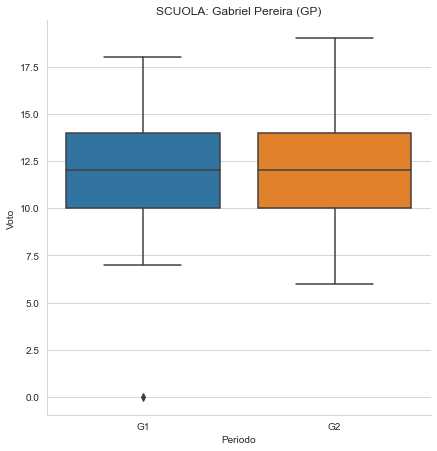

In [24]:
sns.catplot(x='Periodo', y='Voto', kind="box", data=gp, height=6).set(title='SCUOLA: Gabriel Pereira (GP)')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come, per quanto riguarda la scuola Gabriel Pereira, nel secondo periodo il range dei voti è più ampio: infatti la valutazione più alta ottenuta nel secondo periodo è pari a 19 mentre nel primo è pari a 18, mentre la valutazione più bassa nel secondo periodo è pari a 6, mentre nel primo periodo è pari a 7. Tali variazioni modificano leggermente, in positivo, la media delle valutazioni del secondo periodo. La differenza, come è possibile notare dai dati sotto riportati, è minima, dovuta al numero ridotto di studenti con tali valutazioni.

In [25]:
mean_primo = round(gp_primo.Voto.mean(),2)
mean_secondo = round(gp_secondo.Voto.mean(),2)

print(f'(GP) la media del primo periodo è pari a {mean_primo}.')
print(f'(GP) la media del secondo periodo è pari a {mean_secondo}.')

(GP) la media del primo periodo è pari a 11.99.
(GP) la media del secondo periodo è pari a 12.14.


La differneza è minima in quanto, come è possibile vedere dalle tabelle sotto riportate,:

- nel secondo periodo vi è solo uno studente con valutazione pari a 19 e solo uno studente con valutazione pari a 6;

In [26]:
gp[gp.Periodo == 'G2'].value_counts().to_frame().reset_index().sort_values(by='Voto', ascending=False)

,Voto,Periodo,0
13,19,G2,1
10,18,G2,9
9,17,G2,13
7,16,G2,19
6,15,G2,32
4,14,G2,38
2,13,G2,63
0,12,G2,73
1,11,G2,66
3,10,G2,48


In [27]:
gp[gp.Periodo == 'G1'].value_counts().to_frame().reset_index().sort_values(by='Voto', ascending=False)

,Voto,Periodo,0
11,18,G1,5
9,17,G1,11
7,16,G1,17
6,15,G1,27
4,14,G1,55
2,13,G1,56
1,12,G1,66
0,11,G1,69
3,10,G1,55
5,9,G1,37


Successivamente, si è analizzato il comportamento delle valutazioni dei due periodi della scuola Mousinho da Silveira.

In [28]:
ms = port[port.school == 'MS'][['G1','G2']]
ms_primo = ms[['G1']].rename(columns={'G1':'Voto'})
ms_primo['Periodo'] = 'G1'
ms_secondo = ms[['G2']].rename(columns={'G2':'Voto'})
ms_secondo['Periodo'] = 'G2'
ms = ms_primo.append(ms_secondo)

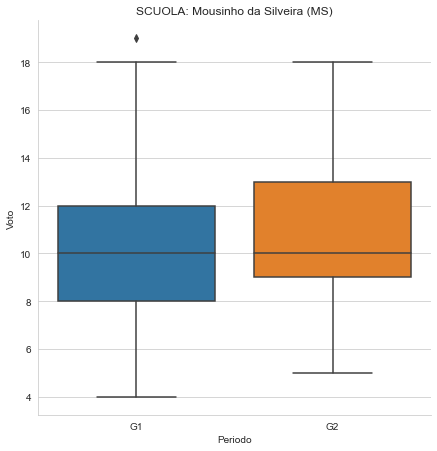

In [29]:
sns.catplot(x='Periodo', y='Voto', kind="box", data=ms, height=6).set(title='SCUOLA: Mousinho da Silveira (MS)')
plt.show()

Analizzando la distribuzioni dei voti dei due periodi visibili nel grafico sopra riportato, è possibile notare come la media non si discosti di molto tra i due periodi. Tuttavia, nel secondo periodo è possibile vedere come le valutazioni positive, in particolare le valutazioni comprese tra 10 e 13, siano maggiori rispetto a quelle del primo periodo. Da tali considerazioni ci si aspetta quindi che la media dei voti del secondo periodo sia più alta, il che è dimostrato dai dati sotto riportati.

In [30]:
mean_primo = round(ms_primo.Voto.mean(),2)
mean_secondo = round(ms_secondo.Voto.mean(),2)

print(f'(MS) la media del primo periodo è pari a {mean_primo}.')
print(f'(MS) la media del secondo periodo è pari a {mean_secondo}.')

(MS) la media del primo periodo è pari a 10.42.
(MS) la media del secondo periodo è pari a 10.83.


Analizzando le valutazioni degli studenti nei due periodi per ciascuna scuola è possibile notare quindi un comportamento simile nel rendimento scolastico dei ragazzi: vi è, infatti, in entrambe le scuole portoghesi presenti all'interno del dataframe vi è un leggero miglioramento delle valutazioni nel secondo periodo il che, come spiegato in precedenza, potrebbe essere causato dal fatto che gli studenti, per evitare di dover ripetere l'anno si impegnino maggiormente per alzare i propri voti.

Successivamente, l'analisi delle valutazioni dei due periodi è proseguita confrontando il rendimento di ciascun periodo considerando la scuola di provenienza degli studenti, con l'obiettivo di verificare se, la differenza di andamento descritta in fase di analisi del voto, sia causata da un maggiore divario in uno dei due periodi.

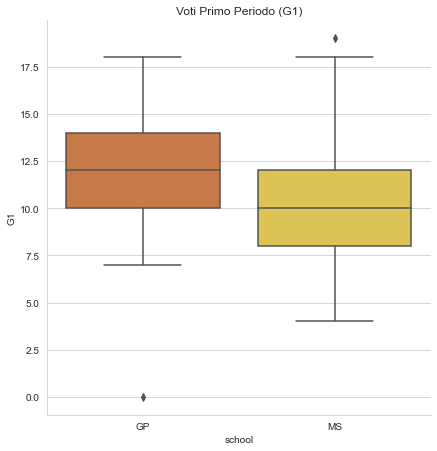

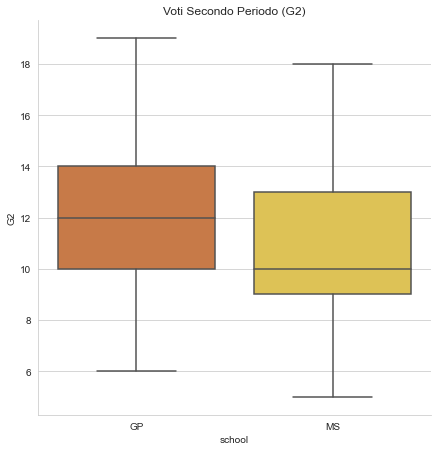

In [31]:
sns.catplot(x='school', y='G1', kind="box", data=port, height=6, palette=['#DC7633','#F4D03F']).set(title='Voti Primo Periodo (G1)')
sns.catplot(x='school', y='G2', kind="box", data=port, height=6, palette=['#DC7633','#F4D03F']).set(title='Voti Secondo Periodo (G2)')
plt.show()

Nei grafici sopra riportati sono state messe a confronto le distribuzioni delle valutazioni di ciascun periodo delle due scuole. Analizzando tali grafici è possibile notare come, sia nel primo che nel secondo periodo, gli studenti della scuola Gabriel Pereira abbiano ottenuto valutazioni migliori rispetto ai colleghi frequentanti la scuola Mousinho da Silveira. La differenza di valutazione, considerando soprattutto la media di ciascun istituto, è in linea con quanto evidenziato in fase di analisi della valutazione finale. 

In particolare, tenendo in considerazione la differenza delle valutazioni finali delle due scuole (differenza di 1.5 a favore della scuola Gabriel Pereira), se si analizzano i dati sotti riportati è possibile notare che le differenze dei due periodi non si discostano di molto dalla differenza presente tra le medie finali. Più precisamente, è possibile constatare che la differenza è leggermente maggiore nel primo periodo.

In [32]:
GP_primo = port[port.school == 'GP'].G1.mean()
MS_primo = port[port.school == 'MS'].G1.mean()

print(f'(Primo periodo) Media Gabriel Pereira: {round(GP_primo,2)}')
print(f'(Primo periodo) Media Mousinho da Silveira: {round(MS_primo,2)}')

(Primo periodo) Media Gabriel Pereira: 11.99
(Primo periodo) Media Mousinho da Silveira: 10.42


In [33]:
GP_secondo = port[port.school == 'GP'].G2.mean()
MS_secondo = port[port.school == 'MS'].G2.mean()

print(f'(Primo periodo) Media Gabriel Pereira: {round(GP_secondo,2)}')
print(f'(Primo periodo) Media Mousinho da Silveira: {round(MS_secondo,2)}')

(Primo periodo) Media Gabriel Pereira: 12.14
(Primo periodo) Media Mousinho da Silveira: 10.83


### Analisi della correlazione tra G1, G2 e la feature target G3

Dopo aver analizzato le due features che descrivono le valutazioni del primo e del secondo periodo, l'analisi è proseguita con l'obiettivo di individuare l'eventuale presenza di una correlazione tra tali features e la feature target, ovvero G3.

La matrice di correlazione, riportata di seguito, rappresenta il grado di correlazione presenti tra le variabili considerate. Come è possibile notare analizzando tale matrice:
- vi è una forte correlazione positiva tra il voto del secondo periodo (G2) e la feature target: coefficiente di Pearson pari a 0.9.
- la correlazione tra il voto del primo periodo (G1) e la feature target è anch'essa positiva ma meno forte di quella tra G1 e G3: coeffieciente di Pearson pari a 0.83.
In base a quanto a quanto appena descritto, è possibile affermare che la valutazione finale degli studenti dipende molto più dal voto ottenuto al termine del secondo periodo, piuttosto che da quanto ricevuto nel primo. Dalla matrice di correlazione, inoltre, si evince che vi è una correlazione piuttosto altra anche tra G1 e G2 (coefficiente di Pearson pari a 0.86): questo sta a significare che gli studenti che sono andati bene nel primo periodo tendono ad andare bene anche nel secondo periodo, chi invece ottiene una valutazione bassa nel primo tende ad ottenere un voto basso anche nel secondo.

Da questa prima analisi è possibile affermare che i voti ottenuti dagli studenti nel primo e nel secondo periodo saranno molto utili per predirre il voto finale attraverso un modello di machine learning.

<AxesSubplot:>

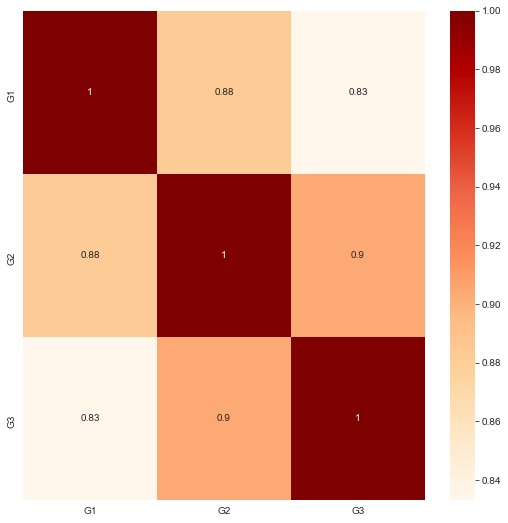

In [34]:
# creazione dataframe contenente solo le features G1, G2 e G3
df_val = port[['G1', 'G2', 'G3']]
# creazione matrice di correlazione
fig = plt.figure(figsize=(9,9))
sns.heatmap(df_val.corr(), annot=True, cmap='OrRd')

Dal momento che tutta l'analisi precedente è stata svolta considerando seperatamente le due scuole, si è voluto analizzare allo stesso modo la correlazione tra le tre diverse features. 
Analizzando le due matrici di correlazione riportate di seguito è possibile notare che:

- per quanto riguarda la scuola Gabriel Pereira il voto del secondo periodo ha una correlazione con il voto finale maggiore rispetto alla valutazione del primo periodo, il che significa che, in un contesto di predizione della valutazione finale, è più determinante quanto uno studente ha ottenuto nel secondo periodo;
- per quanto riguarda, invece, la scuola Mousinho da Silveira, il comportamento è simile, ovvero, anche in questo caso la valutazione ottenuta nel secondo periodo è più determinante in un contesto in cui si vuole predirre il voto finale. Tuttavia, in questo caso, la differenza tra la correlazione dei voti dei due periodi con il voto finale è minore rispetto a quanto constatato per l'altro istituto. 
- in entrambe le scuole, inoltre, è possibile notare una forte correlazione tra i voti dei due periodi, anche se tale correlazione è maggiore tra i dati degli studenti della scuola Mousinho da Silveira.

[Text(0.5, 1.0, 'Mousinho da Silveira (MS)')]

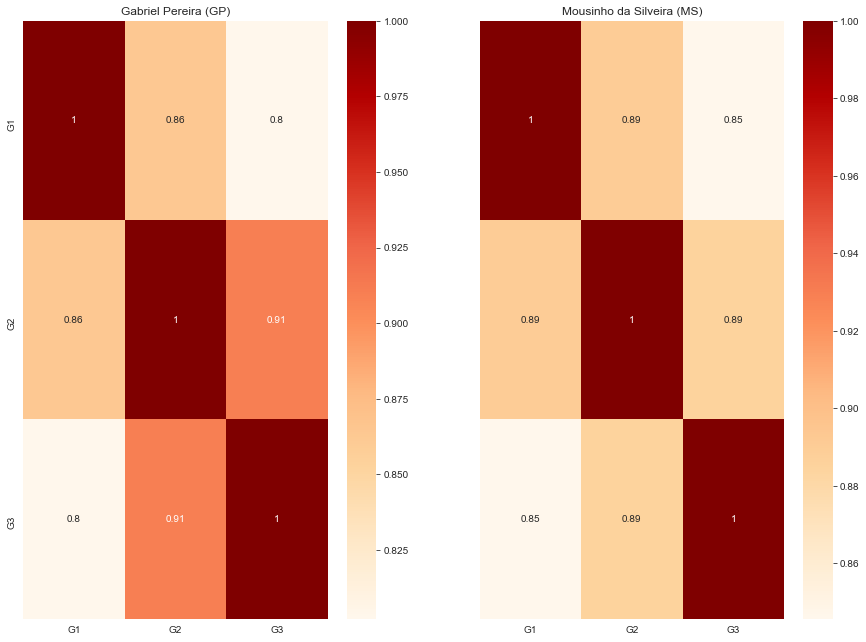

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,11), sharey=True)
sns.heatmap(port[port.school == 'GP'][['G1', 'G2', 'G3']].corr(), annot=True, cmap='OrRd',ax=ax[0]).set(title='Gabriel Pereira (GP)')
sns.heatmap(port[port.school == 'MS'][['G1', 'G2', 'G3']].corr(), annot=True, cmap='OrRd', ax=ax[1]).set(title='Mousinho da Silveira (MS)')

## Analisi delle altre features

Una volta studiate le features che descrivono le valutazioni ottenute duranto l'anno, l'analisi è proseguita considerando le altre variabili presenti all'interno del dataset.

Dato l'elevato numero di features si è pensato di suddividere le features in 3 diverse categorie:

- **informazioni personali e scolastiche**, ovvero age, address, reason, failures, schoolsup, health, nursery higher, absences, schoolsup, paid, activities
- **informazioni sulla famiglia dello studente**: famsize, Pstatus, Medu, Fedu, Mjob, Fjob, guardian, famsup, famrel
- **informazioni sulla vita dello studente**: traveltime, internet, romantic, freetime, goout, Dalc, Walc

Una volta individuate le 3 categorie, sono stati creati altrettanti dataframe contenenti solamente le features individuate per ciascuna. In ogni dataframe è stata inserita anche la feature G3, in quanto essendo il target del progetto presentato nel seguente documento, tutte le variabili verrano messe in relazione con tale feature. Inoltre in tutti e tre i dataframe sono state aggiunte le feature *sex* e *school* in quanto potrebbe essere interessante confrontare tali variabili con alcune features presenti nel dataset.

In [36]:
cols_personal = ['age', 'address', 'reason', 'failures', 'schoolsup', 'health', 'nursery', 'higher',
                'absences', 'paid', 'activities','sex', 'school', 'G3']
cols_fam = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup', 'famrel','sex', 'school',  'G3']
cols_life = ['traveltime', 'internet', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc','sex', 'school',  'G3']

personal = port[cols_personal] # informazioni personali e scolastiche
family = port[cols_fam] # informazioni sulla famiglia
life = port[cols_life] # informazioni sulla vita

Prima di analizzare le varie features presenti dei tre dataframe appena creati, quindi, si è voluto analizzare il sesso degli studenti e analizzare il loro rendimento in funzione delle feature *sex*, con l'obiettivo di comprendere come e se il sesso di uno studente influisce sulla valutazione finale.

### Il sesso degli studenti influisce sul voto finale?

Analizzando il grafico sotto riportato è possibile notare come la maggior parte degli studenti presenti all'interno del dataset sono di sesso femminile (59%).

Text(0.5, 1.0, 'Sex')

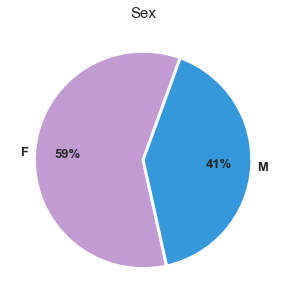

In [37]:
sex = port.sex.value_counts(normalize=True).to_frame().reset_index()
sex.columns = ['sex', 'Perc']
sex = sex.sort_values(by='Perc', ascending=False)

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.pie(sex.Perc, labels=sex['sex'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#C39BD3','#3498DB'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Sex', size=15 )

Successivamente, si è voluto analizzare la distribuzione del sesso degli studenti per ciascuna delle due scuole presenti all'interno del dataset considerato all'interno del seguente documento. A tal proposito, sono stati creati i grafici sotto riportati, dai quali è possibile notare che:

- in entrambe le scuole, gli studenti che hanno compilato il questionario sono per la maggior parte di sesso femminile. In particolare, nella scuola Mousinho da Silveira le ragaze sono il 65% del numero totale degli studenti di tale scuola.

In [38]:
GP_sex = port[port.school == 'GP'].sex.value_counts().to_frame().reset_index()
GP_sex.columns = ['sex', 'Perc']
GP_sex = GP_sex.sort_values(by='Perc', ascending=False)
MS_sex = port[port.school == 'MS'].sex.value_counts().to_frame().reset_index()
MS_sex.columns = ['sex', 'Perc']
MS_sex = MS_sex.sort_values(by='Perc', ascending=False)

Text(0.5, 1.0, 'Mousinho da Silveira: sesso degli studenti')

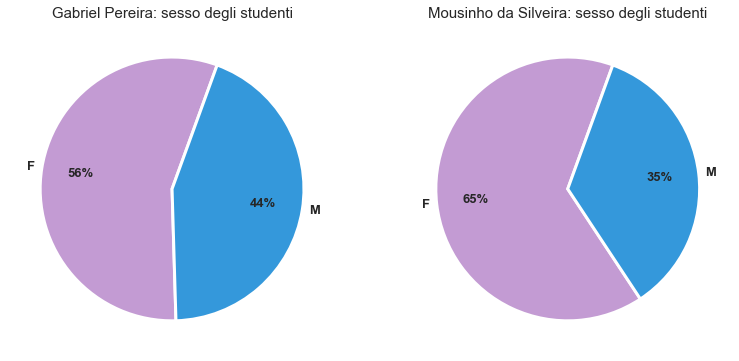

In [39]:
fig,ax = plt.subplots(1,2,figsize=(13,13))
ax[0].pie(GP_sex.Perc, labels=GP_sex['sex'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#C39BD3','#3498DB'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[0].set_title('Gabriel Pereira: sesso degli studenti', size=15 )
ax[1].pie(MS_sex.Perc, labels=MS_sex['sex'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#C39BD3','#3498DB'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[1].set_title('Mousinho da Silveira: sesso degli studenti', size=15 )

#### Analisi correlazione tra il sesso degli studenti e il voto finale

Una volta definita una panoramica generale del sesso degli studenti presenti all'interno del dataset, si è voluto analizzare l'eventuale correlazione tra la feature *sex* e la feature target del progetto. Dal momento che, come visto in precedenza, la feature *sex* è una variabile di tipo categoricam dal momento che può assumere solamente due valori, *F* o *M*: per questo motivo si è optato per analizzare la correlazione analizzando la distribuzione dei voti per ciascuan delle due categorie presenti.

Feature sex: gli studenti con categoria F hanno una media finale pari a 12.38
Feature sex: gli studenti con categoria M hanno una media finale pari a 11.54


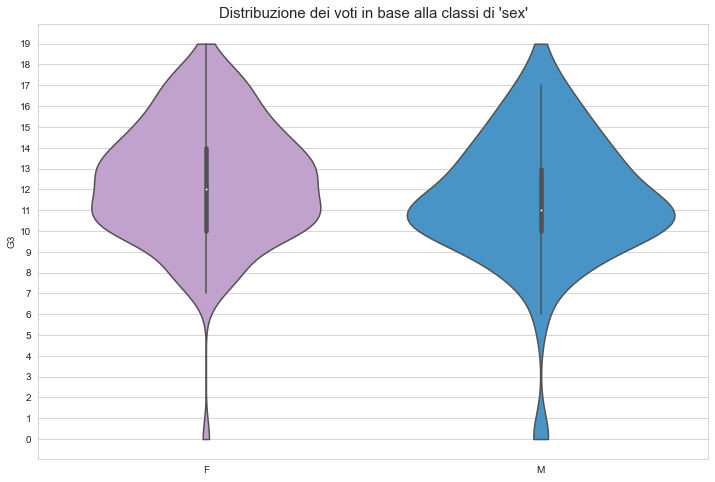

In [40]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
calcolo_media_categoriche(port, 'sex')
violin(port, 'sex', ax, ['#C39BD3','#3498DB'])
fig.show()

Il grafico sopra riportato rappresenta la distribuzione dei voti per gli studenti di ciascun sesso. Confrontando le due distribuzioni presenti all'interno del grafico, è possibile notare come vi sia una differenza molto importante tra le valutazioni finali ottenute dalle ragazze e dai ragazzi:

- per quanto riguarda gli studenti di sesso maschile è possibile individuare qual è stata la valutazione finale ottenuta dalla maggior parte di loro, la quale è pari a 11;
- anche per quanto riguarda le studentesse, la valutazione che è stata maggiormente ottenuta è pari a 11; tuttavia in questo caso, il "picco" è meno netto rispetto a quanto è possibile notare dalla distribuzione dei voti dei ragazzi. Confrontando, infatti, le due distribuzioni è possibile notare come la percentuale di ragazze che hanno ottenuto voti più alti sia maggiore di quella dei ragazzi,

Dalle due distribuzioni rappresentate nel grafico sopra riportato, quindi, è possibile affermare che mediamente le ragazze hanno un rendimento scolastico migliore rispetto a quello degli studenti di sesso maschile. Tale considerazione è confermata dai dati indicanti la media delle valutazioni finali delle due categorie della feature *sex*: la media delle ragazze, infatti, è maggiore di quella dei ragazzi di quasi un punto (12.38 vs 11.54).

Dal momento che è stata notata una differenza abbastanza netta tra le valutazioni ottenute dalle ragazze e dai ragazzi, si vuole analizzare la distribuzione del sesso degli studenti nelle due scuole presenti all'interno del dataset, in modo da comprendere se la differenza di valutazioni finali tra le due scuole, analizzata in precedenza, possa in qualche modo essere causata da una distribuzione differente nelle due scuole degli studenti considerando la feature *sex*.

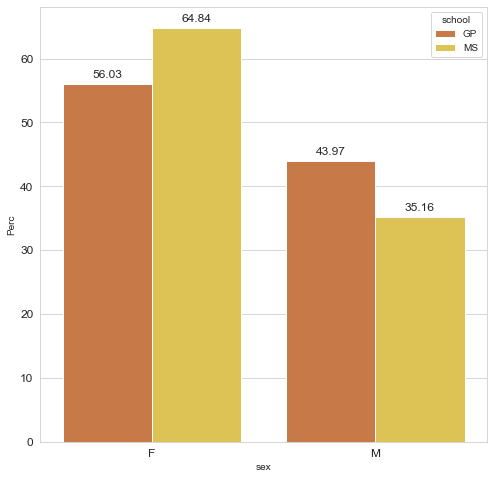

In [41]:
distribuzione_per_scuola(port, 'sex')

Analizzando il grafico sopra riporttato è possibile notare come, in percentuale, la scuola Mousinho da Silveira abbia più studenti di sesso femminile rispetto alla scuola Gabriel Pereira. Di conseguenza, da tali dati non è possibile affermare che la scuola Mousinho da Silveira abbia voti tendenzialmente più bassi dovuti alla differente distribuzione degli studenti per il loro sesso, dal momento che, come visto in precedenza, le ragezza tendono ad avere voti migliori dei colleghi di sesso maschile e tale scuola ha una prevalenza di studenti di sesso femminile.

### Analisi delle informazioni personali

Una volta analizzati gli studenti presenti all'interno del dataset in funzione della feature *sex*, la quale, come anticipato in precedenza, sarà utile per comprendere meglio le abitudini degli studenti ed eventuali pattern, l'analisi è proseguita studiante le informazioni personali dello studente, ovvero le features *age, address, reason, failures, schoolsup, health, nursery higher, absences, schoolsup, paid, activities*.

In [42]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 648
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         642 non-null    int64 
 1   address     642 non-null    object
 2   reason      642 non-null    object
 3   failures    642 non-null    int64 
 4   schoolsup   642 non-null    object
 5   health      642 non-null    int64 
 6   nursery     642 non-null    object
 7   higher      642 non-null    object
 8   absences    642 non-null    int64 
 9   paid        642 non-null    object
 10  activities  642 non-null    object
 11  sex         642 non-null    object
 12  school      642 non-null    object
 13  G3          642 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 91.4+ KB


#### Analisi della correlazione tra l'età degli studenti e il voto finale

Prima di studiare l'eventuale correlazione tra l'età degli studenti e il voto finale da loro conseguito, si è voluto analizzare più dettagliatamente la distribuzione dell'età degli studenti.

In seguito ad una veloce ricerca, si è scoperto che il sistema scolastico portoghese prevede una durata di tre anni per ciò che riguarda l'istruzione secondaria (ovvero il livello degli studenti riportati all'interno del dataset utilizzato per il seguente progetto). Di conseguenza, i ragazzi iniziano la scuola superiore all'età di 15 anni e, idealmente, terminano il proprio percorso a 18 anni. Per questo motivo si è voluto analizzare la distribuzione dell'età degli studenti tenendo conto di quanto previsto dal sistema scolastico portoghese.

Text(0.5, 1.0, 'Studenti in corso o fuori corso (bocciati)')

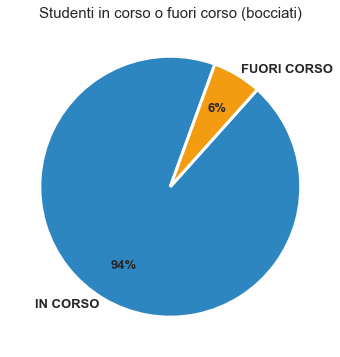

In [43]:
# si crea una copia del dataframe personal contenente solamente l'età e il voto finale
eta = personal[['age', 'G3']]
# si crea una colonna aggiuntiva denominata 'IN_FUORI' che può assumere i valori: "IN CORSO" o "FUORI CORSO"
eta.loc[(eta.age >= 15) & (eta.age <= 18), 'IN_FUORI'] = 'IN CORSO'
eta.loc[(eta.age > 18), 'IN_FUORI'] = 'FUORI CORSO'
eta_perc = eta.IN_FUORI.value_counts(normalize=True).to_frame().reset_index()
eta_perc.columns = ['age', 'Perc']
eta_perc = eta_perc.sort_values(by='Perc', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pie(eta_perc.Perc, labels=eta_perc['age'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#2E86C1','#F39C12'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Studenti in corso o fuori corso (bocciati)', size=15 )

Analizzando il grafico sopra riportato è possibile notare come la maggior parte degli studenti presenti all'interno del dataset oggetto di studio, hanno un età in linea con quanto previsto dal sistema scolastico portoghese, ovvero hanno tra i 15 e i 18 anni compresi. Solamente il 6% degli studenti ha un'età maggiore ai 18 anni, e di conseguenza è logico pensare che abbiano perso uno o più anni. 

Dopo aver ottenuto una panoramica generale a proposito dell'età degli studenti del corso di portoghese, si è pensato di analizzare la distribuzione dei voti finali da loro ottenuti in funzione dell'età.

In [44]:
calcolo_media_categoriche(personal, 'age')

Feature age: gli studenti con età 15 hanno una media finale pari a 12.11
Feature age: gli studenti con età 16 hanno una media finale pari a 12.06
Feature age: gli studenti con età 17 hanno una media finale pari a 12.34
Feature age: gli studenti con età 18 hanno una media finale pari a 12.03
Feature age: gli studenti con età 19 hanno una media finale pari a 10.17
Feature age: gli studenti con età 20 hanno una media finale pari a 12.0
Feature age: gli studenti con età 21 hanno una media finale pari a 11.0
Feature age: gli studenti con età 22 hanno una media finale pari a 5.0


Analizzando i dati sopra riportati riguardanti la media del voto finale per ogni età, è possibile notare che: ngli studenti con età compresa tra i 15 e i 18 anni, quindi i ragazzi "in corso" secondo il sistema scolastico portoghese, hanno una media finale migliore rispetto ai loro colleghi più grandi. Questo è dovuto dal fatto che coloro che hanno più di 18 anni sono studenti che sono stati bocciati almento una volta e quindi potrebbe trattarsi di persone che non hanno molto interesse verso lo studio. Fanno eccezione gli studenti di 20 anni, la cui media finale è in linea con quella dei colleghi in corso. Dai dati sopra riportati, inoltre, si nota che gli studenti con età pari a 22 anni hanno une media finale nettamente inferiore rispetto agli altri. 

Tuttavia, se si analizza il grafico sotto riportato, il quale rappresenta la distribuzione delle valutazioni degli studenti di ciascuna età, è possibile constatare che vi è solo uno studente di 22 anni il quale, data l'età e quindi il numero di anni in cui è stato bocciato, non deve essere molto bravo nello studio.

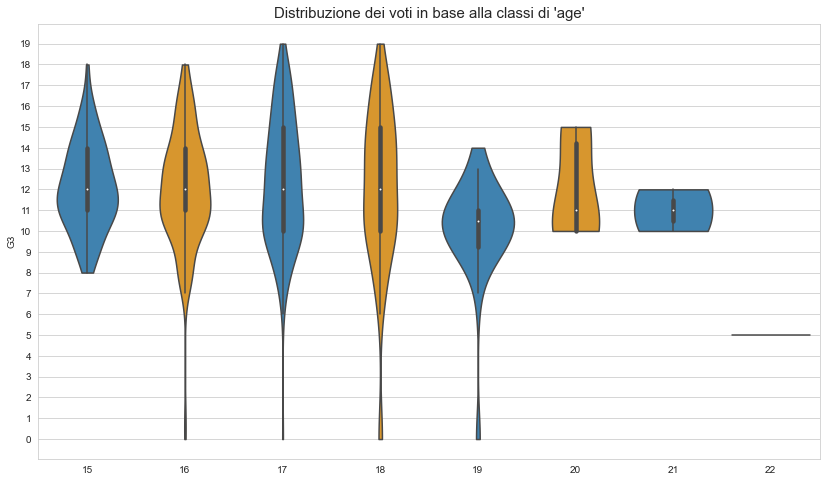

In [45]:
fig, ax = plt.subplots(1,1,figsize=(14,8))
violin(personal, 'age', ax, ['#2E86C1','#F39C12'])

Analizzando più nel dettaglio il grafico sopra riportato, ci si è resi conto di una particolare differenza che vi è tra gli studenti con età compresa tra i 15 e i 18 anni e gli altri. Si è notato, infatti, che la distribuzione dei voti di coloro che sono in linea con il sistema scolastico portoghese è "migliore" rispetto a coloro che hanno perso almeno un anno. Con "migliore" si intende il fatto tra questi studenti vi è un numero maggiore di voti superiori al 15: infatti, se si confrontano le varie distribuzioni, è possibile notare come, la valutazione finale più alta ottenuta dagli studenti con età superiore ai 18 è 15. 

Visto quanto appena descritto, si è pensato di "modificare" la natura della feature *age* rendendola categorica, ovvero creando una nuova colonna, la quale in fase di modellazione dell'algoritmo di machine learning sostituirà la feature originale, che potrà assumere solamente due valori: "IN CORSO" e "FUORI CORSO" (come fatto in precedenza).

In [46]:
# si crea colonna *new_age* in nei dataframe port e personal
port.loc[(port.age >= 15) & (port.age <= 18), 'new_age'] = 'IN CORSO'
port.loc[port.age > 18, 'new_age'] = 'FUORI CORSO'
personal.loc[(personal.age >= 15) & (personal.age <= 18), 'new_age'] = 'IN CORSO'
personal.loc[personal.age > 18, 'new_age'] = 'FUORI CORSO'

In seguito, si è voluto analizzare ulteriormente la distribuzione delle valutazioni finale per ciascuna delle due categorie appena create.

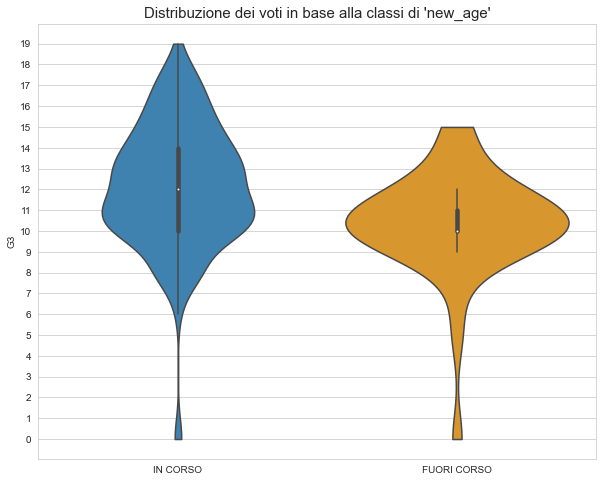

In [47]:
fig,ax = plt.subplots(1,1, figsize=(10,8))
violin(personal, 'new_age', ax, ['#2E86C1','#F39C12'])

Analizzando il grafico sopra riportato, si conferma quanto descritto in precedenza: gli studenti "in corso" hanno tendenzialmente voti migliori rispetto a coloro che hanno perso almeno un anno. Tale comportamento, come accennato in precedenza, può essere spiegato con il fatto che i ragazzi con un'età maggiore rispetto all'età massima prevista dal sistema scolastico portoghese non dovrebbero essere molto bravi nello studio, oppure hanno un interesse minore rispetto agli altri nell'impegnarsi a scuola.

#### Analisi del numero di assenze e bocciature

Una volta analizzato nel dettaglio, lo studio del dataset è proseguito con l'esaminare il numero di assenze e il numero di bocciature, ovvero le features *absences* e *failures*.

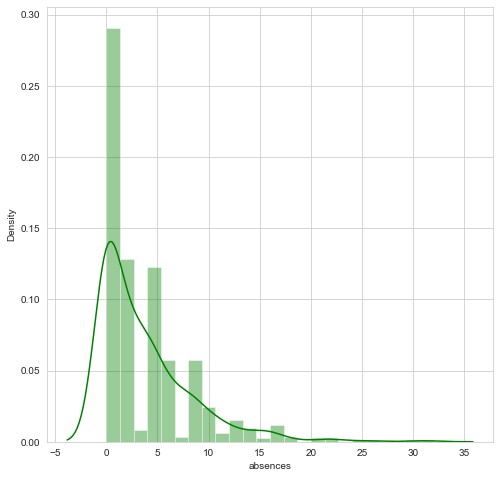

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.distplot(personal.absences, color='green')
plt.show()

Nel grafico sopra riportato è possibile notare che la maggior parte degli studenti ha un numero di assenza compreso tra 0 e 5. Analizzando più dettagliatamente quanto rappresentato è stata notata la possibilità di dividere in quattro gruppi il numero di assenze. La suddivisione è stata svolta come segue:

- **valore 0**: numero di assenze tra 0 e 5
- **valore 1**: numero di assenze tra 6 e 10
- **valore 2**: numero di assenze tra 11 e 15
- **valore 3**: numero di assenze superiore a 15

Con "valore" si intende la valorizzazione che verrà fatta, in base al numero di assenze di ciascun studente, nella nuova colonna che verrà creata nel dataframe *personal*:

In [49]:
# crezione nuova colonna "new_absences"
personal.loc[(personal.absences >= 0) & (personal.absences <=5), 'new_absences'] = 0
personal.loc[(personal.absences >= 6) & (personal.absences <=10), 'new_absences'] = 1
personal.loc[(personal.absences >= 11) & (personal.absences <=15), 'new_absences'] = 2
personal.loc[(personal.absences > 15), 'new_absences'] = 3
personal.new_absences = personal.new_absences.astype(int)

Dopo aver creato una nuova colonna *new_absences* nel dataframe personal valorizzata in base alle 4 categorie sopra individuate, si è voluto analizzare ulteriormente la distribuzione del numero di assenze tra gli studenti presenti all'interno del dataframe. 

In [50]:
cat_absences = personal.new_absences.value_counts(normalize=True).to_frame().reset_index()
cat_absences.columns = ['Categ_Absences', 'Perc']

Text(0.5, 1.0, 'Percentuale di studenti per categoria di assenze')

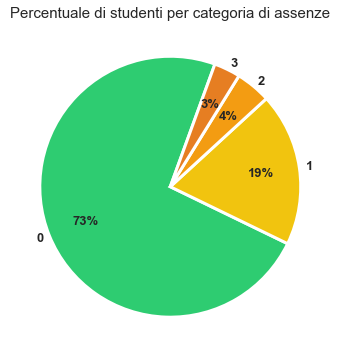

In [51]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pie(cat_absences.Perc, labels=cat_absences['Categ_Absences'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#2ECC71', '#F1C40F', '#F39C12', '#E67E22'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Percentuale di studenti per categoria di assenze', size=15 )

Analizzando il grafico sopra riportato è possibile notare che, come già descritto in precedenza, la maggior parte degli studenti, più precisamente il 73%, ha un numero di assenza compreso tra 0 e 5, mentre solo l'1% ha saltato più di 16 giorni durante l'anno.

In seguito, si è voluto analizzare il numero di assenze confrontandole con l'età degli studenti  e con le valutazioni finali con l'obiettivo di verificare la presenza di eventuali correlazioni

- confronto con l'età degli studenti:

<AxesSubplot:xlabel='new_absences', ylabel='age'>

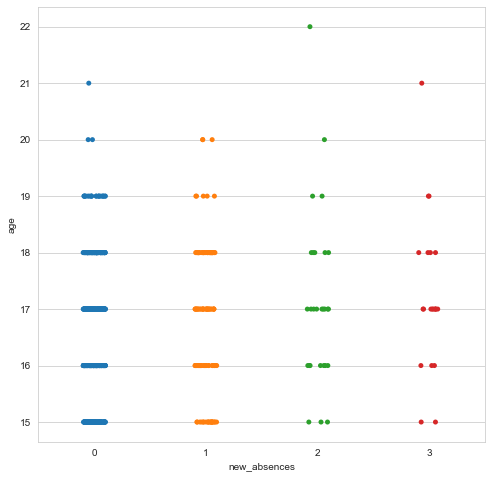

In [52]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.stripplot(x='new_absences', y='age', data=personal, ax=ax)

Analizzando il grafico sopra riportato non è possibile notare un trend particolare.

- correlazione con il voto finale

<AxesSubplot:xlabel='new_absences', ylabel='G3'>

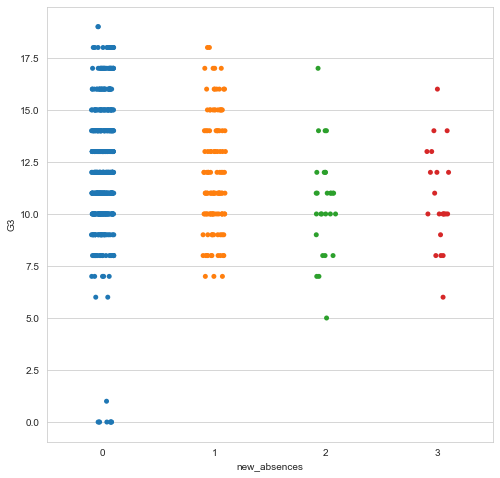

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.stripplot(x='new_absences', y='G3', data=personal, ax=ax)

Analizzando il grafico sopra riportato sembra che gli studenti con un numero di assenze maggiore di 10 (categoria 2 e 3) abbiano più difficolta nell'ottenere voti superiori a 15.

Successivemente, il lavoro è proseguito analizzando nel dettaglio il numero di failures degli studenti. Come è possibile vedere dai dati sotto riportati, la variabile in analisi può assumere solamente 4 valori. Di conseguenza, nonostante si tratti di una variabile di tipo intero, può essere trattata come una variabile categorica.

In [54]:
personal.failures.value_counts()

0    547
1     66
2     16
3     13
Name: failures, dtype: int64

Per questo motivo, si è pensato di studiare tale variabile analizzando la sua distribuzione attraverso il grafico che segue:

In [55]:
failures = personal.failures.value_counts(normalize=True).to_frame().reset_index()
failures.columns = ['failures', 'Perc']
nstudente_perfailure = personal.failures.value_counts().to_frame().reset_index()
nstudente_perfailure.columns = ['failures', 'N_studenti']
failures = pd.merge(failures, nstudente_perfailure, on=['failures'])

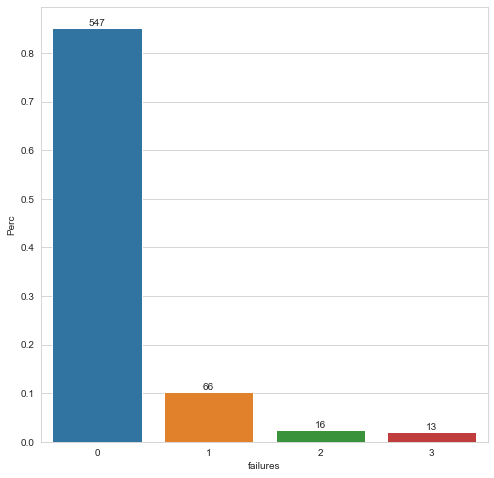

In [56]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
graph = sns.barplot(x=failures.failures, y=failures.Perc,
                   ax=ax)
for p, n in zip(ax.patches, failures['N_studenti']):
    ax.annotate(n, xy=(p.get_x()+p.get_width()/2, p.get_height()),ha='center', va='bottom')

Nel grafico sopra riportato si è voluto rappresentare la percentuale di studenti per ciascun valore che può assumere la feature *failures*: in particolare, si è voluto indicare anche il numero preciso di studenti per ogni valore. Analizzando tale grafico è possibile notare come:
- l'80% degli studenti (ovvero 547) non è mai stato bocciato, mentre l'1% è stato bocciato solo un anno.
- 16 studenti hanno la feature *failures* pari a 2, mentre 13 studenti sono stati bocciati 3 volte. 

Una volta studiata la distribuzione del numero di bocciature tra gli studenti presenti nel dataset si è voluto analizzare le possibili correlazioni della feature *failures* con le feature indicanti il numero di assenze, l'età e il voto finale.

<AxesSubplot:xlabel='failures', ylabel='new_absences'>

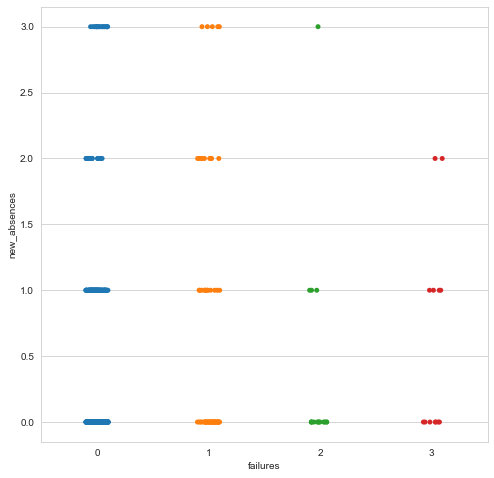

In [57]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.stripplot(x='failures', y='new_absences', data=personal, ax=ax)

Il grafico sopra riportato rappresenta la correlazione tra il numero di fallimenti e il numero di assenze (categorizzate). Analizzando quanto rappresentato è possibile notare come non vi sia una particolare correlazione tra le due features: non sembra, infatti, che all'aumentare del numero di assenze vi sia un aumento della probabilità di essere bocciati.

<AxesSubplot:xlabel='failures', ylabel='G3'>

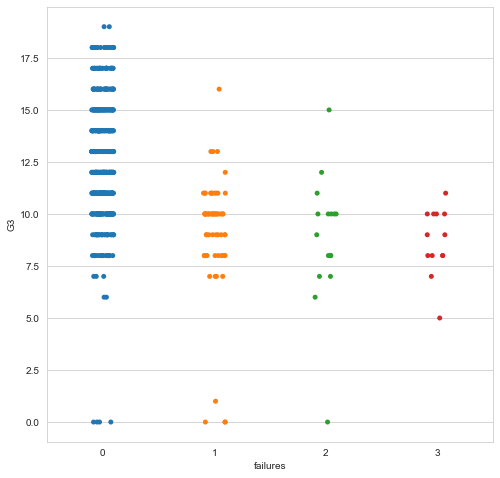

In [58]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.stripplot(x='failures', y='G3', data=personal, ax=ax)

Nel grafico sopra riportato, invece, si è voluto rappresentare la distribuzione dei voti degli studenti in funzione del numero di fallimenti. Analizzando quanto rappresentato è possibile notare che più aumenta il numero di bocciature più è difficile per gli studenti raggiungere valutazioni alte. In particolare: tra gli studenti bocciati una volta (failures = 1) risulta risultano pochissimi studenti con valutazione superiore a 12: tale difficolta peggiora se si considerano gli studenti bocciati due o tre volte. Di conseguenza, risulta esserci una tendanza negativa per quanto riguarda la valutazione finale degli studenti se si vanno a considerare il numero di bocciature: più sono gli anni perso da uno studente, più è difficile per lo studente ottenere voti superiori al 12, ovvero il "discreto" nella scala dei voti portoghese.

VIsto quanto appena descritto, si è voluto confrontare il numero di bocciature degli studenti delle due scuole portoghesi, dal momento che dalle analisi effettutate in precedenza risulta esserci una netta differenza tra le valutazioni finali delle due scuole (Gabriel Pereira media voti migliore). Per questo motivo, si è voluto vedere se i voti degli studenti della scuola Mousinho da Silveira, peggiori di quelli dei colleghi frequentanti la sucola Gabriel Pereira, siano in qualche modo causato dal maggior numero di studenti che sono stati bocciati almeno una volta.

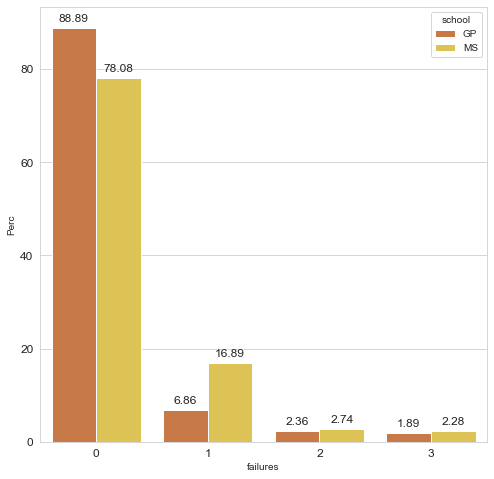

In [59]:
distribuzione_per_scuola(personal, 'failures')

Il grafico sopra riportato rappresenta la distribuzione degli studenti di ciascuna scuola in funzione del numero di bocciature. In particolare, si è voluto considerare per ciascun valore della feature *failures* la percentuale di studenti sul numero totale di ciascuna scuola, dal momento che, come visto all'inizio dell'analisi, le due scuole non sono rappresentate equalmente all'interno del dataset. Analizzando tale grafico è possibile notare come tra gli studenti di Gabriel Pereira vi siano meno studenti che sono stati bocciati almeno una volta. Infatti, l'89% circa degli studenti di Gabriel Pereira non è mai stato bocciato, a differenza degli studenti della Mousinho da Silveira dove gli studenti che non hanno perso mai un anno sono il 78% del totale. Analizzando più nel dettaglio gli studenti con bocciatura è possibile notare che, mentre le percentuali delle due sucole degli studenti bocciati una o due volte le percentuali differiscono di poco, per quanto riguarda i ragazzi che sono stati bocciati una sola volta la percentuale è nettamente maggiore per gli studenti della Mousinho da Silveira: pari a circa il 17% contro il 7% circa di Gabriel Pereira. A fronte di quanto appena constatato, è possibile dire che i voti peggiori (in termini di media) della scuola Mousinho da Silveira potrebbero essere in parte causati dal maggior numero di studenti con bocciatura.

#### Analisi correlazione tra residenza e voto finale

L'analisi è proseguito con lo studio della residenza degli studenti presenti all'interno del dataset, ovvero la feature *address*, con l'obiettivo di verificare la presenza di una correlazione con la feature target *G3*. 

Come descritto da Kaggle, la feature *address* può assumere solo due valori, **U** o **R**, le quali indicano reciprocamente una residenza in zona urbana o rurale.

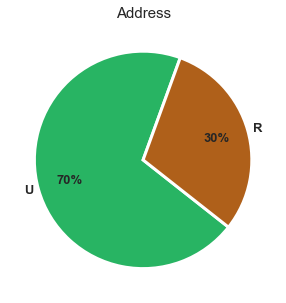

In [60]:
address = personal.address.value_counts(normalize=True).to_frame().reset_index()
address.columns = ['address', 'Perc']
address = address.sort_values(by='Perc', ascending=False)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.pie(address.Perc, labels=address['address'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#28B463','#AF601A'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Address', size=15 )
plt.show()

Osservando il grafico sopra riportato è possibile notare come la maggior parte degli studenti vivono in zone urbane, mentre il 30% vive in zone rurali. 

In seguito, si è voluto analizzare la distribuzione dei voti degli studenti in funzione della zona in cui vivono.

Feature address: gli studenti con categoria R hanno una media finale pari a 11.32
Feature address: gli studenti con categoria U hanno una media finale pari a 12.35


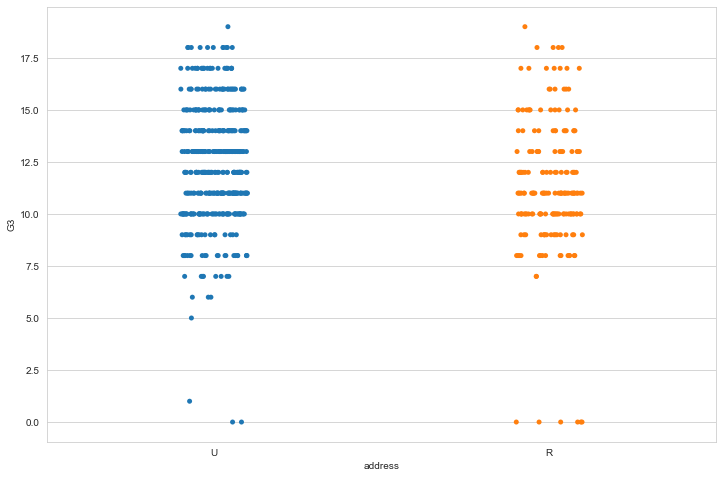

In [61]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
calcolo_media_categoriche(personal, 'address')
sns.stripplot(x='address', y='G3', data=personal, ax=ax)
fig.show()

Analizzando il grafico sopra riportato è possibile notare come gli studenti che vivono in zone rurali abbiano più difficoltà a raggiungere valutazioni superiori al 15, rispetto ai colleghi che vivono in città (U). Tale osservazione è confermata dai dati riportati sopra il grafico e riguardanti la media del voto finale di ciascuna "categoria " di address: gli studenti che vivono in zone urbane, infatti, hanno una media finale superiore di 1 un punto rispetto ai colleghi con residenza in zone rurali.

Come fatto in precedenza, per la feature *failures*, si è voluto analizzare la distribuzione degli studenti di ogni scuola in funzione della propria residenza, avendo notato una differenza netta nelle valutazioni finali degli studenti in base alla feature *address*.

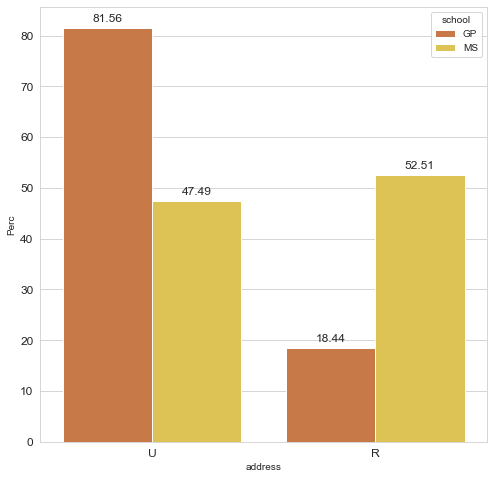

In [62]:
distribuzione_per_scuola(personal, 'address')

Analizzando il grafico sopra riportato, è possibile notare come la maggior parte degli studenti della scuola Gabriel Pereira vivone in zone urbane, precisamente l'81% degli studenti; mentre per quanto riguada la scuola Mousinho da Silveira non vi è una netta prevalenza delle due zone: il 53% circa, infatti, vive in zone rurali, mentre il il 47% in zone urbane. Di conseguenza, il fatto che la valutazione finale sia tendenzialmente peggiore tra gli studenti della scuola Mousinho da Silveira potrebbe essere causato non solo dal numero maggiore di bocciature ma anche dal fatto che vi siano, in proporzione, più studenti che vivono in zone rurali, i quali come evidenziato sopra ottengono con più difficolta valutazioni superiori al 15 a differenza di coloro che risiedono in zone urbane.

#### Analisi correlazione tra motivazione di scelta della scuola e voto finale

L'analisi è proseguita analizzando il motivo per i quali gli studenti hanno scelto la scuola che frequentano, con l'obiettivo di individuare la presenza di una correlazione con il voto finale.

Per prima cosa si è voluto ottenere una visione della distribuzione degli studenti in funzione della motivazione, ovvero la feature *reason*. Come specificato da Kaggle, tale feature può assumere i seguenti valori:

- **home**, ovvero per la vicinanza a casa
- **reputation**, ovvero per la reputazione della scuola
- **course**, ovvero per una preferenza dei corsi trattati all'interno della scuola, 
- **other**, ovvero altre motivazioni.

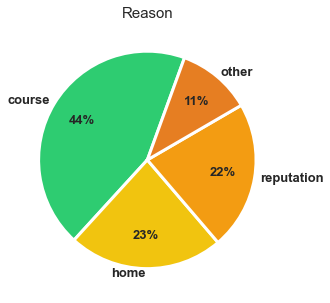

In [63]:
reason = personal.reason.value_counts(normalize=True).to_frame().reset_index()
reason.columns = ['reason', 'Perc']

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.pie(reason.Perc, labels=reason['reason'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#2ECC71', '#F1C40F', '#F39C12', '#E67E22'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Reason', size=15 )
plt.show()

Il grafico sopra riportato rappresenta la distribuzione degli studenti in funzione della feature *reason*. Analizzando tale grafico è possibile notare come la maggior parte degli studenti (44%) abbiano scelto la scuola per la preferenza verso i corsi insegnati.

Successivamente si è voluto analizzare le valutazione finale degli studenti in base alla motivazione che li ha portati a scegliere la scuola che frequentano.

Feature reason: gli studenti con categoria course hanno una media finale pari a 11.71
Feature reason: gli studenti con categoria home hanno una media finale pari a 12.26
Feature reason: gli studenti con categoria other hanno una media finale pari a 10.85
Feature reason: gli studenti con categoria reputation hanno una media finale pari a 13.04


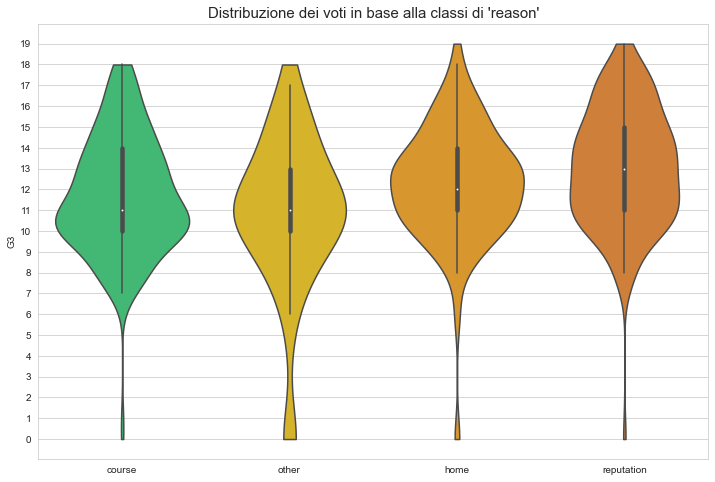

In [64]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
calcolo_media_categoriche(personal, 'reason')
violin(personal, 'reason', ax,['#2ECC71', '#F1C40F', '#F39C12', '#E67E22'])

Analizzando il grafico rappresentante i dati riguardanti la media di ciascuna categoria di *reason*, è possibile notare come chi ha scelto la scuola per la reputazione di quest'ultima tende ad avere voti migliori rispetti a tutti gli altri.

Come fatto in precedenza, dopo aver ottenuto una visione migliore dell'andamento degli studenti in funzione della motivazione che li ha portati a scegliere la scuola che frequentano, si è voluto analizzare la distribuzione degli studenti di ciascuna scuola in funzione della feature *reason*.

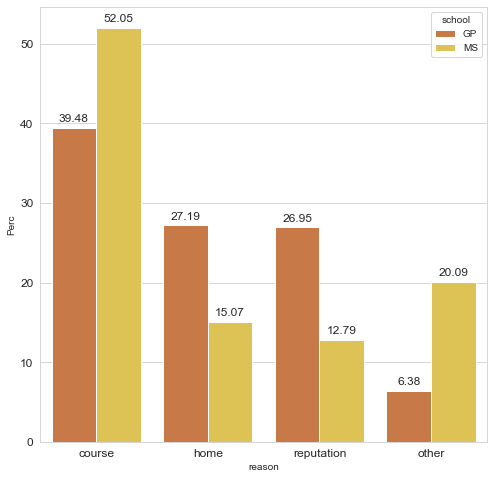

In [65]:
distribuzione_per_scuola(personal, 'reason')

Dal grafico mostrato in precedenza a proposito delle valutazioni degli studenti in funzione della motivazione di scelta, ma soprattutto dalle medie finali di ciascuna categoria, emerge che gli studenti che hanno scelto la scuola per la sua reputazione o per la vicinanza alla propria abitazione tendono ad avere valutazioni finali migliori degli altri. Tenendo in considerazione questo aspetto, analizzando il grafico sopra riportato, rappresentante la distribuzione degli studenti di ciascuna scuola in base alle categorie di *reason*, è possibile notare come, in percentuale, nella scuola Gabriel Pereira vi siano più studenti, rispetto a Mousinho da Silveira, che hanno scelto la scuola per vicinanza a casa o per la reputazione. Inoltre, nelle scuola Mousinho da Silveira vi sono più studenti che hanno sceltom la scuola che frequentano per motivi non definiti (*other*), i quali, dai dati riguardanti la media finale riportati in precedenza, sono coloro che hanno mediamente i voti peggiori. In funzione di quanto appena descritto, la feature *reason* può essere considerata,insieme a quelle individuate in precedenza, una delle cause della differenza di valutazioni finali tra le due scuole analizzata all'inizio dello studio del dataset.

#### Analisi della correlazione tra lo stato di salute e il voto finale

L'analisi delle informazioni personali è proseguita con lo studio dello stato di salute corrente degli studenti presenti all'interno del dataset: ovvero, si è voluto comprendere meglio la distribuzione degli studenti in funzione della feature *health*, con l'obiettivo di comprendere se lo stato di salute incide o meno sulle valutazioni finali ottenute.

Come specificato da Kaggle, la feature *health* può assumere valori che vanno da 1 (stato di salute *very bad*) a 5 (stato di salute *very good*). Come descritto in precedenza, tale feature, anche se assume valori numerici, è da considerare come categorica ordinale: di conseguenza, la correlazione tra le feature *health* e la feature target *G3* non può essere nalaizzata attraverso il coefficiente di correlazione di Pearson.

Per prima cosa, si è voluto analizzare la distribuzione degli studenti nelle diverse categorie di *health*.

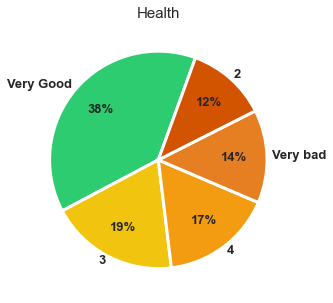

In [66]:
health = personal.health.value_counts(normalize=True).to_frame().reset_index()
health.columns = ['health', 'Perc']
health.loc[health.health == 5, 'Label'] = 'Very Good'
health.loc[health.health == 1, 'Label'] = 'Very bad'
health.loc[(health.health != 5) & (health.health != 1), 'Label'] = health.health
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.pie(health.Perc, labels=health['Label'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = ['#2ECC71', '#F1C40F', '#F39C12', '#E67E22', '#D35400'],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax.set_title('Health', size=15 )
plt.show()

Analizzando il grafico sopra riportato è possibile notare come la maggior parte degli studenti ha dichiarato che il proprio stato di salute è veramente buono (valore 5 della feature *health*), mentre il 14% ha dichiarato un pessimo stato di salute (valore 1) e il 12% ha assegnato un valore 2 alla feature in analisi.

Una volta aver ottenuto un'idea più chiara della distribuzione degli studenti in base alla feature *health*, si è voluto analizzare la distribuzione delle valutazioni finali per ciascuna categoria di tale variabile.

Feature health: gli studenti con categoria 1 hanno una media finale pari a 12.62
Feature health: gli studenti con categoria 2 hanno una media finale pari a 12.35
Feature health: gli studenti con categoria 3 hanno una media finale pari a 11.93
Feature health: gli studenti con categoria 4 hanno una media finale pari a 12.42
Feature health: gli studenti con categoria 5 hanno una media finale pari a 11.61


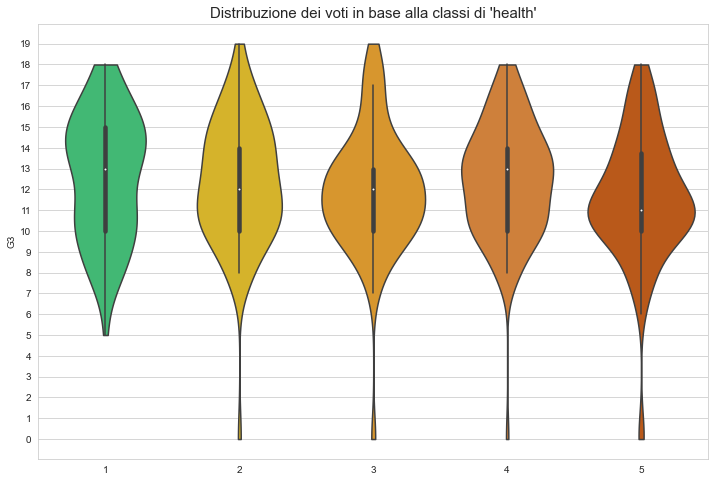

In [67]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
calcolo_media_categoriche(personal, 'health')
violin(personal, 'health', ax,['#2ECC71', '#F1C40F', '#F39C12', '#E67E22', '#D35400'])

Analizzando il grafico sopra riportato emerge il fatto che un miglior stato di salute non significa una valutazione finale migliore. Infatti, se si confronta la distribuzione dei voti finali degli studenti con stato di salute pià alto (valore 5) è possibile notare come sia peggore rispetto alle altre categorie, dal momento che vi sono un elevato numero di voti negativi (ovvero inferiore a 10) e un numero inferiore di voti superirore al 15 (ovvero valutazioni ottime o eccellenti). Tale dato è confermato dalle medie riportate sopra il grafico rappresentante le distribuzioni: considerando tali medie, infatti, è possibile notare come gli studenti con il peggiore stato di salute (valore 1) hanno una media finale maggiore di un punto rispetto agli studenti con il migliore stato di salute. 

A fronte di ciò sembra che gli studenti con uno stato di salute peggiore tendino ad avere voti migliori rispetto agli altri.

#### Analisi correlazione tra feature *higher* e voto finale

Il progetto è proseguito analizzando la feature *higher*, la quale indica la volontà degli studenti di proseguire o meno con gli studi una volta finita la sucola superiore. Come definito da Kaggle, tale feature puà assumere solamente due valori: 'yes' o 'no'. Si tratta, quindi, feture categorica.

Come prima cosa, si è voluto analizzare la distribuzione degli studenti in funzione dei deu valori che può assumere la feature *hiugher*. Dal momento che, come specificato in precedenza, si tratta di una feature categorica che può assumere solamente due valori, si è preferito analizzare tale distribuzione con un'istogramma indicante la perentuale di studneti per ogni categoria e sopra ciascuna colonna si è voluto ibndicare il numero preciso di studenti per ogni categoria.

In [68]:
higher = personal.higher.value_counts(normalize=True).to_frame().reset_index()
higher.columns = ['higher', 'Perc']
nstudents_perhigher = personal.higher.value_counts().to_frame().reset_index()
nstudents_perhigher.columns = ['higher', 'N_studenti']
higher = pd.merge(higher, nstudents_perhigher, on=['higher'])

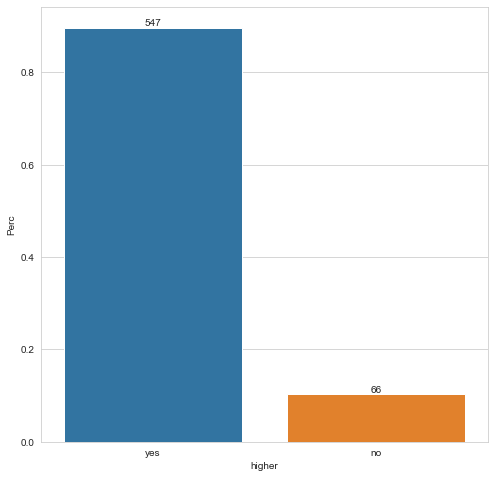

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
graph = sns.barplot(x=higher.higher, y=higher.Perc, ax=ax)
for p, n in zip(ax.patches, failures['N_studenti']):
    ax.annotate(n, xy=(p.get_x()+p.get_width()/2, p.get_height()),ha='center', va='bottom')

Analizzando il grafico sopra riportato, è possible notare come la maggior parte degli studenti ha dichiarato di voler continuare gli studi una volta finite le scuole superiori. Solamente 66 studenti hanno dichiarato di voler mollare gli studi.

Dal momento che si tratta di una faeture non equalmente bilanciata, si è voluto analizzare la distribuzione delle valutazioni finali delle due categorie di *higher* attraverso la mediana e non attraverso la media finale come fatto fino a questo momento. Nel grafico visibile sotto sono stati riportati i seguenti elementi:

- il numero di studenti di ciascuna categoria;
- una linea orizzontale rappresentante la mediana di ciascuna categoria, con lo stesso colore utilizzato per rappresentare il "violino" di ciascuna.


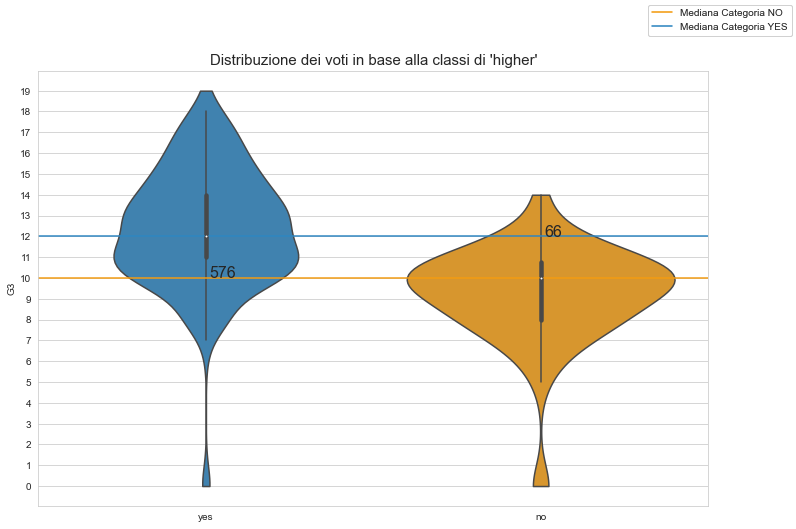

In [70]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
violin(personal, 'higher', ax, ['#2E86C1','#F39C12'])
median_no = personal[personal.higher == 'no']['G3'].median()
median_yes = personal[personal.higher == 'yes']['G3'].median()
ax.axhline(median_no, color='#F39C12', label='Mediana Categoria NO')
ax.axhline(median_yes, color='#2E86C1', label='Mediana Categoria YES')
str_of_nstudents_per_category = personal.higher.value_counts().to_list()
yposition_list = personal.groupby('higher')['G3'].median().tolist()
xposition_list = range(len(yposition_list))
for i in range(len(str_of_nstudents_per_category)):
    ax.text(xposition_list[i]+0.01, yposition_list[i],str_of_nstudents_per_category[i], size=16)

    fig.legend()

Analizzando quanto rappresentato nel grafico sopra riportato, è possibile notare come la mediana delle valutazioni finali degli studenti che vogliono continuare gli studi una volta finite le scuole superiori sia maggiore di 2 valutazioni (12 vs 10) rispetto alla mediana degli studenti che non intendono continuare gli studi. Studiando più nel dettaglio le due distribuzioni è possibile notare come la maggior parte degli studenti che non vogliono continuare gli studi ha una valutazione pari a 10 (ovvero sufficiente), mentre la maggior parte degli studenti con categoria di *higher* valorizzata con *yes* ha una valutazione pari a 12 (valutazione discreta) con, tuttavia, un'elevata percentuale di studenti che ha ottenuto valutazioni superore a tali valutazioni, a differenza dell'altra categoria. A fronte di quanto appena descritto, è possibile affermare che gli studenti che non vogliono terminare gli studi una volta terminata la scuola superiore hanno valutazioni migliori rispetto ai colleghi che non hanno alcuna intenzione a continuare il proprio percorso di studi.


Data la grande differenza tra le distirbuzioni delle due categorie si è voluto analizzare la distribuzione degli studenti delle due scuole presenti all'interno del dataset in funzione della feature *higher*, con l'obiettivo di verificare se la differenza di valutazione indentificata all'inizio dell'analisi sia causata, almeno in parte, anche da tale feature.

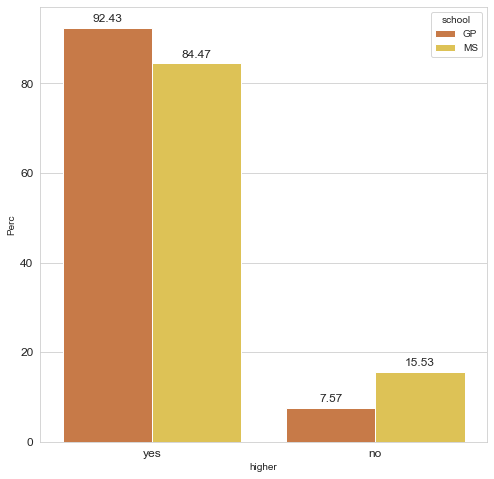

In [71]:
distribuzione_per_scuola(personal, 'higher')

Analizzando il grafico sopra riportato è possibile notare come, in percentuale, vi siano più studenti che non vogliono continuare gli studi nella scuola Mousinho da Silveira. Di conseguenza è possibile affermare che la differenza di valutazioni finali tra le due scuole è causata anche dalla volontà degli studenti di continuare o meno gli studi, oltre che dalle featrure *failure*, *address* e *reason* analizzate in precedenza.

Inoltre, si è voluto analizzare se il sesso influisca in qualche modo sulla volontà di proseguire gli studi: ovvero, si è voluto studiare se le ragazze siano più portate a continuare gli studi rispetto ai ragazzi, o viceversa.

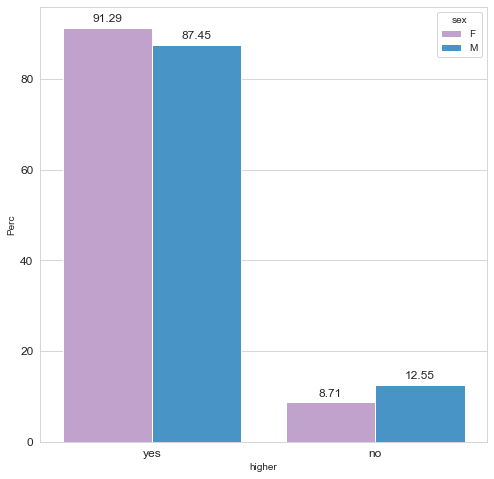

In [72]:
distribuzione_per_sesso(personal, 'higher')

Analizzando il grafico sopra riportato, è possibile notare che in percentuale più ragazze intendono proseguire i propri studi. Tuttavia, non è possibile affermare che la volontà di voler proseguire gli studi è in qualche modo correlata con il sesso degli studenti, dal momento che la differenza non è così marcata (differenza tra il 3% e il 4%).

#### Analisi delle features riguardanti attività extra sostenute dagli studenti

L'analisi delle informazioni personali è proseguita con lo studio delle feature che contengono i dati che indicano se gli studenti sostengano o meno attività al di fuori di quelle definite dal percorso scolastico della propria scuola. Si tratta delle seguenti feature:

- **schoolsup**: supporto educazionale extra
- **paid**: corsi extra a pagamento collegati con la materia del corso
- **activities**: attività extra-curriculari.

Tutte e tre le feature appena elencate sono variabili categoriche che possono assumere solamente due valori: 'yes' or 'no'.

Di seguito, si è voluto analizzare la distribuzione degli studenti in funzione di ciascuna feature.

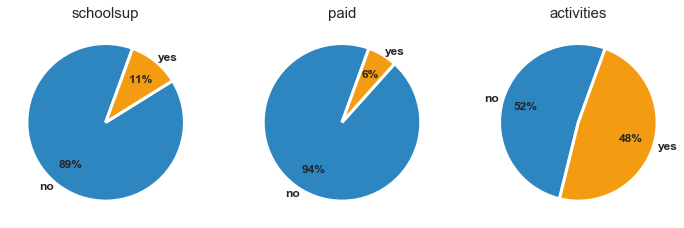

In [73]:
fig, ax = plt.subplots(1,3, figsize=(12,12))
pie_distribution('schoolsup', personal, ax[0])
pie_distribution('paid', personal, ax[1])
pie_distribution('activities', personal, ax[2])

Analizzando i grafici sopra riportati è possibile notare che:

- per quanto riguarda la feature **schoolsup**, la maggior parte degli studenti (89%) non gode di supporto educazionale extra;
- per quanto riguarda la feature **paid**, la maggior parte degli studenti (94%) non frequenta corsi a pagamento extra;
- è possibile affermare che la feature **activities** è equalmente distribuita: infatti il 52% degli studenti non svolge attività extra-curriculari, mentre il 48% svolge tali attività.

Dopo aver ottenuto una panoramica generale delle distribuzioni per ciascuna feature, si è voluto analizzare per ciascuna di esse la distribuzione dei voti finali per ogni valore che può assumere la variabile in analisi. 

Per prima cosa è stata analizzata la feature *schoolsup*.  Dal momento che, come evidenziato in precedenza, si tratta di una feature non equalmente bilanciata, non si è voluto considerare la media finale, bensì la mediana per confrontare le valutazioni finali delle due categorie di tale feature. 
Analizzando quanto rappresentato di seguito, quindi, è possibile notare come, confrontando le due mediane, gli studenti che non ricevono un supporto educazionale extra tendono ad avere valutazioni finali migliori rispetto a coloro che godono di tale supporto. Tuttavia, è possibile notare anche che la percentuale di studenti che si aggira attorno al valore mediano è maggiore tra gli studenti che godono del supporto extra. Considerando che coloro che godono di supporto educazionale extra sono studenti che hanno delle difficoltà a raggiungere determinati risultati scolastici, è possibile affermare che grazie al supporto educazionale extra la maggior parte di tali studenti riesce a raggiungere la sufficienza (valutazioni superiori a 10).

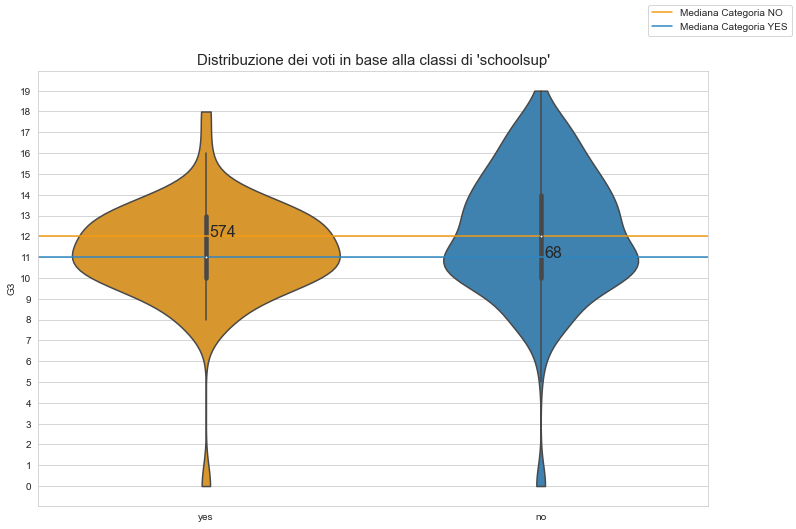

In [74]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
violin(personal, 'schoolsup', ax, ['#F39C12', '#2E86C1'])
median_no = personal[personal.schoolsup == 'no']['G3'].median()
median_yes = personal[personal.schoolsup == 'yes']['G3'].median()
ax.axhline(median_no, color='#F39C12', label='Mediana Categoria NO')
ax.axhline(median_yes, color='#2E86C1', label='Mediana Categoria YES')
str_of_nstudents_per_category = personal.schoolsup.value_counts().to_list()
yposition_list = personal.groupby('schoolsup')['G3'].median().tolist()
xposition_list = range(len(yposition_list))
for i in range(len(str_of_nstudents_per_category)):
    ax.text(xposition_list[i]+0.01, yposition_list[i],str_of_nstudents_per_category[i], size=16)
fig.legend()

In seguito è stata analizzata le feature *paid*. Dal momento che anche tale feature non è equalmente distribuita, le distribuzioni delle valutazioni finali delle due categorie sono state analizzate attraverso la mediana. Analizzando il grafico sotto riportato, è possibile notare come le mediane delle due categorie sono uguali (pari a 12). Considerando ciò e confrontando le due distribuzioni, è possibile affermare che gli studenti che frequentano corsi extra a pagamento difficilmente raggiungono valutazioni ottime o eccellenti (superiori al 16), e che la percentuale di studenti che frequenta tali corsi e che ha ottenuto valutazioni insufficienti è maggiore rispetto a quella degli studenti che non seguono corsi a pagamento extra. È possibile spiegare quanto appena descritto con il fatto che gli studenti che frequentano corsi extra a pagamento sono ragazzi che hanno qualche difficoltà nello studio e, di conseguenza, hanno difficoltà a raggiungere determinati risultati.

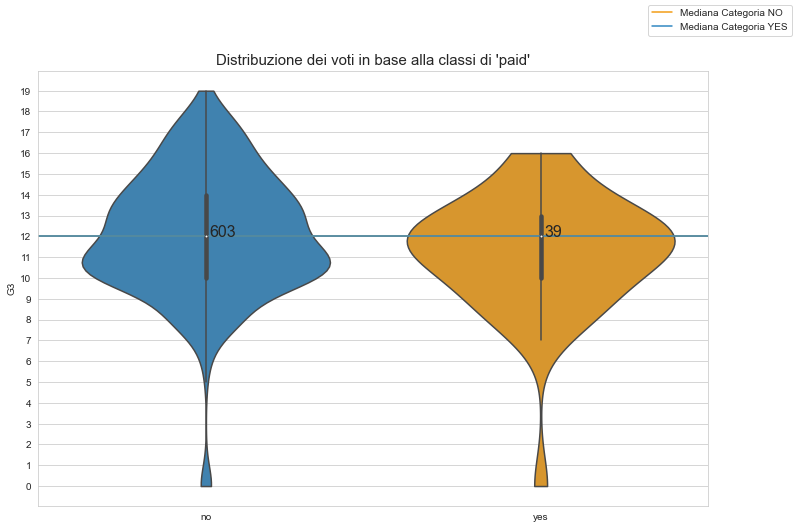

In [75]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
violin(personal, 'paid', ax, ['#2E86C1','#F39C12'])
median_no = personal[personal.paid == 'no']['G3'].median()
median_yes = personal[personal.paid == 'yes']['G3'].median()
ax.axhline(median_no, color='#F39C12', label='Mediana Categoria NO')
ax.axhline(median_yes, color='#2E86C1', label='Mediana Categoria YES')
str_of_nstudents_per_category = personal.paid.value_counts().to_list()
yposition_list = personal.groupby('paid')['G3'].median().tolist()
xposition_list = range(len(yposition_list))
for i in range(len(str_of_nstudents_per_category)):
    ax.text(xposition_list[i]+0.01, yposition_list[i],str_of_nstudents_per_category[i], size=16)
fig.legend()

Successivamente è stata analizzata la feature *activities*. Come visto in precedenza, tale feature è equalmente distribuita: per questo motivo, tale feature è stata analizzata considerando la media, come fatto per le features già analizzata nei paragrafi precedenti.

Feature activities: gli studenti con categoria no hanno una media finale pari a 11.79
Feature activities: gli studenti con categoria yes hanno una media finale pari a 12.3


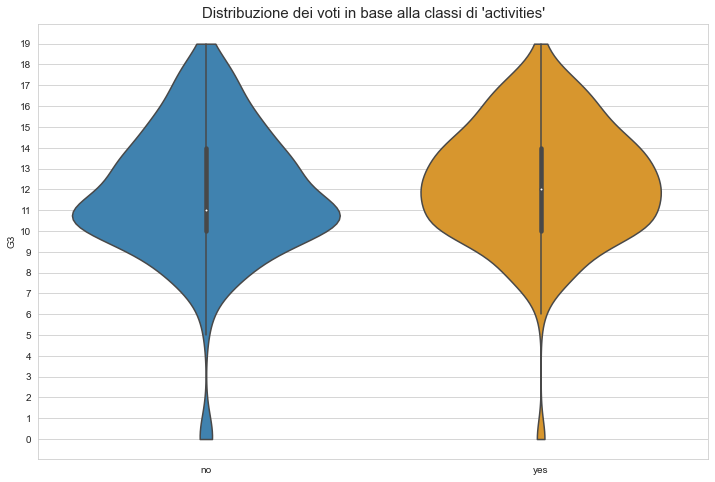

In [76]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
calcolo_media_categoriche(personal, 'activities')
violin(personal, 'activities', ax, ['#2E86C1','#F39C12'])

Analizzando quanto riportato sopra è possibile notare come non vi siano grandi differenze tra le valutazioni finali degli studenti delle due categorie della feature *activities*. Tuttavia, è possibile constatare che la maggior parte degli studenti che non frequentano attività extra-curriculari hanno una valutazione compresa tra 10 e 11, ovvero una valutazione sufficiente seconda la scala dei voti portoghese; mentre la maggior parter degli studenti che svolgono attività extra curriculari hanno una valutazione finale pari a 12, ovvero una valutazione discreta. A fronte di ciò, è possibile affermare che le valutazioni degli studenti che svolgono questo tipo di attività tendenzialmente ottengono voti finali migliori rispetto a coloro che non partecipano a tali attività. Tale considerazione, è confermata dai dati riguardanti la media riportati sopra il grafico: la media finale degli studenti della categoria *yes* è maggiore rispetto a coloro che fanno parte della categoria *no* di più di mezzo voto.

### Analisi delle informazioni relative alla famiglia dello studente

Una volta terminata l'analisi delle features "personali" e "scolastiche" dello studente, il seguente progetto è proseguito analizzando le features che riportano le informazioni relative alla famiglia dello studente.

#### Analisi della correlazione tra le dimensioni della famiglia e il voto finale

La prima feature analizzata della categoria "famiglia" è la variabile denominata *famsize*, la quale descrive la dimensione del nucleo familiare dello studente. Tale variabile, come specifcato nella pagina di Kaggle, può assumere solamente due valori: **LE3**, 3 o meno persone nel nuclo, e **GE3**, più di 3 persone). Per prima cosa si è voluto analizzare la distribuzione degli studenti nelle due categorie della feature in analisi.

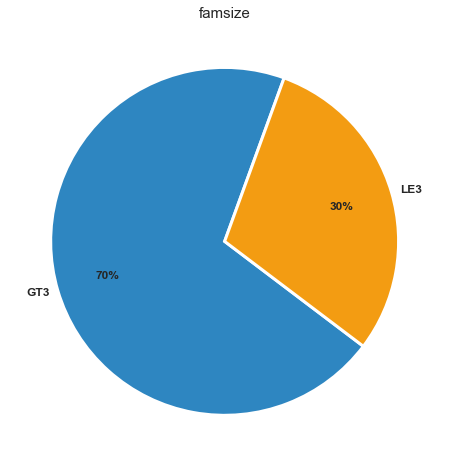

In [77]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
pie_distribution('famsize', family, ax)

Osservando il grafico sopra riportato è possibile notare come il nucleo della maggior parte degli studenti è formato da più di 3 persone: per la precisione il 70% degli studenti vive all'internod di nuclei familiari di tale dimensione.

Una volta ottenuta un'idea migliore della distribuzione degli studenti in funzione della dimensione del proprio nucleo familiare, si è voluto analizzare l'andamento scolastico considerando separatamente le due categorie della feature *famsize*. 

Feature famsize: gli studenti con categoria GT3 hanno una media finale pari a 11.97
Feature famsize: gli studenti con categoria LE3 hanno una media finale pari a 12.19


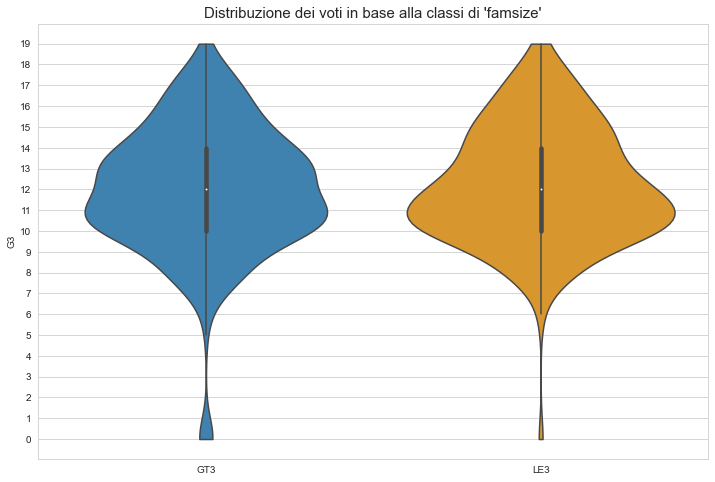

In [78]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
calcolo_media_categoriche(family, 'famsize')
violin(family, 'famsize', ax, ['#2E86C1','#F39C12'])

Analizzando il grafico sopra riportato è possibile notare come la maggior parte degli studenti di entrambe le categorie hanno otteute valutazioni finali pari a 11. Tuttavia, se si analizzano più dettagliatamente le due distribuzioni è possibile constatare che la percentuale di studenti con il nucleo familiare composto da massimo 3 individui (LE3) con voti finali superiori al 15, quindi valutazioni ottime o eccellenti, è maggiore rispetto a quella degli studenti della categoria *GT3*. A fronte di quanto appena descritto, è possibile affermare come gli studenti facenti parte di nuclei familiari composti al massimo da tre persone tendono ad avere voti leggermente migliori rispetto ai colleghi con nuclei familiari più grandi. Tale considerazione è confermata dai dati riguardanti la media finale delle due categorie: la media finale degli studenti della categoria LE3 è leggermente superiore a quella della categoria GT3.

#### Il convivere con i genitori influenza il voto finale?

La seconda feature "familiare" analizzata è la variabile denominata *Pstatus*, la quale indica se gli studenti convivono o meno con i propri genitori. Anche questa feature, come quella precedente, può assumere solamente due valor: **T** se gli studeti convivono con i gentiroi, **A** se non vivono con loro.

Per prima cosa si è voluto analizzare la distribuzione degli studenti in funzione della feature in analisi.

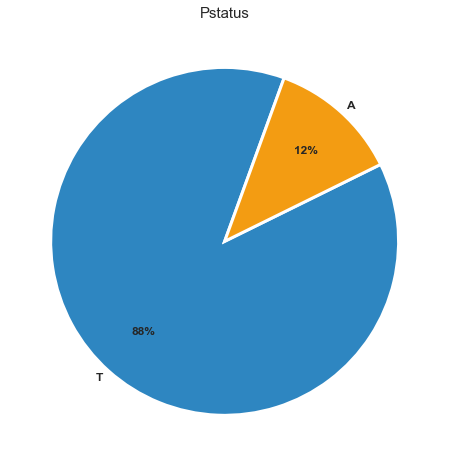

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
pie_distribution('Pstatus', family, ax)

Come è possibile notare analizzando il grafico sopra riportato, la maggior parte degli studenti vive insieme ai genitori. Il grafico, inoltre, mostra chiaramente il fatto che vi sia uno sbilanciamento tra le due classi: per questo motivo, si è optato per analizzare le distribuzioni delle valutazioni finali delle due categorie della feature *Pstatus* considerando la media come fatto in precedenza per altre features.

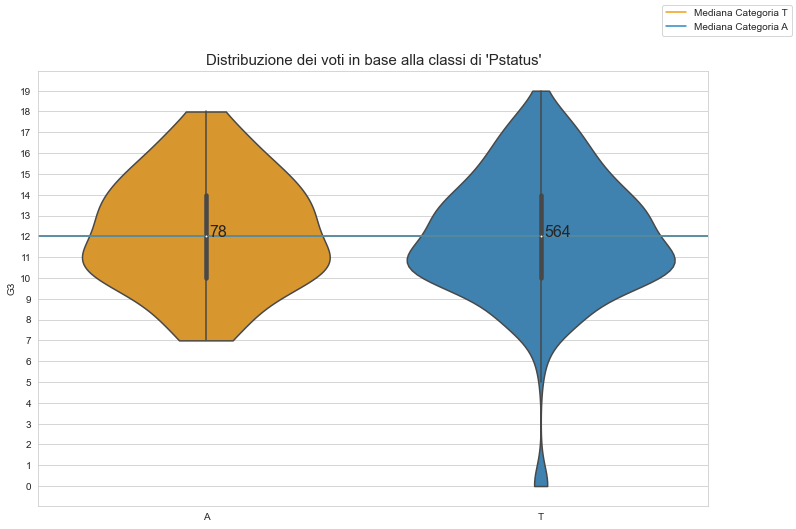

In [80]:
fig,ax = plt.subplots(1,1, figsize=(12,8))
violin(family, 'Pstatus', ax, ['#F39C12','#2E86C1'])
median_T= family[family.Pstatus == 'T']['G3'].median()
median_A = family[family.Pstatus == 'A']['G3'].median()
ax.axhline(median_T, color='#F39C12', label='Mediana Categoria T')
ax.axhline(median_A, color='#2E86C1', label='Mediana Categoria A')
str_of_nstudents_per_category = family.Pstatus.value_counts().to_frame().sort_index(ascending=True).Pstatus.to_list()
yposition_list = family.groupby('Pstatus')['G3'].median().to_frame().sort_values(by='Pstatus', ascending=False).G3.to_list()
xposition_list = range(len(yposition_list))
for i in range(len(str_of_nstudents_per_category)):
    ax.text(xposition_list[i]+0.01, yposition_list[i],str_of_nstudents_per_category[i], size=16)
fig.legend()

Analizzando il grafico sopra riportato è possibile notare come la mediane delle due categorie della feature *Pstatus* siano uguali, ovvero etrambi sono pari a 12. Inoltre, è possibile constatare come la maggior parte degli studenti di entrambe le categoria hanno ottenuto una valutazione finale pari a 11 (sufficiente). Inoltre, analizzando più nel dettaglio la distribuzione delle valutazioni finale degli studenti che vivono con i genitori è possibile notare come vi siano studenti che hanno ottenuto valutazioni inferiori a 7, ovvero la valutazione più bassa ottenuta dagli studenti che non vivono con i propri genitori. Tuttavia, è possibile notare anche che la percentuale di studenti con valutazione inferire al 10 (ovvero le valutazioni insufficienti) è più altra tra gli studenti che vivono da soli. A fronte di quanto appena descritto, non è possibile definre se vivere o meno con i genitori influisca sulla performance scolastica.

#### Analisi correlazione tra educazione dei genitori e il voto finale

L'analisi delle informazioni relative alla situazione famigliare degli studenti presenti all'interno del dataset è proseguita analizzando l'educazione dei genitori degli studenti, ovvero studiando le features *Medu*, relativa all'educazione della madre, e *Fedu*, relativa all'educazione del padre. Entrambe le features possono assumere i seguenti valori:

- **0**: ovvero nessuna educazione
- **1**: educazione primaria (4th grade)
- **2**: dalla classe quinta (5th grade) alla nona (9th grade)
- **3**: ovvero educazione di secondo livello
- **4**: educazione elevata (ad esepio universitaria)

Per rendere più leggibili i grafici che verranno creati per l'analisi degli studenti in funzioni delle due features appena descritte, si creano due dataframe, uno contenente l'educazione della madre e il voto finale e il secondo l'educazione del padre e la feature target. In entrambi i dataframe, inoltre, verrà aggiunta una colonna, denominata **Dicitura**, che conterrà la spiegazione del valore numerico.

In [81]:
# dataframe educazione madre
medu = family[['Medu', 'G3']]
# dataframe educazione padre
fedu = family[['Fedu', 'G3']]

medu.loc[medu.Medu == 0, 'Dicitura'] = 'No education'
medu.loc[medu.Medu == 1, 'Dicitura'] = '4th grade'
medu.loc[medu.Medu == 2, 'Dicitura'] = '5th grade - 9th grade'
medu.loc[medu.Medu == 3, 'Dicitura'] = 'Educazione secondo livello'
medu.loc[medu.Medu == 4, 'Dicitura'] = 'Educazione elevata'

fedu.loc[fedu.Fedu == 0, 'Dicitura'] = 'No education'
fedu.loc[fedu.Fedu == 1, 'Dicitura'] = '4th grade'
fedu.loc[fedu.Fedu == 2, 'Dicitura'] = '5th grade - 9th grade'
fedu.loc[fedu.Fedu == 3, 'Dicitura'] = 'Educazione secondo livello'
fedu.loc[fedu.Fedu == 4, 'Dicitura'] = 'Educazione elevata'

medu_count = medu.groupby('Dicitura').count()['Medu'].to_frame().reset_index()
totale_studenti = family.shape[0]
medu_count['Perc'] = round(medu_count.Medu / totale_studenti * 100,1)
medu_count = medu_count.sort_values(by='Perc', ascending=False)
fedu_count = fedu.groupby('Dicitura').count()['Fedu'].to_frame().reset_index()
fedu_count['Perc'] = round(fedu_count.Fedu / totale_studenti * 100, 1)
fedu_count = fedu_count.sort_values(by='Perc', ascending=False)

In [82]:
color_based_on_value = {'No education': '#BDC3C7', '4th grade': '#3498DB', '5th grade - 9th grade': '#8E44AD', 
                        'Educazione secondo livello': '#F39C12', 'Educazione elevata':'#2ECC71'}

Text(0.5, 1.0, 'Educazione del Padre')

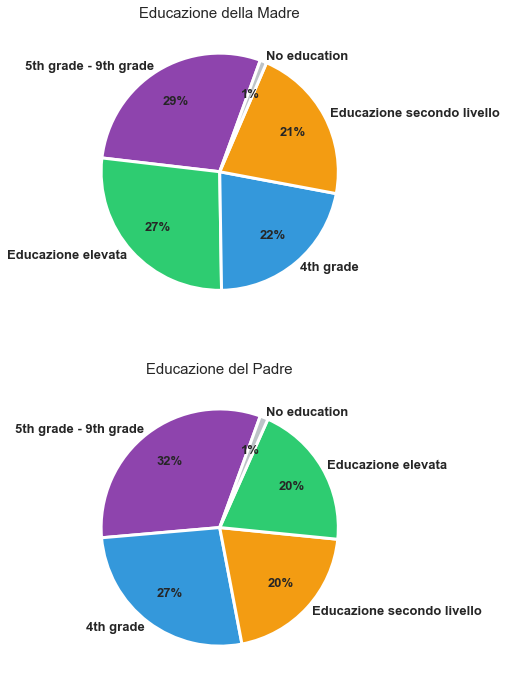

In [83]:
fig,ax = plt.subplots(2,1,figsize=(17,12))
ax[0].pie(medu_count.Perc, labels=medu_count['Dicitura'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in medu_count['Dicitura']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[0].set_title('Educazione della Madre', size=15 )
ax[1].pie(fedu_count.Perc, labels=fedu_count['Dicitura'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in fedu_count['Dicitura']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[1].set_title('Educazione del Padre', size=15 )

Analizzando i due grafici sopra riportati è possibile notare che:

- la maggior parte dei padri e delle madri degli studenti ha terminato il percorso di studi tra la quinta e la nona classe;
- solo l'1% dei padri e l'1% delle madri degli studenti non hanno nessuna educazione.

In seguito si è voluto analizzare la distribuzione dei voti degli studenti considerando l'educazione dei genitori separatamente.

Feature Dicitura: gli studenti con categoria 4th grade hanno una media finale pari a 11.03
Feature Dicitura: gli studenti con categoria 5th grade - 9th grade hanno una media finale pari a 11.79
Feature Dicitura: gli studenti con categoria Educazione elevata hanno una media finale pari a 13.14
Feature Dicitura: gli studenti con categoria Educazione secondo livello hanno una media finale pari a 12.01
Feature Dicitura: gli studenti con categoria No education hanno una media finale pari a 11.67


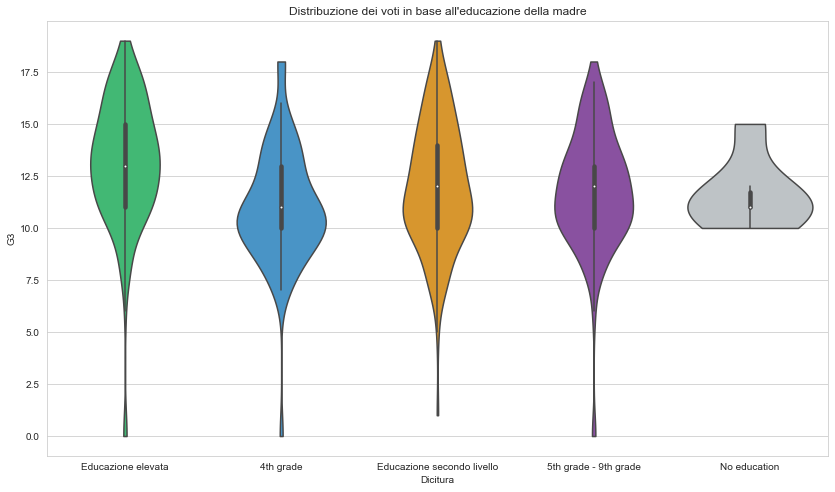

In [84]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(medu, 'Dicitura')
sns.violinplot(x='Dicitura', y='G3', cut=0, data = medu, ax=ax, palette = color_based_on_value)
plt.title("Distribuzione dei voti in base all'educazione della madre")
plt.show()

Analizzando il grafico sopra riportato è possibile notare come:
- gli studenti la cui madre non ha nessuna educazione (No education) hanno più difficoltà degli altri studenti ad ottenre valutazioni superiori al 15. Tale dato, tuttavia, è influenzato dal fatto che il numero di studenti appartenenti a tale categoria è nettamente inferiore a quello delle altre categorie.
- la maggior parte degli studenti con la madre che ha ottenuto un'educazione elevata ha una valutazione pari a 13, che è una valutazione nettamente maggiore rispetto alla maggior parte degli studenti delle altre categoria della feature relativa all'educazione della madre. 

A fronte di quanto appena descritto e considerando le medie delle valutazioni finali riportate sopra il grafico, è possibile affermare che gli studenti con la madre con un'educaione elevata tendono ad avere voti migliori degli altri. Al contrario, gli studenti che tendono ad avere voti migliori (esclusi coloro la cui madre non ha nessun tipo di educazione) sono coloro che appartengono alla categoria "4th grade", i quali per la maggior parte hanno ottenuto una valutazione pari a 10, ovvero sufficiente.

Feature Dicitura: gli studenti con categoria 4th grade hanno una media finale pari a 11.13
Feature Dicitura: gli studenti con categoria 5th grade - 9th grade hanno una media finale pari a 12.01
Feature Dicitura: gli studenti con categoria Educazione elevata hanno una media finale pari a 12.92
Feature Dicitura: gli studenti con categoria Educazione secondo livello hanno una media finale pari a 12.38
Feature Dicitura: gli studenti con categoria No education hanno una media finale pari a 12.14


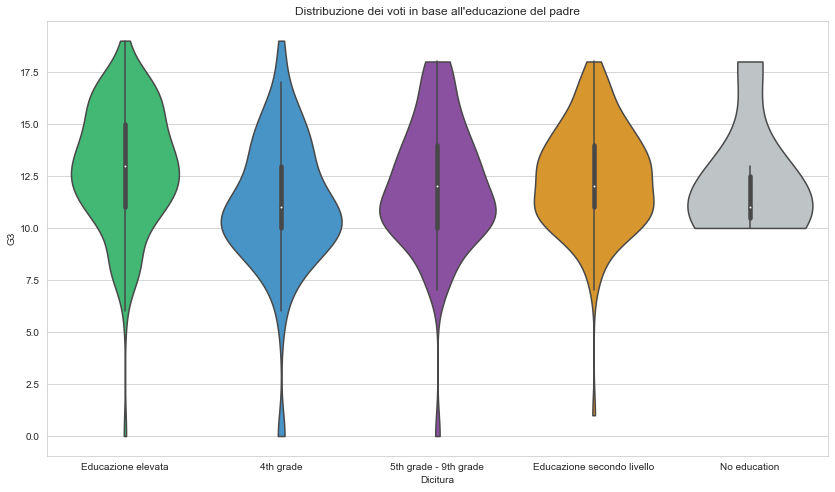

In [85]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(fedu, 'Dicitura')
sns.violinplot(x='Dicitura', y='G3', cut=0, data = fedu, ax=ax, palette = color_based_on_value)
plt.title("Distribuzione dei voti in base all'educazione del padre")
plt.show()

Analizzando il grafico sopra riportato, il quale rappresenta la distribuzione dei voti degli studenti della categoria *Fedu*, è possibile notare che:

- come notato in fase di analisi dell'educazione della madre, la valutazione ottenuta dalla maggior parte degli studenti con il padre che ha ottenuto un'educazione elevata è maggiore rispetto a quella ottenuta dagli studenti delle altre categorie della feature in analisi.
- anche in questo caso, gli studenti appartenenti alla categoria "4th grade" tendono ad avere voti peggiori rispetto agli studenti. 

A fronte di quanto appena descritto, si nota un comportamente molto simile delle valutazioni degli studenti in funzione dell'educazione della madre e del padre, ovvero: un'elevata educazione dei genitori comporta voti migliori negli studenti.

#### Il lavoro dei genitori influenza il voto finale?

Una volta analizzate le valutazioni finali degli studenti in funzione dell'educazione dei genitori, il progetto è proseguito con l'analisi di quanto ottenuto dagli studenti in funzione del lavoro dei propri genitori, ovvero le feature *Mjob* e *Fjob*.

Come specificato da Kaggle, entrambe le features sono categoriche e possono assumere i seguenti valori:

- **teacher**
- **health**
- **services** (civil services)
- **at_home**
- **other**

Per prima cosa si è voluto studiare la distribuzione degli studenti in funzione delle categorie di ciascuna feature.

In [86]:
color_based_on_value = {'teacher': '#BDC3C7', 'health': '#3498DB', 'services': '#8E44AD', 
                        'at_home': '#F39C12', 'other':'#2ECC71'}

In [87]:
mjob = family.Mjob.value_counts(normalize=True).to_frame().reset_index()
mjob.columns = ['Mjob', 'Perc']

fjob = family.Fjob.value_counts(normalize=True).to_frame().reset_index()
fjob.columns = ['Fjob', 'Perc']

Text(0.5, 1.0, 'Lavoro del Padre')

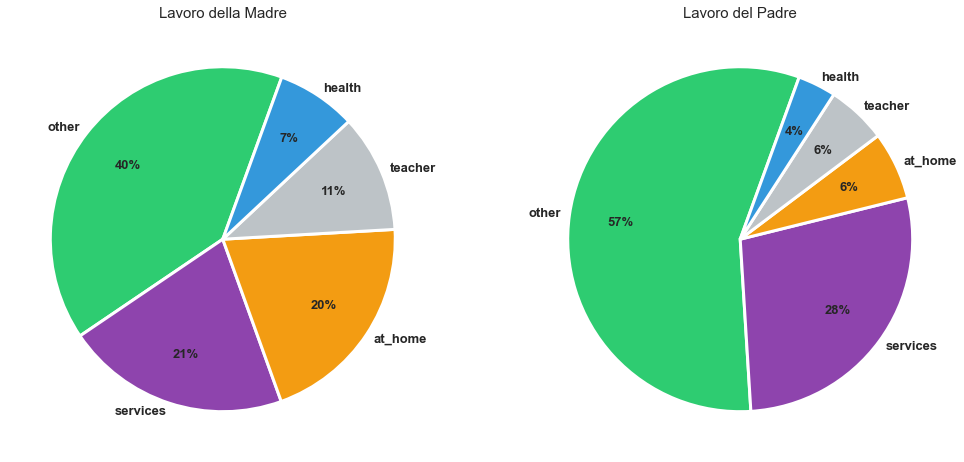

In [88]:
fig,ax = plt.subplots(1,2,figsize=(17,12))
ax[0].pie(mjob.Perc, labels=mjob['Mjob'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in mjob['Mjob']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[0].set_title('Lavoro della Madre', size=15 )
ax[1].pie(fjob.Perc, labels=fjob['Fjob'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in fjob['Fjob']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
ax[1].set_title('Lavoro del Padre', size=15 )

Analizzando i due grafici sopra riportati è possibile notare come:

- la maggior parte delle madri e dei padri degli studenti ha un lavoro che non è ben identificato (cateogira *other*), nel caso dei padri più della metà (57%) fa parte della seguente categoria;
- il 21% delle madri e il 26% dei padri lavora nel settore dei servizi civili (*services*);
- il 20% delle madri e il 6% dei padri è senza lavoro (*at home*);
- l'11% delle madri e il 6% dei padri è insegnante;
- il 7% delle madri e il 6% dei padri fa parte della categoria *health*.

In seguito si è voluto analizzare la distribuzione dei voti degli studenti considerando l'educazione dei genitori separatamente.

Feature Mjob: gli studenti con categoria at_home hanno una media finale pari a 11.38
Feature Mjob: gli studenti con categoria health hanno una media finale pari a 13.06
Feature Mjob: gli studenti con categoria other hanno una media finale pari a 11.72
Feature Mjob: gli studenti con categoria services hanno una media finale pari a 12.24
Feature Mjob: gli studenti con categoria teacher hanno una media finale pari a 13.32


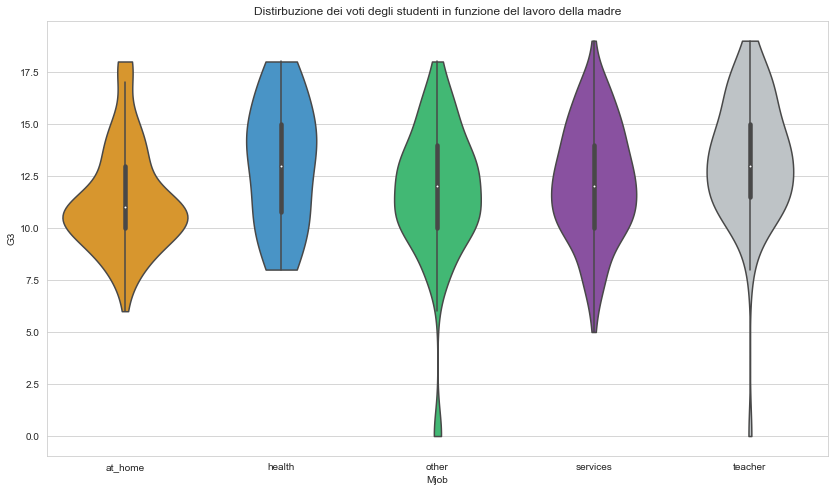

In [89]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(family, 'Mjob')
sns.violinplot(x='Mjob', y='G3', cut=0, data = family, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del lavoro della madre')
plt.show()

Analizzando il grafico sopra riportato, nel quale sono state rappresentate le distribuzioni dei voti degli studenti in funzione del lavoro della madre, è possibile notare che:

- la maggior parte degli studenti con la feature *Mjob* uguale a *teacher* hanno ottenuto valutazion finali pari a 13, ovvero dei giudizi migliori rispetto agli studenti la cui madre svolge un lavoro diverso da quello dell'insegnante; eccezione fatta per gli studenti con la madre che lavora nel settore *health* dove la maggior parte dei voti è pari a 14. Anche se, come è stato possibile vedere in precedenza, la percentuale di studenti con feature *Mjob* valorizzata a *health* sono solo il 7% del totale, è possibile affermare come gli studenti la cui madre lavora come insegnante o nel settore *health* hanno tendenzialmente voti migliori rispetto agli altri. 
- gli studenti la cui madre non ha un lavoro (feature *Mjob* valorizzata *at_home*) oppure non è specificata l'occupazione (*other*) hanno voti tendenzialemente peggiori rispetto agli altri.

Feature Fjob: gli studenti con categoria at_home hanno una media finale pari a 11.71
Feature Fjob: gli studenti con categoria health hanno una media finale pari a 12.57
Feature Fjob: gli studenti con categoria other hanno una media finale pari a 12.02
Feature Fjob: gli studenti con categoria services hanno una media finale pari a 11.76
Feature Fjob: gli studenti con categoria teacher hanno una media finale pari a 13.58


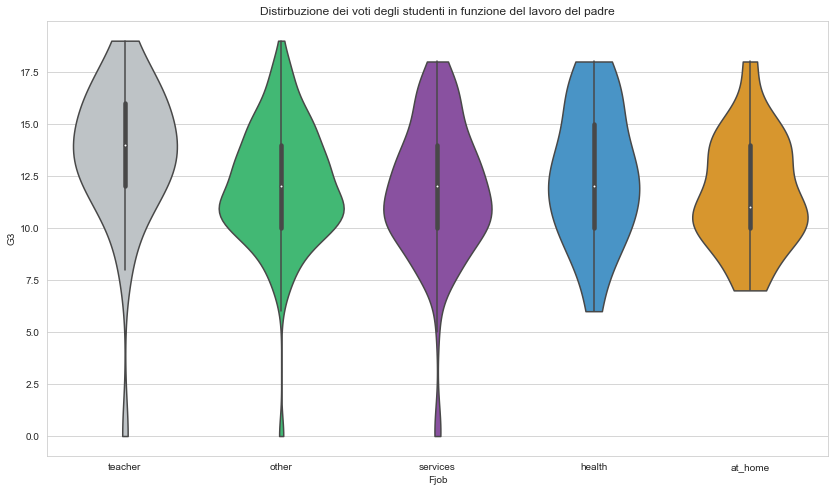

In [90]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(family, 'Fjob')
sns.violinplot(x='Fjob', y='G3', cut=0, data = family, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del lavoro del padre')
plt.show()

Analizzando il grafico sopra riportato, rappresentante la distribuzione dei voti degli studenti in funzione del lavoro del proprio padre, è possibile notare come:

- gli studenti il cui padre è un insegnante hanno voti tendenzialmente migliori rispetto agli altri, dal momento che la maggior parte di tali studenti ha ottenuto una valutazione maggiore rispetto alla maggior parte degli studenti delle altre categorie della feature *Fjob*.
- gli studenti con la feature *Fjob* valorizzata con *at_home* e *services* sono coloro, invece, che hanno ottenuto (in percentuale) il numero maggiore di valutazioni insufficienti.

Per concludere l'analisi sulla correlazione tra il lavoro dei genitori e le valutazioni degli studenti, è possibile affermare come coloro i cui genitori (almeno uno) è insegnante tendono ad avere voti migliori rispetto agli altri, mentre coloro che hanno almeno un genitore senza lavoro hanno più difficoltà ad avere voti positivi.

#### Chi è il tutore dello studente influenza l'andamento scolastico?

Una volta analizzato lo stato occupazionale dei genitori degli studenti, il progetto è proseguito studianto la possibile correlazione tra l'andamento scolastico degli studenti in funzione del proprio tutore, ovvero analizzando la feature *guardian*.

Come specificato da Kaggle, tale feature può assumere tre valori differenti:

- *mother*, quando il tutore dello studente è la madre;
- *father*, quando il tutore dello studente è il padre;
- *other*, quando il tutore dello studente è una persona diversa dai propri genitori.

Per prima cosa, anche in questo caso, si è voluto analizzare la distribuzione degli studneti in base alle categorie della feature *guardian*.

In [91]:
color_based_on_value = {'other': '#BDC3C7', 'mother': '#8E44AD', 'father': '#3498DB'}

In [92]:
guardian = family.guardian.value_counts(normalize=True).to_frame().reset_index()
guardian.columns = ['guardian', 'Perc']

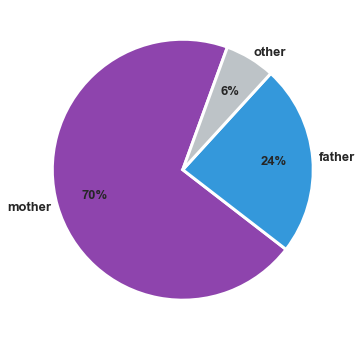

In [93]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.pie(guardian.Perc, labels=guardian['guardian'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in guardian['guardian']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
plt.show()

Come è possibile notare dalla torta sopra riportata, la maggior parte degli studenti (70%) ha come tutore la propria madre, mentre il 24% il padre e solo il 6% una persona diversa dai propri genitori.
Successivamente, si è voluto analizzare la distribuzione dei voti degli studenti in funzione del proprio tutore.

Feature guardian: gli studenti con categoria father hanno una media finale pari a 12.28
Feature guardian: gli studenti con categoria mother hanno una media finale pari a 12.03
Feature guardian: gli studenti con categoria other hanno una media finale pari a 11.18


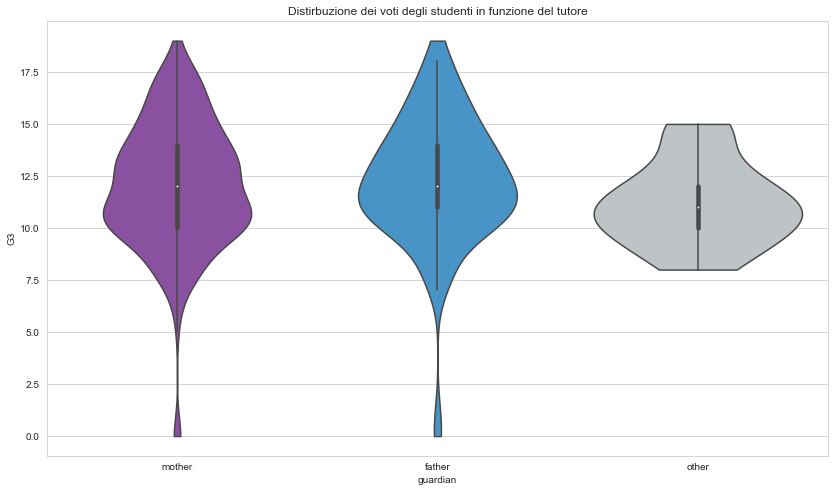

In [94]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(family, 'guardian')
sns.violinplot(x='guardian', y='G3', cut=0, data = family, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del tutore')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come gli studenti il cui tutore non è un proprio genitore, fanno più fatica rispetto agli altri a raggiungere voti superiore al 15, ovvero non raggiungono voti ottimi o eccellenti. Per quanto riguarda gli studenti con tutore la madre o il padre è possibile notare come la maggior parte degli studenti con tutore il padre ha ottenuto una valutazione pari a 12, mentre la maggior parte degli studenti con tutore la madre una valutazione pari a 11. Sembra, quindi, che coloro il cui tutore è+ il padre tendono ad avere voti migliori rispetto agli altri. Tuttavia, considerando, il minor numero di studenti con la feature *guardian* valorizzata con *father*, rispetto a coloro il cui tutore è la madre, tale differenza non è ben visibile.

Di conseguenza, è possibile affermare, in funzione del grafico sopra riportato, che gli studenti con tutore uno dei propri dei genitori ha voti tendenzialmente migliori rispetto a chi come tutore ha una persona diversa dal padre o dalla madre, ma non vi è una netta differenza tra chi ha come tutore il padre o la madre.

#### Avere un supoorto educazionale dalla famiglia influenza l'andamento scolastico?

Il progetto è proseguito analizzando la feature *famsup*, la quale descrive se gli studenti godono di supporto educazionale da parte della propria famiglia o no, e la sua correlazione con il voto finale degli studenti.

Come definito da Kaggle, tale variabile può assumere due valori: *yes* o *no*.

Per prima cosa si è voluto analizzare la distribuzione degli studenti nelle due categorie della feature in analisi.

In [95]:
color_based_on_value = {'yes': '#28B463', 'no': '#CB4335'}
famsup = family.famsup.value_counts(normalize=True).to_frame().reset_index()
famsup.columns = ['famsup', 'Perc']

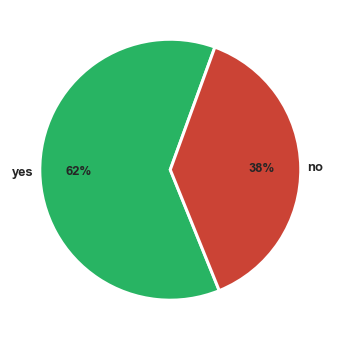

In [96]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.pie(famsup.Perc, labels=famsup['famsup'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in famsup['famsup']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
plt.show()

La maggior parte degli studenti, più precisamente il 62%, gode di supporto educazionale da parte della propria famiglia. 

In seguito, si è voluto analizzare la distribuzione delle valutazioni finali degli studenti in base alla categorie della feature *famsup*.

Feature famsup: gli studenti con categoria no hanno una media finale pari a 11.9
Feature famsup: gli studenti con categoria yes hanno una media finale pari a 12.12


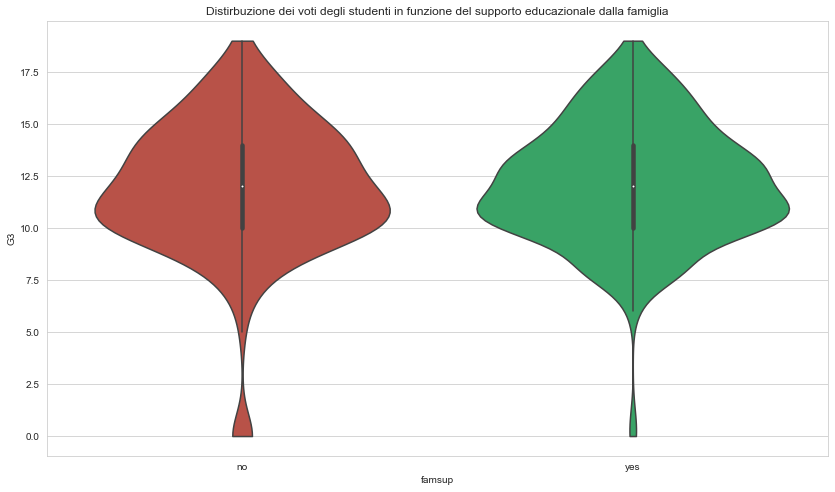

In [97]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
calcolo_media_categoriche(family, 'famsup')
sns.violinplot(x='famsup', y='G3', cut=0, data = family, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del supporto educazionale dalla famiglia')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come non vi sia una particolare differenza tra le due distribuzioni, come confermato dai dati relativi alle medie finali delle due categorie.

#### La qualità della relazione con la propria famiglia influisce sul voto finale?

L'ultima feaure che descrive la famiglia dello studente è la feature *famrel*, la quale riporta la qualità della relazione dello studente con la propria famiglia.

Tale feature può assumere valori che vanno da 0, dove la relazione è pessima, a 5, eccellente relazione con la propria famiglia.

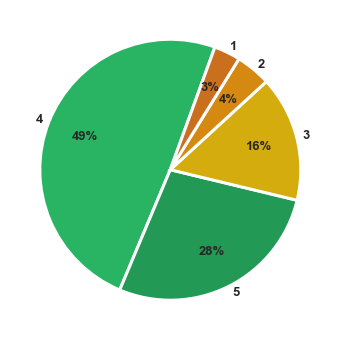

In [98]:
color_based_on_value = {0: '#BA4A00', 1: '#CA6F1E', 2:'#D68910', 3:'#D4AC0D', 4:'#28B463', 5:'#229954'}
famrel = family.famrel.value_counts(normalize=True).to_frame().reset_index()
famrel.columns = ['famrel', 'Perc']
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.pie(famrel.Perc, labels=famrel['famrel'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in famrel['famrel']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
plt.show()

Come è possibile notare analizzando il grafico sopra riportato, la maggior parte degli studenti ha un'ottima o eccellente relazione con la propria famiglia (valori 4 e 5 della feature *famrel*). Solo il 3% ha una relazione pessima (valore 1) o appena migliore (valore 2).

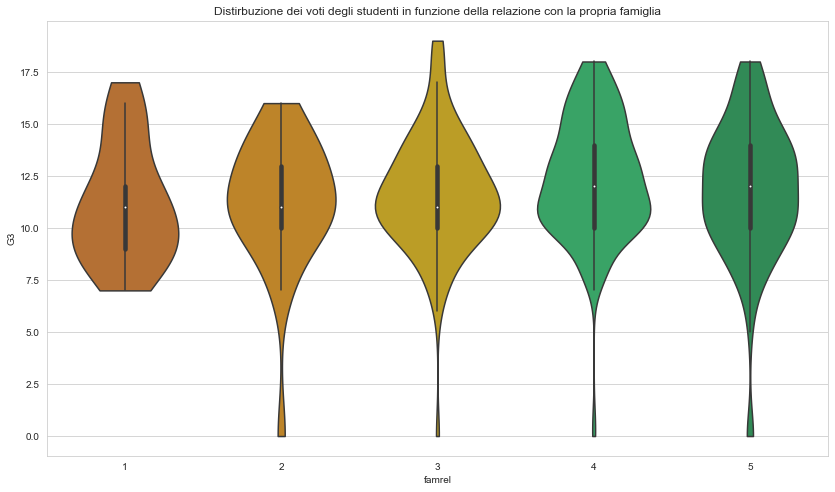

In [99]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='famrel', y='G3', cut=0, data = family, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione della relazione con la propria famiglia')
plt.show()

Analizzando il grafico sopra riportato, il quale rappresenta la distribuzione dei voti degli studenti in funzione della relazione con la propria famiglia, è possibile notare come:
- gli studenti che hanno una pessima relazione (valori 1 o 2) difficilmente raggiungono valutazioni finali superiori al 17;
- gli studenti con una relazione ottima (valore 4) hanno tendenzialmente voti migliori rispetto agli altri, in quanto rispetto alle altre categorie, soprattutto **3** e **5**, gli studenti con tale tipo di qualità relazionale ottengono voti negativi con più difficoltà rispetto agli altri. Tuttavia, la differenza è minima.

A fronte di quanto appena descritto. è possibile affermare che gli studenti con una pessima relazione familiare sono coloro che tendenzialmente ottengono valutazioni peggiori, mentre per quanto riguarda coloro che ottengono con più facilità valutazioni migliori non è possibile individuare una categoria nettamente migliore delle altre.

### Analisi delle informazioni relative alla vita extra-scolastica degli studenti

Una volta terminata l'analisi delle informazioni "familiari" il progetto è proseguito con lo studio delle informazioni relative alla vita extra-scolastica degli studenti, ovvero l'analisi di tutte le feature che sono state inserite all'interno del dataframe *life*.

In [100]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 648
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  642 non-null    int64 
 1   internet    642 non-null    object
 2   romantic    642 non-null    object
 3   freetime    642 non-null    int64 
 4   goout       642 non-null    int64 
 5   Dalc        642 non-null    int64 
 6   Walc        642 non-null    int64 
 7   sex         642 non-null    object
 8   school      642 non-null    object
 9   G3          642 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 71.3+ KB


#### Il tempo passato in viaggio da casa a scuola influisce sul voto finale?

La prima feature "life" analizzata è stata *traveltime*, la quale descrive quanto tempo è necessario agli studenti per raggiungere la scuola dalla propria abitazione. Come descritto da Kaggle tale feature può assumere 4 valori numerici dall'1 al 4 i quali rappresentano quanto segue:

- **1**, il tempo per raggiungere la scuola è meno di 15 minuti;
- **2**,  per raggiungere la scuola occorrono dai 15 ai 30 minuti;
- **3**, per raggiungere la scuola occorrono dai 30 ai 60 minuti;
- **4**, il tempo per raggiungere la scuola è maggiore di 60 minuti.

Per questo motivo, si è voluto creare una colonna aggiuntiva al dataframe *life*, denominata *Traveltime_Desc*, la quale è stata valorizzata come segue:
- *Meno di 15 minuti*, se il valore di *traveltime* è 1;
- *15-30 minuti*, se il valore di *traveltime* è 2;
- *30-60 minuti*, se il valore di *traveltime* è 3;
- *Più di 60 minuti*, se il valore di *traveltime* è 4;

In [101]:
#creazione colonna Traveltime_Desc
life.loc[life.traveltime == 1, 'Traveltime_Desc'] = 'Meno di 15 minuti'
life.loc[life.traveltime == 2, 'Traveltime_Desc'] = '15-30 minuti'
life.loc[life.traveltime == 3, 'Traveltime_Desc'] = '30-60 minuti'
life.loc[life.traveltime == 4, 'Traveltime_Desc'] = 'Più di 60 minuti'

Successivamente, si è voluto analizzare la distribuzione degli studenti in relazione al tempo che impiegano per raggiungere la scuola dalla propria abitazione.

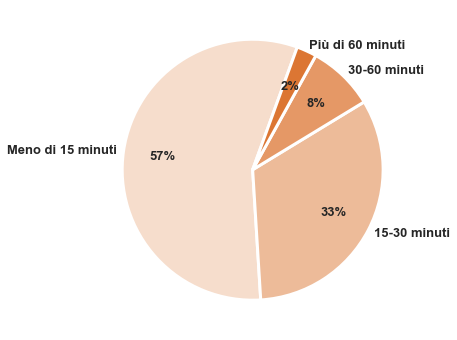

In [102]:
color_based_on_value = {'Meno di 15 minuti':'#F6DDCC', '15-30 minuti':'#EDBB99', '30-60 minuti':'#E59866', 
                        'Più di 60 minuti':'#DC7633'}
traveltime = life.Traveltime_Desc.value_counts(normalize=True).to_frame().reset_index()
traveltime.columns = ['traveltime', 'Perc']
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.pie(traveltime.Perc, labels=traveltime['traveltime'],
          startangle=70, pctdistance =0.70, autopct='%.0f%%',
          colors = [color_based_on_value[p] for p in traveltime['traveltime']],
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':13},
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" })
plt.show()

Come è possibile vedere nel grafico sopra riportato:
- il 57% degli studenti impiega meno di 15 minuti a raggiungere la scuola e il 33% degli studenti dai 15 ai 30 minuti. È possibile, quindi, dire che la maggior parte degli studenti, più precisamente il 90%, impiega meno di 30 minuti a raggiungere la scuola.
- l'8% degli studenti impiega dai 30 ai 60 minuti, mentre solo il 2% impiega più di 60 minuti.

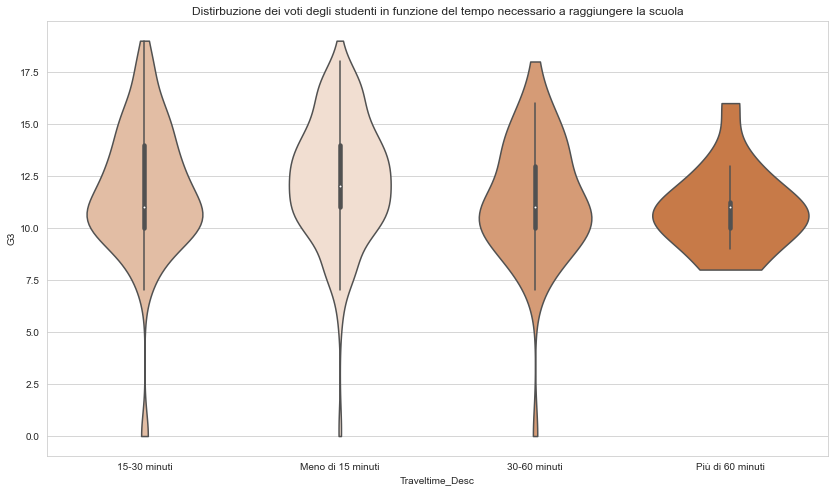

In [103]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='Traveltime_Desc', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del tempo necessario a raggiungere la scuola')
plt.show()

Analizzando il grafico sopra riportato, il quale rappresenta la distribuzione delle valutazioni finali degli studenti in funzione del tempo necessario per raggiungere la scuola, è possibile notare come 
- gli studenti che viaggiano più di 60 tendono ad avere voti peggiori rispetto agli altri.
- gli studenti che impiegano meno di 15 minuti a raggiungere la scuola hanno ottenuto una valutazione pari a 12, la quale è migliore di quelle ottenute dalla maggior parte deglis studenti delle altre categorie.
- la dsitribuzione dei voti delle classi '15-30 minuti' e '30-60 minuti' sembrano molto simili, se si considera il fatto che in entrambi la valutazione ottenuta maggiormente è 11. Tuttavia, è possibile notare come vi siano, in percentuale, più voti negativi (sotto il 10) tra coloro che impiegano dai 30 ai 60 minuti a raggiungere la scuola.

A fronte di ciò è possibile affermare che chi impiega meno tempo a raggiungere la scuola tende ad avere voti migliori rispetto agli altri.

#### La quantità di tempo libero influenza il voto finale?

Successivamente, si è voluto analizzare il voto finale degli studenti in relazione al loro tempo libero. Come specificato sulla pagina Kaggle, tale feature può assumere valori che vanno dall'1 (veramente poco) a 5 (molto tempo libero).

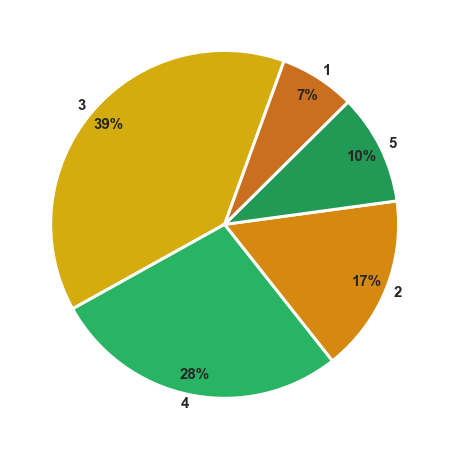

In [104]:
color_based_on_value = {0: '#BA4A00', 1: '#CA6F1E', 2:'#D68910', 3:'#D4AC0D', 4:'#28B463', 5:'#229954'}
freetime = life.freetime.value_counts(normalize=True).to_frame().reset_index()
freetime.columns = ['freetime', 'Perc']

fig = plt.figure(figsize=(8,8))
plt.pie(freetime.Perc, labels=freetime['freetime'],
          startangle=70, pctdistance =0.88, autopct='%.0f%%',
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':15},
          colors = [color_based_on_value[p] for p in freetime['freetime']],
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
plt.show()

Analizzando il grafico sopra riportato, è possibile notare come la maggior parte degli studenti dichiara che il proprio tempo libero dopo la scuola è pari a 3 (valore medio). Solamente il 7% degli studenti ha pochissimo tempo libero (1), mentre il 10% ha molto tempo libero (5)

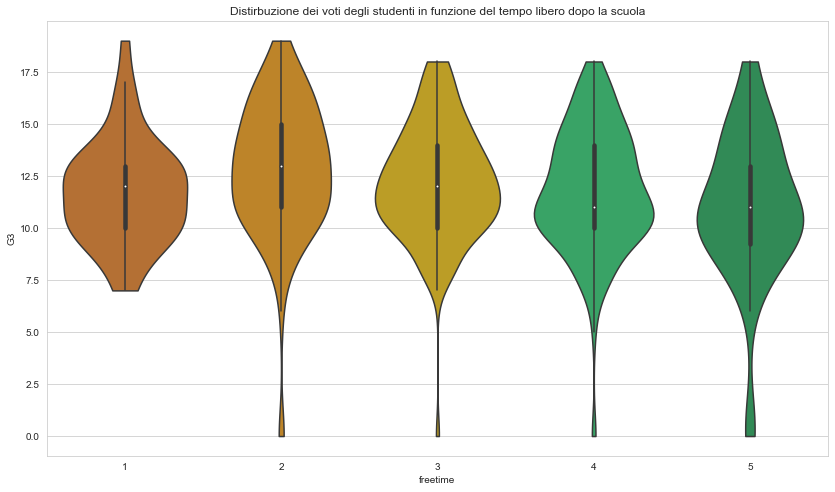

In [105]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='freetime', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del tempo libero dopo la scuola')
plt.show()

Analizzando il grafico sopra riportato non è possibile determinare quanto sia il tempo libero ideale affinché uno studente vada bene a scuola, in quanto non è vi è una netta differenza tra le diverse distribuzione rappresentate all'interno di tale grafico.

#### Avere accesso a internet influenza l'andamento scolastico?

In seguito, si è voluto analizzare il voto finale degli studenti considerado se quest'ultimi hanno o meno accesso a internet, ovvero è stata studiata la feature *interne*, la quale può assumere 'yes' se gli studenti hanno l'accesso, oppure 'no' in caso contrario.

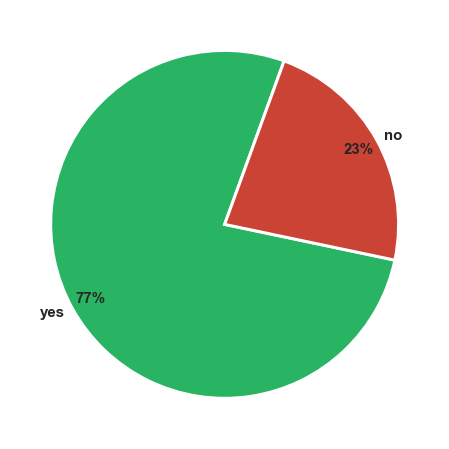

In [106]:
color_based_on_value = {'yes': '#28B463', 'no': '#CB4335'}
internet = life.internet.value_counts(normalize=True).to_frame().reset_index()
internet.columns = ['internet', 'Perc']
fig = plt.figure(figsize=(8,8))
plt.pie(internet.Perc, labels=internet['internet'],
          startangle=70, pctdistance =0.88, autopct='%.0f%%',
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':15},
          colors = [color_based_on_value[p] for p in internet['internet']],
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
plt.show()

Analizzando la distribuzione degli studenti in funzione della feature *internet* rappresentata nel grafico sopra riportato, è possibile notare come la maggior parte degli studenti, più precisamente il 77%, ha accesso a internet.

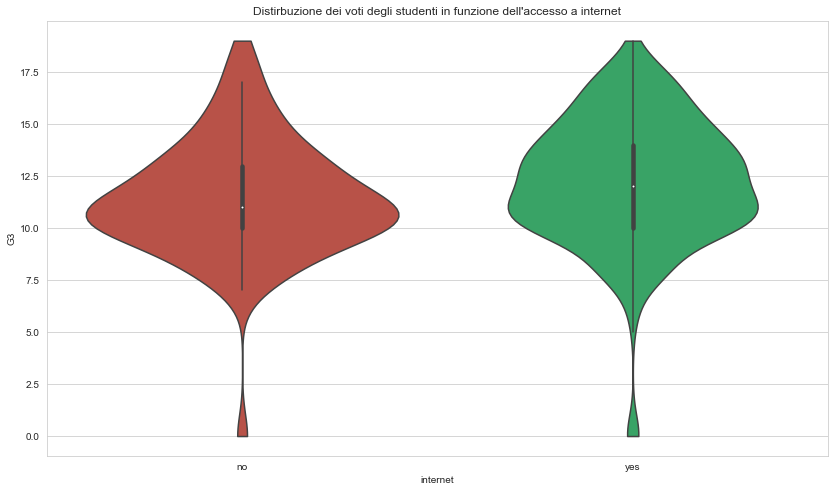

In [107]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='internet', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title("Distirbuzione dei voti degli studenti in funzione dell'accesso a internet")
plt.show()

Analizzando il grafico sopra riportato, il qual rappresenta la distribuzione dei voti finale in relazione alla feature *internet*, è possibile notare come le valutazioni degli studenti che hanno accesso a internet siano tendenzialemtne migliori rispetto a quelli di coloro che non ce l'hanno. Infatti, è possibile notare come la magigor parte degli studenti che non hanno accesso a internet hanno ottenuto una valutazione pari a 10 o inferiore, mentre coloro che hanno accesso una valutazione pari a 11 o superiore.

#### Avere una relazione romantica influenza l'andamento scolastico?

In seguito, si è voluto studiare la relazione tra il voto finale degli studenti e la feature *romantic*, la quale indica se gli studneti hanno o meno una relazione romantica. Tale feature, come la precedente, può assumere il valore 'yes' se uno studente ha una relazione romantica, 'no' in caso contrario.

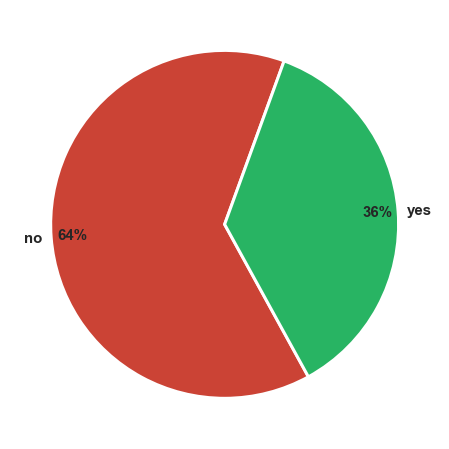

In [108]:
color_based_on_value = {'yes': '#28B463', 'no': '#CB4335'}
romantic = life.romantic.value_counts(normalize=True).to_frame().reset_index()
romantic.columns = ['romantic', 'Perc']
fig = plt.figure(figsize=(8,8))
plt.pie(romantic.Perc, labels=romantic['romantic'],
          startangle=70, pctdistance =0.88, autopct='%.0f%%',
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':15},
          colors = [color_based_on_value[p] for p in romantic['romantic']],
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
plt.show()

Analizzando la distribuzione degli studenti in base alla feature *romantic* sopra rappresentata, è possibile notare come la maggior parte degli studenti, più precisamente il 64%, non hanno una relazione romantica.

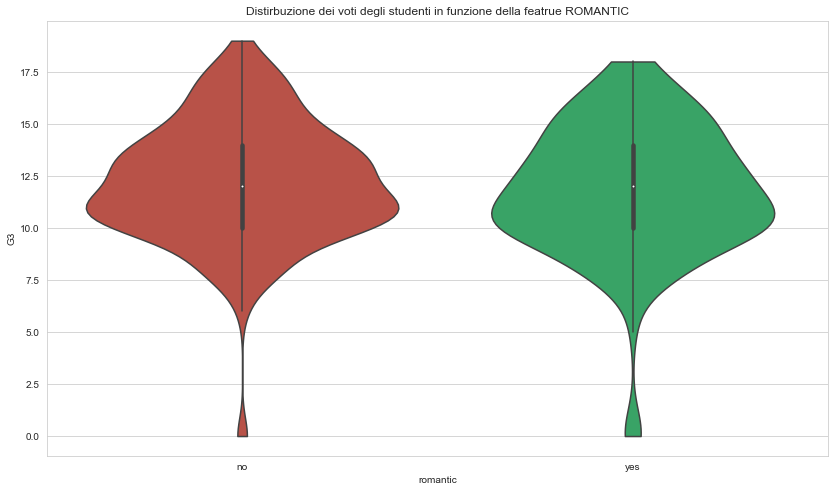

In [109]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='romantic', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title("Distirbuzione dei voti degli studenti in funzione della featrue ROMANTIC")
plt.show()

Analizzando le distribuzioni dei voti finali in funzione della feature che si sta studiando nel seguente paragrafo, è possibile notare come i voti di coloro che non hanno una relazione siano tendenzialemente migliori rispetti a chi, invece, ne ha una. Questo comportamento potrebbe essere dettato dal fatto che coloro che hanno una relazione romantica preferiscono togliere tempo allo studio per uscire/frequentare un'altra persona.

#### Uscire maggiormente con i propri amici influenza il voto finale?

In seguito, si è voluto analizzare se il voto finale è in qualche modo influenzato da quanto spesso gli studenti escono con i propri amici. Di conseguenza, la feature ceh è stata analizzata è quella denominata *goout*. Come specificato da Kagglie, tale feature può assumere valori che vanno da 1 (molto poco) a 5 (veramente tanto).

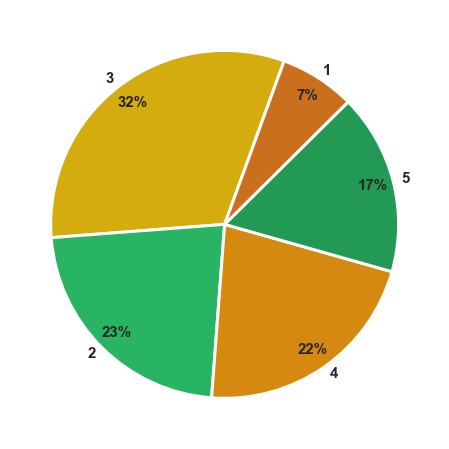

In [110]:
color_based_on_value = {0: '#BA4A00', 1: '#CA6F1E', 2:'#D68910', 3:'#D4AC0D', 4:'#28B463', 5:'#229954'}
goout = life.goout.value_counts(normalize=True).to_frame().reset_index()
goout.columns = ['goout', 'Perc']

fig = plt.figure(figsize=(8,8))
plt.pie(goout.Perc, labels=goout['goout'],
          startangle=70, pctdistance =0.88, autopct='%.0f%%',
          radius= 1.0, labeldistance=1.05,textprops ={ 'fontweight': 'bold','fontsize':15},
          colors = [color_based_on_value[p] for p in freetime['freetime']],
          wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
plt.show()

Analizzando la distribuzione degli studenti in funzione di quanto spesso escono con gli amici rappresentata nel grafico sopra riportato, è possibile notare come la maggiorparte degli studenti escono con i propri amici con una frequenza media (3 o 4). 

Successivamente, quindi, si è voluto analizzare le valutazioni finali degli studenti in funzione della frequenza di uscita con gli amici, ovvero in funzione della feature *goout*.

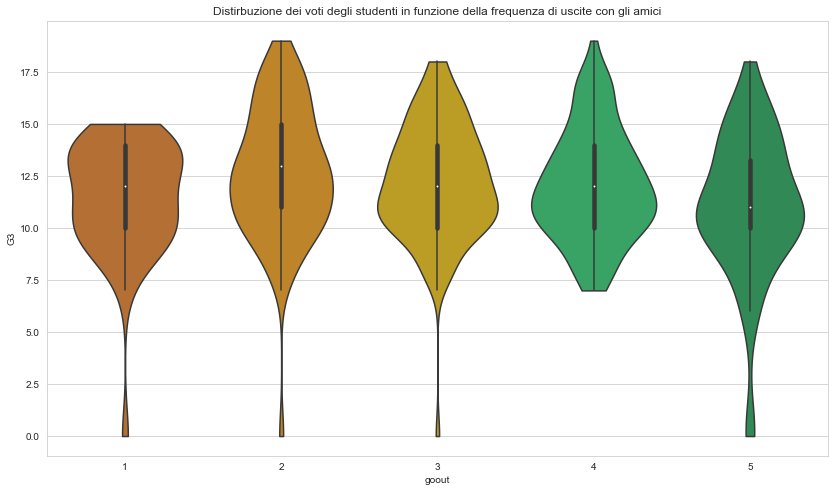

In [111]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='goout', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione della frequenza di uscite con gli amici')
plt.show()

Analizzando il grafico sopra riportato, non è possibile notare particolari comportamenti che permettano di affermare che la frequenza di uscita degli studenti possa influenzare in qualche modo il voto finale dei ragazzi.

Potrebbe essere interessante analizzare come varia il tempo passato con gli amici in funzione del sesso degli studenti. Per questo motivo, di seguito si è voluto analizzare se i maschi escono con gli amici più spesso delle ragazze o viceversa.

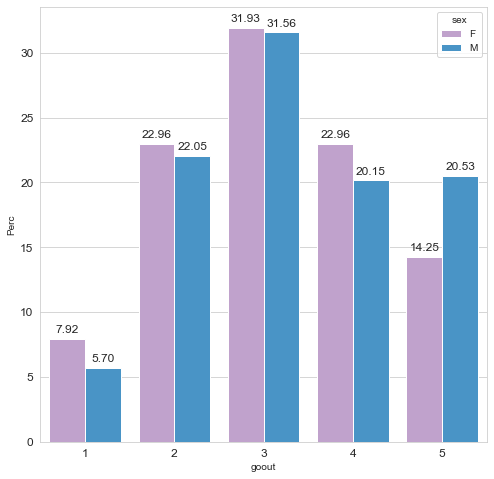

In [112]:
distribuzione_per_sesso(life, 'goout')

Analizzando il grafico sopra riportato è possibile notare come non vi siano grandi differenze di comportamento tra i ragazzi e le ragazze. Tuttavia, è possibiel notare come la percentuale di maschi che escono con gli amici con la frequenza più alta (5) è maggiore di quasi 6 punti rispetto a quella delle ragazze: questa è la differenza più grande che è possibile notare.

#### Il consumo di alcolici influenza il voto finale?

Per analizzare l'influenza del consumo di alcolici sul voto finale si rende necessario analizzare due features differenti: *Dalc* and *Walc*, che indicano, rispettivamente, il consumo di alcolici durante i giorni lavorativi e durante il weekend. Entrambe le features possono assumere valori che vanno da 1 (molto poco) a 5 (veramente tanto), come specificato da Kaggle.

Di seguito quindi si è voluto analizzare la distribuzione degli studenti in funzione di queste due features.

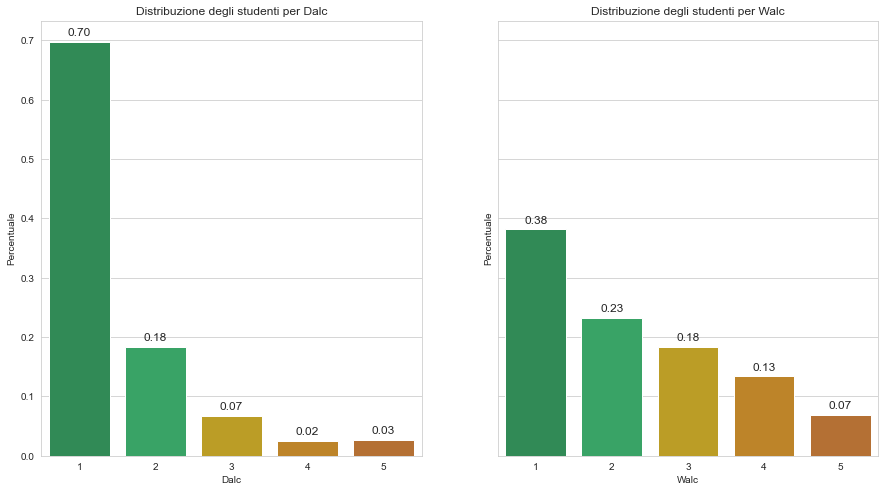

In [113]:
dalc = life.Dalc.value_counts(normalize=True).to_frame().reset_index()
dalc.columns = ['Dalc', 'Percentuale']
walc = life.Walc.value_counts(normalize=True).to_frame().reset_index()
walc.columns = ['Walc', 'Percentuale']

color_based_on_value = {5: '#CA6F1E', 4:'#D68910', 3:'#D4AC0D', 2:'#28B463', 1:'#229954'}
fig, ax = plt.subplots(1,2,figsize=(15,8), sharey='row')
g = sns.barplot(x=dalc.Dalc, y=dalc.Percentuale, ax=ax[0], palette=color_based_on_value)
for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'),
                      (p.get_x()+p.get_width() /2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0,9),
                      textcoords = 'offset points',
                      size=12)
g1 = sns.barplot(x=walc.Walc, y=walc.Percentuale, ax=ax[1], palette=color_based_on_value)
for p in g1.patches:
        g1.annotate(format(p.get_height(), '.2f'),
                      (p.get_x()+p.get_width() /2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0,9),
                      textcoords = 'offset points',
                      size=12)
ax[0].set_title('Distribuzione degli studenti per Dalc')
ax[1].set_title('Distribuzione degli studenti per Walc')
plt.show()

Analizzando i due grafici sopra rappresentati è possibile notare come tra gli studenti vi sia un consumo maggiore di alcolici durante il weekend.

Prima di analizzare l'influenza del consumo di alcolici sulle valutazioni finali degli studenti, si è voluto analizzare tale consumo considerando il sesso degli studenti. In particolare, ci si è concentrati sul consumo di bevande alcoliche durante il weekend, dal momento che è stato notato un aumento rispetto a quanto accade durante i giorni lavorativi. 

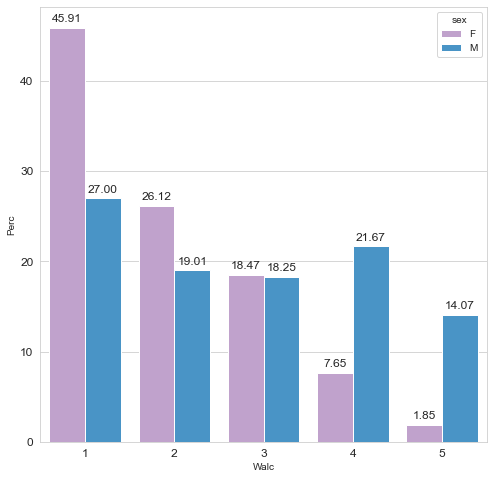

In [114]:
distribuzione_per_sesso(life, 'Walc')

Analizzando il grafico sopra riportato è possibile notare come il consumo di alcolici sia più elevato tra gli studenti di sesso maschile: è facile notare quanto appena descritto se si confrontano le percentuali di ciascun sesso per le categorie della feature *Walc* che indicano un consumo elevato di alcolici, ovvero il valore 4 e il valore 5. In queste due categorie, infatti, è possibile notare come la percentuale di studenti di sesso maschile che hanno dichiarato un consumo di bevande alcoliche di quel livell è molto elevato se confrontato con la percentuale del sesso opposto.

Successivamente, l'analisi del consumo di alcolici è proseguita studiando la possibile correlazione con le valutazioni finali ottenute dagli studenti che compongono il dataset. 

Per prima cosa è stata analizzata la correlazione con il consumo di bevande alcoliche durante i giorni lavorativi (*Dalc*).

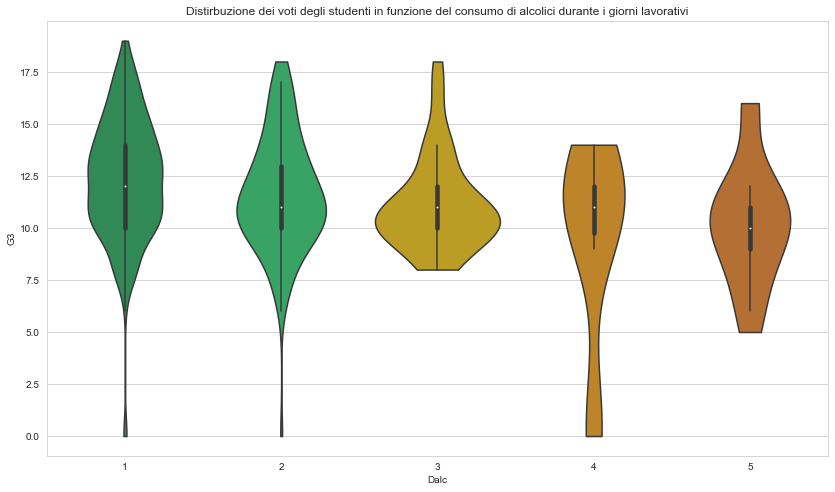

In [115]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='Dalc', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del consumo di alcolici durante i giorni lavorativi')
plt.show()

Analizzando il grafico sopra riportato, è possibile notare come coloro che hanno un elevato consumo di alcolici (valore 4 e 5 della feature Dalc) hanno difficoltà a raggiungere voti ottimali (sopra il 17). Inoltre, se si considera la distribuzione delle valutazioni finali di coloro che hanno un elevatissimo consumo di alcolici (valore 5), la "porzione" del "violino" inferiore a 10 (ovvero voti insufficienti secondo la scala portoghese) è, in proporzione, magggiore rispetto a quella delle altre categorie. A fronte di ciò, è possibile affermare che un elevato consumo di alcolici nei giorni lavorativi ha un'influenza negativa sul voto finale degli studenti.

In seguito, si è voluto fare la medesima analisi per quanto riguarda il consumo di alcolici nel weekend.

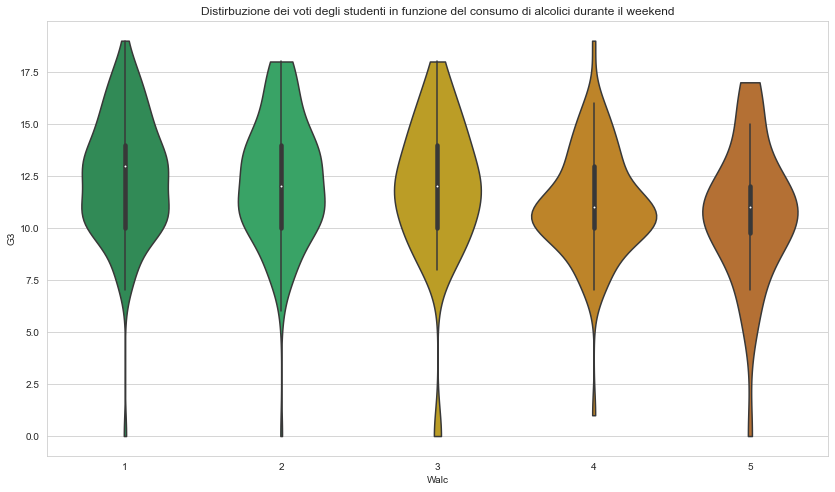

In [116]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.violinplot(x='Walc', y='G3', cut=0, data = life, ax=ax, palette = color_based_on_value)
plt.title('Distirbuzione dei voti degli studenti in funzione del consumo di alcolici durante il weekend')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come, se si prendono i considerazioni le porzioni di ciascun violino che rappresentano i voti insufficienti (G3 minore di 10 secondo la scala dei voti portoghese), queste sono maggiori tra le distribuzioni relative ad un consumo di alcolici più elevato. Per questo motivo, è possibile affermare come, anche in questo caso, un consumo elevato di alcolici ha effetti negativi sull'andamento scolastico degli studenti.

## Conclusioni analisi dataset

Dopo aver analizzato gli studenti presenti all'interno del dataset relativo al corso di portoghese, nel seguente paragrafo si iportano le conclusioni a cui si è giunti. 

Durante l'analisi dei dati ci si è potuti rendere conto del fatto che vi sono due tipologie di features: numeriche e categoriche. Per le features numeriche è stato possibile analizzare il loro impatto sulla valutazione finale attraverso una matrice di correlazione, mentre per quelle categoriche l'impatto sul voto finale è stato analizzando considerando la distribuzione dei voti degli studenti nelle diverse categorie di ciascuna features.

Per ovvi motivi le features che hanno il maggior impatto sul voto finale degli studenti sono il voto del primo e del secondo periodo, ovvero *G1* e *G2*: gli studenti che hanno ottenuto un voto alto nel primo e nel secondo periodo avranno una valutazione finale alta, mentre coloro che nei due periodi hanno ottenuto voti bassi avranno un voto finale basso.

Per quanto riguarda le altre features si è constatato che:

- gli studenti della scuola Gabriel Pereira hanno valutazioni nettamente migliori rispetto ai colleghi dell'altra scuola presente nel dataset;
- il numero di assenze ha un effetto negativo sul voto finale degli studenti;
- in media gli studenti che vivono in una zone urbane hanno voti migliori di coloro che vivono in zone rurali;
- in media gli studenti che vogliono continuare gli studi una volta finite le scuole superiori hanno voti migliori di quelli che non vogliono;
- non vi sono grandi differenze tra gli studenti che hanno come tutore il padre o la madre, mentre coloro che come tutore non hanno uno dei due genitori hanno in media voti più bassi rispetto agli altri;
- in media gli studenti che hanno accesso a internet hanno valutazioni finale più alta rispetto a chi non ce l'ha;
- la consumazione di alcool ha un legggero impatto negativo sulle valutazioni finali degli studenti: tale impatto è maggiore se si considera quanto consumeato durante i giorni lavorativi.

Per le restanti features non si rilevano particolari comportamenti da far intendere un'influenza importante sulle valutazioni finali degli studenti.

# Addestramento del modello

L'obiettivo del progetto presentato nel seguente documento è prevedere i voti degli studenti in base alle informazioni presenti all'interno del dataset che è stato analizzato in precedenza: si tratta, quindi, di un problema di regressione. Per questo motivo, oltre ai modelli *Random Forest Regressor* e *Support Vector Regression*, si è deciso di utilizzare i seguenti modelli:

- Ridge Regression
- KNN
- Decision Tree

Di seguito, si importano le librerie necessarie per questa fase di progetto:

In [117]:
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform

# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regressor
from sklearn.svm import SVR

# Ridge Regression
from sklearn.linear_model import Ridge


# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor as DT

# per il calcolo dell'RMSE
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

Prima di incominciare le operazioni di addestramento dei modelli di machine learning sopra elencati, si è optato per eliminare dal dataaset che verrà utilizzato per prevedere le valutazioni finali degli studenti le features riguardanti i voti del primo e del secondo periodo, e quelle riguardanti il numero di assenze e di bocciature. Si è optato per tale operazione, in quanto, durante l'analisi del dataset svolta in precedenza, è stato notato che tali features hanno una forte correlazione con la feature target (ovvero, il voto finale G3).
L'altro aspetto che ha portato a tale decisione è stato il fatto che l'obiettivo di un modello di machine learning come quelle che ci si pone di elaborare in questo progetto è di prevedere l'andamento scolastico degli studenti in base a informazioni che hanno poco o niente a che fare con la scuola. In altre parole, si vuole addestrare un modello capace di prevedere l'andamento degli studenti attraverso informazioni personali, come ad esempio quelle riguardanti la famiglia, e informazioni sociali, come ad esempio il consumo di alcolici o il tempo speso per le relazioni personali. 

Si è deciso, infine, di eliminare dal dataset, utilizzato per addestrare il modello, la colonna che riporta l'informazione relativa alla scuola di provenienza degli studenti. Si è optato di eliminare anche questa informazione in quanto, durante l'analisi, è emersa una netta differenza nell'andamento degli studenti delle due scuole presenti nel dataset originale. Inoltre, si è pensato di non considerare tale informazioni in quanto in qualsiasi stato si vuole considerare, la differenza di preparazione degli studenti e di qualità dell'insegnamento tra le varie scuole è ben conosciuta: quindi si tratta di un'informazione che, nella previsione di un voto finale, ha un peso specifico elevato al pari delle informazioni che si è optato di rimuovere e descritte in precedenza.

In [118]:
# si crea una copia del detaset originale per non modificarne la struttura
df_port = port.drop(columns=['school', 'G1', 'G2', 'absences', 'failures'])
# dal dataframe appena creato si elimina inoltre la colonna *new_age* creata in fase di analisi
df_port.drop(columns=['new_age'], inplace=True)

Per valutare i modelli, oltre all'accuratezza nella previsione dei voti degli studenti, verrà utilizzato l'errore quadratico medio, il quale indica la discrepanza quadratica media fra i voti finali degli studenti presenti nel dataset originale e i voti finali predetti dai vari modelli che verranno addestrati.

## Preparazione del dataset


Prima di addestrare i modelli di machine learning sopra riportati, si rendono necessarie le seguenti operazioni:

- codifica one-hot
- la scalatura dei dati.

Tuttavia, non tutti gli algoritmi menzionati in precedenza richiedono la scalatura dei dati. Tale operazione deve essere applicata ai seguenti algoritmi:
- Support Vector Regressor
- KNN

Per quanto riguarda, *Ridge Regression* si rende necessario standardizzare le variabili (non scalare i dati). Gli algoritmi *Random Forest Regressor* e *Decision Tree* non richiedono alcuna scalatura dei dati.

Di conseguenza la scalatura dei dati o la normalizzazione (nel caso del Ridge Regressor) verrà applicata quando si addestreranno i modelli che richiedono tali operazioni.



## Codifica one-hot

Ad eccezione della feature *age*, tutte le features del dataframe **df_port** creato in precedenza sono variabili categoriche. Tale informazione, tuttavia, non è sufficiente per poter applicare la codifica one-hot: infatti, tale ricodifica crea, per ogni feature categorica, un numero di colonne pari ai valori che tale feature può assumere. Per questo motivo, è più utile ricodificare le feature che possono assumere più di due valori (dai 3 in su). Le feature che possono assumere solamente due valori vengono modificate in modo che possano assumere solo valori binari (1 o 0).

Per questo motivo, prima di applicare la codifica one-hot si rende necessario comprendere il numero di valori che le feature, escluse *age* e *G3*, possono assumere.

In [119]:
# si ottiene una lista di tutte le feature presenti all'interno del dataframe df_port
all_columns = df_port.columns.to_list()
# dalla lista appena ottenuta si rimuovono le feature age e G3
for col in all_columns:
    if (col == 'age') | (col == 'G3'):
        all_columns.remove(col)

# si creano due liste vuote che verrano popolate con il nome delle features in base al numero
# di valori che possono assumere
# col_2_valori == lista che conterrà le features che possono assumere solamente due valori
# col_more_valori == lista che conterrà le features che possono assumere più di due valori

col_2_valori = []
col_more_valori = []

for col in all_columns:
    if len(df_port[col].unique()) == 2:
        col_2_valori.append(col)
    else:
        col_more_valori.append(col)

In [120]:
col_2_valori

['sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [121]:
col_more_valori

['Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [122]:
# si applica la codifica one-hot alle features presenti nella lista col_more_valori
df_port = pd.get_dummies(data=df_port, columns=col_more_valori, drop_first=False)
# si applica la codifica one-hot alle features presenti nella lista col_2_valori: in questo caso
# si utilizza l'argomento drop_first=True in modo da avere solamente una colonna
df_port = pd.get_dummies(data=df_port, columns=col_2_valori, drop_first=True)

### Divisione delle features in trian e test set

Per poter addestrare i modelli di machine learning si rende necessario, inoltre, dividere il dataframe in training e testing set. Per fare ciò bisogna, innanzitutto separare tutte le features dalla feature target *G3*.

In [123]:
# si crea una copia del dataframe df_port
df = df_port.copy()
# si separa la feature target dalle altre
y = df.pop('G3')
X = df.copy()

Successivamente, si è proceduto con la suddivisione in train e test set.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=1)

print('X: ', X.shape)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('\ny: ', y.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X:  (642, 78)
X_train:  (513, 78)
X_test:  (129, 78)

y:  (642,)
y_train: (513,)
y_test: (129,)


## Scelta dei modelli

Una volta ottenuti i traning e i test set necessari per la modelizzazione, si è proceduto con la scelta dei modelli.

Per la definizione degli iperparametri verrà utilizzata la tecnica di Random Search (attraverso *RandomizedSearchCV* di Scikit-Learn) la quale, attraverso combinazione randomiche degli iperparametri, definisce la miglior soluzione per il modello che si vuole utilizzare.

### Funzioni utilizzate in fase di valutazione dei modelli

In [125]:
# funzione che in funzione del modello e dei parametri di un modello ritorna il miglior score
# e l'errore quadratico medio RMSE. Si ritornano inoltre i migliori valori degli iperparametri
def randomsearch_model(model, params):
    rsearch = RandomizedSearchCV(model, params, cv=5, return_train_score=False, n_iter=220)
    rsearch = rsearch.fit(X_train, y_train)
    
    result_rsearch = pd.DataFrame(rsearch.cv_results_)
    best_mean_test_score = result_rsearch['mean_test_score'].sort_values(ascending=False).iloc[0]
    best_mean_test_score = round(best_mean_test_score, 3)
    # Root mean squared error
    RMSE = np.sqrt(metrics.mean_squared_error(y_train, rsearch.predict(X_train)))
    best_parameters = rsearch.best_params_
    return best_mean_test_score, RMSE,best_parameters

# funzione per stampare i risultati di testig del modello
def print_results_testing(best_score, rmse):
    print('Miglior risultato in fase di test: ', best_score)
    print('Errore quadratico medio (RMSE): ', rmse)

### Random Forest

Il primo modello addestrato è stato il *Random Forest*. Per tale modello si è scelto di validare i seguenti iperparametri:

- **max_features**: numero di features considerate per lo splitting. Si tratta dell'iperparametro più importannte per il random forest. In particolare, introduce un po' di bias nei singoli alberi, in modo da introdurre un'ulteriore diversità tra i singoli alberi tipici del modello considerato.
- **min_samples_split**: il numero minimo di campioni richiesti per dividere un nodo interno.

Nonostante non sia un iperparametro, ma un parametro di efficienza, si è optato per validare anche **n_estimators** in modo da poter definire qual è il numero migliore di "alberi" per il modello che si sta per addestrare.

In [126]:
rf = RandomForestRegressor(random_state=1)

parameters = {'n_estimators': [50, 100, 200, 300, 400, 500],
             'max_features':np.arange(1,int(df.shape[1]/2)),
             'min_samples_split': loguniform(0.03,0.25)}

best_score_rf, rmse_rf,best_parameters_rf = randomsearch_model(rf, parameters)
print_results_testing(best_score_rf, rmse_rf)

Miglior risultato in fase di test:  0.264
Errore quadratico medio (RMSE):  2.0564422056056517


### Decision Tree Regressor

Il secondo modello addestrato è stato il *Decision Tree Regressor*. Per tale modello si è optato per valorizzare i seguenti iperparametri:

- **max_depth**, il quale indica la massima profondità dell'albero;
- **min_samples_leaf**, il quale indica il numero minimo di elementi (samples) in una foglia;
- **min_samples_split**, il quale indica il numero minimo di elementi (samples) richiesti per dividere un nodo interno.

In [127]:
dt = DT()
parameters = {'max_depth':[2,5,10,15,20,50, None],
         'min_samples_leaf': loguniform(0.001,0.25),
         'min_samples_leaf': loguniform(0.004,0.25)}

best_score_dt, rmse_dt, best_parameters_dt = randomsearch_model(dt, parameters)
print_results_testing(best_score_dt, rmse_dt)

Miglior risultato in fase di test:  0.14
Errore quadratico medio (RMSE):  2.6145321881949872


### Ridge Regression

Il terzo modello addestarto è stato il *Ridge Regression*, il quale è un modello di tuning che è usato per analizzare dati caratterizzanti da multicollinearità.

Per tale modello si è optato per valorizzare il seguente iperparametro:
- **alpha**, il quale rappresenta la forza di regolarizzazione e, in particolare, deve essere un numero reale (float) positivo. La regolarizzazione, inoltre, migliora il condizionamento del problema e riduce la varianza delle stime. Valori più grandi specificano una regolarizzazione più forte.
- **normalize** in quanto per tale modello è necessario normalizzare i dati. Dal momento che si tratta di una condizione necessaria, tale iperparametro viene inizializzato in fase di creazione del modello e non attraverso RandomizedSearchCV.

In [128]:
rid = Ridge(normalize=True)

In [129]:
parameters = {'alpha': loguniform(1e-3, 1e3)}

best_score_rid, rmse_rid,best_parameters_rid = randomsearch_model(rid, parameters)
print_results_testing(best_score_rid, rmse_rid)

Miglior risultato in fase di test:  0.206
Errore quadratico medio (RMSE):  2.4794344008313365


### Support Vector Regressor e K-nearest Neighbors

Dal momento che gli ultimi due modelli che devono essere addestrati sono il *Support Vector Regressor* e il *K-nearest Neighbors*, i quali richiedono la scalatura dei dati prima di addestrare tali modelli si crea un nuovo dataframe partendo dal dataframe *df_port* e al quale verrà applicata la scalatura dei dati.

In [130]:
# Si effettua la copia del dataframe df_port
df_scaling = df_port.copy()
# si crea lo scaler utilizzando la funzione StandardScaler di scikit learn
scaler = StandardScaler()
# la scalatura deve essere applicata alle variabili numeriche ovvero Age e G3 (feature target)
df_scaling[['age', 'G3']] = scaler.fit_transform(df_scaling[['age','G3']]) 

In [131]:
# si rende quindi necessario riseparare le features in training e test set
y = df_scaling.pop('G3')
X = df_scaling.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=1)

#### Support Vector Regressor

Il quarto modello addestrato è stato il *Support Vector Regressor* (*SVR*). Per tale modello sono stati validati i seguenti iperparametri:

- **kernel**, il quale definisce il tipo di trasformazione dei dati che deve essere applicata dell'algoritmo e, nell'ambito del seguente progetto, può assumere i valori *linear*, *rbf* e *poly*.
- **epsilon**, il quale specifica l'espsilon-tube all'interno del quale non è associata alcuna penalità nella funzione di perdita in fase di training con punti previsti entro una distanza epsilon dal valore effettivo. 
- **degree**, iperparametro che viene valorizzato solo per il kernel *poly*.
- **C**, con un alto valore del seguente iperparametro si vogliono addestrare modelli che sbaglino il meno possibile, attraverso un migliore fitting dei dati di apprendimento.
- **gamma**: coefficiente del kernel, può essere valorizzato solo per kernel *rbf* o *poly*.

In [132]:
svr_regressor = SVR()

C_range = loguniform(1e-3,1e3)
gamma_range = loguniform(1e-3,1e3)
epsilon_range = loguniform(1e-3, 1e4)
degree_range = np.arange(2,5)

parameters = [ {'kernel': ['linear'], 'C':C_range, 'epsilon':epsilon_range},
         {'kernel':['rbf'], 'C':C_range, 'gamma':gamma_range, 'epsilon':epsilon_range},
         {'kernel':['poly'], 'C':C_range, 'degree':degree_range, 'epsilon':epsilon_range}]

In [133]:
best_score_svr, rmse_svr, best_parameters = randomsearch_model(svr_regressor, parameters)
print_results_testing(best_score_svr, rmse_svr)

Miglior risultato in fase di test:  0.224
Errore quadratico medio (RMSE):  0.6918801051881708


#### KNN Regression

Il quarto modello addestrato è il KNN (K-Nearest Neighbors) per la regressione. Per tale modello si è optato di validare i seguenti iperparametri:

- **n_neighbors**, il quale indica il numero di "vicini" (*neighbors*) che vengono considerati.
- **algorithm**, il quale indica l'algoritmo utilizzato per calcolare i "nearest neighbors".
- **leaf_size**, iperparametro che viene valorizzato per gli algoritmi *BallTree* e *KDTree*.

In [134]:
regressor_knn = KNN()

# per valorizzare l'iperparametro leaf_size si è pensato di scegliere il valore massimo
# proporzionale alla dimensione del dataset utilizzato.
neighbors_min = round(X.shape[0] * 0.005)
neighbors_max = round(X.shape[0] * 0.15)


parameters = {'n_neighbors': np.arange(5,40,1).tolist(),
          'algorithm': ['ball_tree', 'kd_tree'],
              'leaf_size': np.arange(neighbors_min, neighbors_max).tolist()
          #'leaf_size': np.arange(1,40).tolist()
         }

In [135]:
best_score_knn, rmse_knn, best_parameters_knn = randomsearch_model(regressor_knn, parameters)
print_results_testing(best_score_knn, rmse_knn)

Miglior risultato in fase di test:  0.138
Errore quadratico medio (RMSE):  0.9105768117274271


## Valutazione dei modelli

Per valutare i modelli si è voluto creare un dataframe che permettesse di confrontare i dati relativi al miglior risultato di ciascun modello., all'errore di ciascuno.

In [136]:
nomi_modelli = ['Random Forest', 'Decision Tree Regressor', 'Ridge Regression', 
                'Support Vector Regression', 'KNN Regression']
best_score_modelli = [best_score_rf, best_score_dt, best_score_rid, best_score_svr,
                     best_score_knn]
rmse_modelli = [rmse_rf, rmse_dt, rmse_rid, rmse_svr, rmse_knn]

In [137]:
dict_for_frame = {'Modello':nomi_modelli , 'Best_Score': best_score_modelli,
                 'RMSE': rmse_modelli}
df_risultati = pd.DataFrame(dict_for_frame)
df_risultati.sort_values(by='Best_Score', ascending=False)

,Modello,Best_Score,RMSE
0,Random Forest,0.264,2.056442
3,Support Vector Regression,0.224,0.691880
2,Ridge Regression,0.206,2.479434
1,Decision Tree Regressor,0.140,2.614532
4,KNN Regression,0.138,0.910577


Analizzando i dati sopra riportati è possibile notare come i risultati di test non siano altissimi. Sicuramente se i modelli fossero stati addestrati considerando anche i voti dei due periodi (**G1** e **G2**),le informazini riguardanti il numero di bocciature e di assenze e la scuola che gli studenti frequentano, i risultati delle predizioni sarebbero migliori. Tuttavia, come spiegato in precedenza, l'obiettivo del progetto riportato di seguito  è quello di predirre le valutazioni finali degli studenti da aspetti che vadano al di fuori dell'andamento scolastico. 

Dai dati sopra riportati il modello che predice meglio i risultati è il *Random Forest Regressor* con un best score pari a *0,264*. Tuttavia, è possibile notare come il modello *Support Vector Regression* abbia un erorre quadratico medio nettamente minore. Considerando, quindi, che il '*best_score*' dei due modelli non differisce di molto, alla luce della differenza tra gli errori quadratici medi si è optato di utilizzare il *Support Vector Regression* per valutare l'importanza delle diveerse features presenti nel dataset relativo agli studenti del corso di portoghese.

## Analisi delle importanza delle features in Support Vector

Per valutare l'importanza delle features, occurre addestrare l'algoritmo di Support Vector utilizzando i parametri che hanno permesso di ottenere il *best_score* riportato in precedenza e relativo a tale algoritmo.

I migliori parametri sono i seguenti:

In [158]:
best_parameters

{'C': 1.8769741774014617,
 'epsilon': 0.4285794099223612,
 'gamma': 0.028164207115079,
 'kernel': 'rbf'}

Di seguito è stato addestrato il modello di Support Vector con i parametri appena riporati. Per addestrare il modello si utilizzano gli ultimi set di training e di test, in quanto sono quelli ricavati dal dataframe *df_scaling, nel quale è presenta la scalatura dei dati che, come spiegato in precedenza, è un'operazione necessaria per il modello che si sta addestrando.

In [161]:
c = best_parameters['C']
epsilon = best_parameters['epsilon']
gamma = best_parameters['gamma']
kernel = best_parameters['kernel']

svr = SVR(kernel=kernel, gamma=gamma, C=c, epsilon=epsilon)
svr.fit(X_train, y_train)

SVR(C=1.8769741774014617, epsilon=0.4285794099223612, gamma=0.028164207115079)

Come già descritto, dopo aver addestrato il modello, si è pensato di valutare quali features avessero maggior impatto sulla previsine del voto finale. Per permettere l'individuazione di tali features, si è optato per utilizzare la funzione **permutation_importance** messa a disposizione della libreria Scikit-Learn.  Come è possibile leggere sulla pagina della libreria (https://scikit-learn.org/stable/modules/permutation_importance.html), *Permutation feature importance* è una procedura che permette di "rompere" la relazione tra ciascuna feature e il target (nel nostro caso il voto finale G3): il risultato è un punteggio che indica quanto il modello dipende dalla feature in questione.

In [162]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(svr, X_train, y_train, 
                       scoring='neg_mean_squared_error', n_repeats=10, 
                       random_state=0)

"""attraverso argsort di numpy ottengo gli indici delle colonne a cui sono associati 
gli errori percentuali medi"""
indexes = importances.importances_mean.argsort()
imp_indexes = importances.importances_mean[indexes]
"""riordino le colonne di X in funzione degli indici contenuti in indexes"""
cols_indexes = X.columns[indexes]

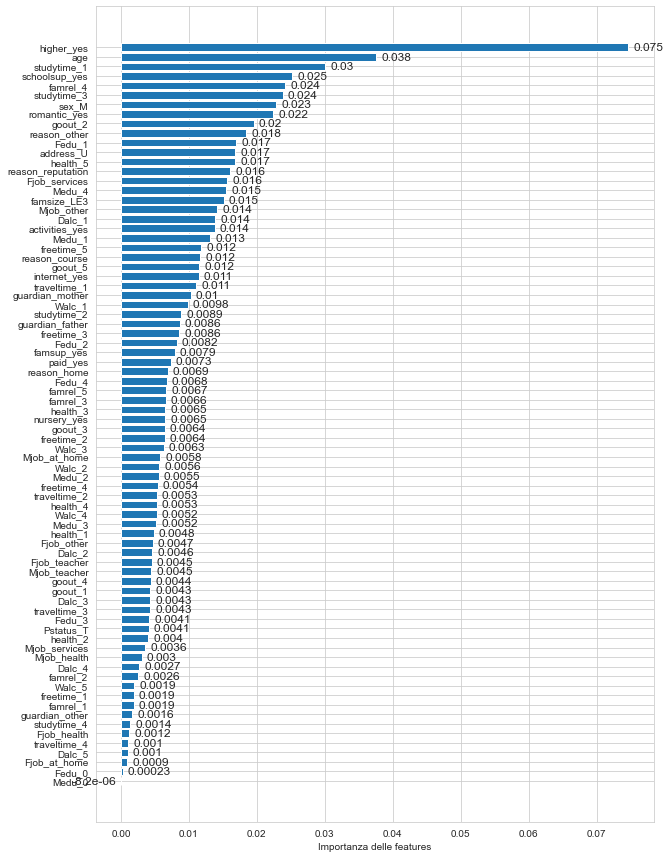

In [164]:
figure = plt.figure(figsize=(10,15))
graph = plt.barh(cols_indexes, imp_indexes)
plt.bar_label(graph, size=12, padding=5, labels=['{:.2}'.format(a) for a in imp_indexes])
plt.xlabel('Importanza delle features')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come la volontà degli studenti di continuare gli studi una volta terminata la scuola superiore e l'età di quest'ultimi sono gli aspetti che hanno un maggiore impatto sulla previsione dei voti finali degli studenti.

Successivamente, si è pensato di ridurre ulteriormente le features da considerare per prevedere il voto finale degli studenti considerando solamente le prime 10 features per impatto sulla previsione della valutazione finale.

In [170]:
list_cols_indexes = cols_indexes.tolist()
list_imp_indexes = imp_indexes.tolist()
df_importances = pd.DataFrame()
df_importances = df_importances.assign(Features=list_cols_indexes, Importance=list_imp_indexes)
df_importances.sort_values(by='Importance', ascending=False, inplace=True)
df_importances.head(10)

,Features,Importance
77,higher_yes,0.074659
76,age,0.037599
75,studytime_1,0.030071
74,schoolsup_yes,0.025181
73,famrel_4,0.024150
72,studytime_3,0.023808
71,sex_M,0.022867
70,romantic_yes,0.022405
69,goout_2,0.019551
68,reason_other,0.018404


In [171]:
# si crea una lista delle features che devono essere mantenute nei dataframe 'X'
features_da_tenere = df_importances.head(10)['Features'].to_list()
features_da_tenere

['higher_yes',
 'age',
 'studytime_1',
 'schoolsup_yes',
 'famrel_4',
 'studytime_3',
 'sex_M',
 'romantic_yes',
 'goout_2',
 'reason_other']

In [172]:
X_train = X_train[features_da_tenere]
X_test = X_test[features_da_tenere]

# si addestra il modello con solo tali features
svr_only10 = SVR(kernel=kernel, gamma=gamma, C=c, epsilon=epsilon)
svr_only10.fit(X_train, y_train)

SVR(C=1.8769741774014617, epsilon=0.4285794099223612, gamma=0.028164207115079)

Si calcola l'errore quadratico medio e lo score del nuovo modello per confrontarlo con quello calcolato in fase di test dei modelli:

In [173]:
rmse_new_svr = np.sqrt(metrics.mean_squared_error(y_train, svr_only10.predict(X_train)))
rmse_new_svr

0.8780124789125765

In [174]:
df_risultati[df_risultati.Modello == 'Support Vector Regression']

,Modello,Best_Score,RMSE
3,Support Vector Regression,0.224,0.69188


Confrontando i dati sopra riportati è possibile notare come il nuovo modello ha un errore leggermente maggiore rispetto a quello precedente, ma che è comunque più basso rispetto agli errori degli altri algoritmi. 

Nel grafico sotto riportato è possibile vedere l'impatto che le featrues, utilizzate per l'addestramento del nuovo modello, hanno sulla previsione del voto finale degli studenti.

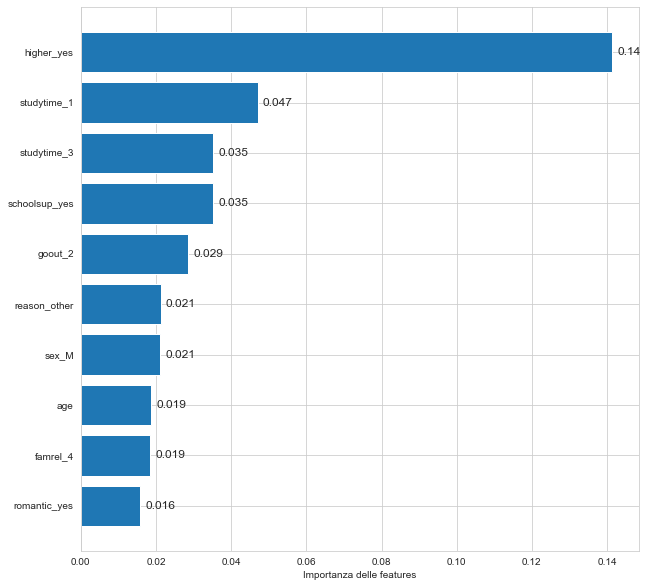

In [181]:
importances_new = permutation_importance(svr_only10, X_train, y_train, 
                       scoring='neg_mean_squared_error', n_repeats=10, 
                       random_state=0)

"""attraverso argsort di numpy ottengo gli indici delle colonne a cui sono associati 
gli errori percentuali medi"""
indexes_new = importances_new.importances_mean.argsort()
imp_indexes_new = importances_new.importances_mean[indexes]
"""riordino le colonne di X in funzione degli indici contenuti in indexes"""
cols_indexes_new = X[features_da_tenere].columns[indexes_new]

figure = plt.figure(figsize=(10,10))
graph = plt.barh(cols_indexes_new, imp_indexes_new)
plt.bar_label(graph, size=12, padding=5, labels=['{:.2}'.format(a) for a in imp_indexes])
plt.xlabel('Importanza delle features')
plt.show()

Analizzando il grafico sopra riportato è possibile notare come anche in questo caso il fatto che gli tudenti ogliano continuare i propri studi è il fattore che ha il maggior impatto sulla previsione del voto finale.